* source : kaggle
* Data : [https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

# 라이브러리 로드

In [517]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
# 그래프 해상도를 높여주는 retina 포멧 설정
%config InlineBackend.figure_format = 'retina'

# 상관관계 파악
from scipy.stats import chi2_contingency
from sklearn.datasets import make_blobs
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# 머신러닝
from sklearn import preprocessing
# from sklearn.cross_validation import train_test_split
# from sklearn import metrics
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression
# import xgboost as xgb

/Users/jomac/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.

/Users/jomac/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.

/Users/jomac/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.

/Users/jomac/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.

/Users/jomac/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.

/Users/jomac/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.

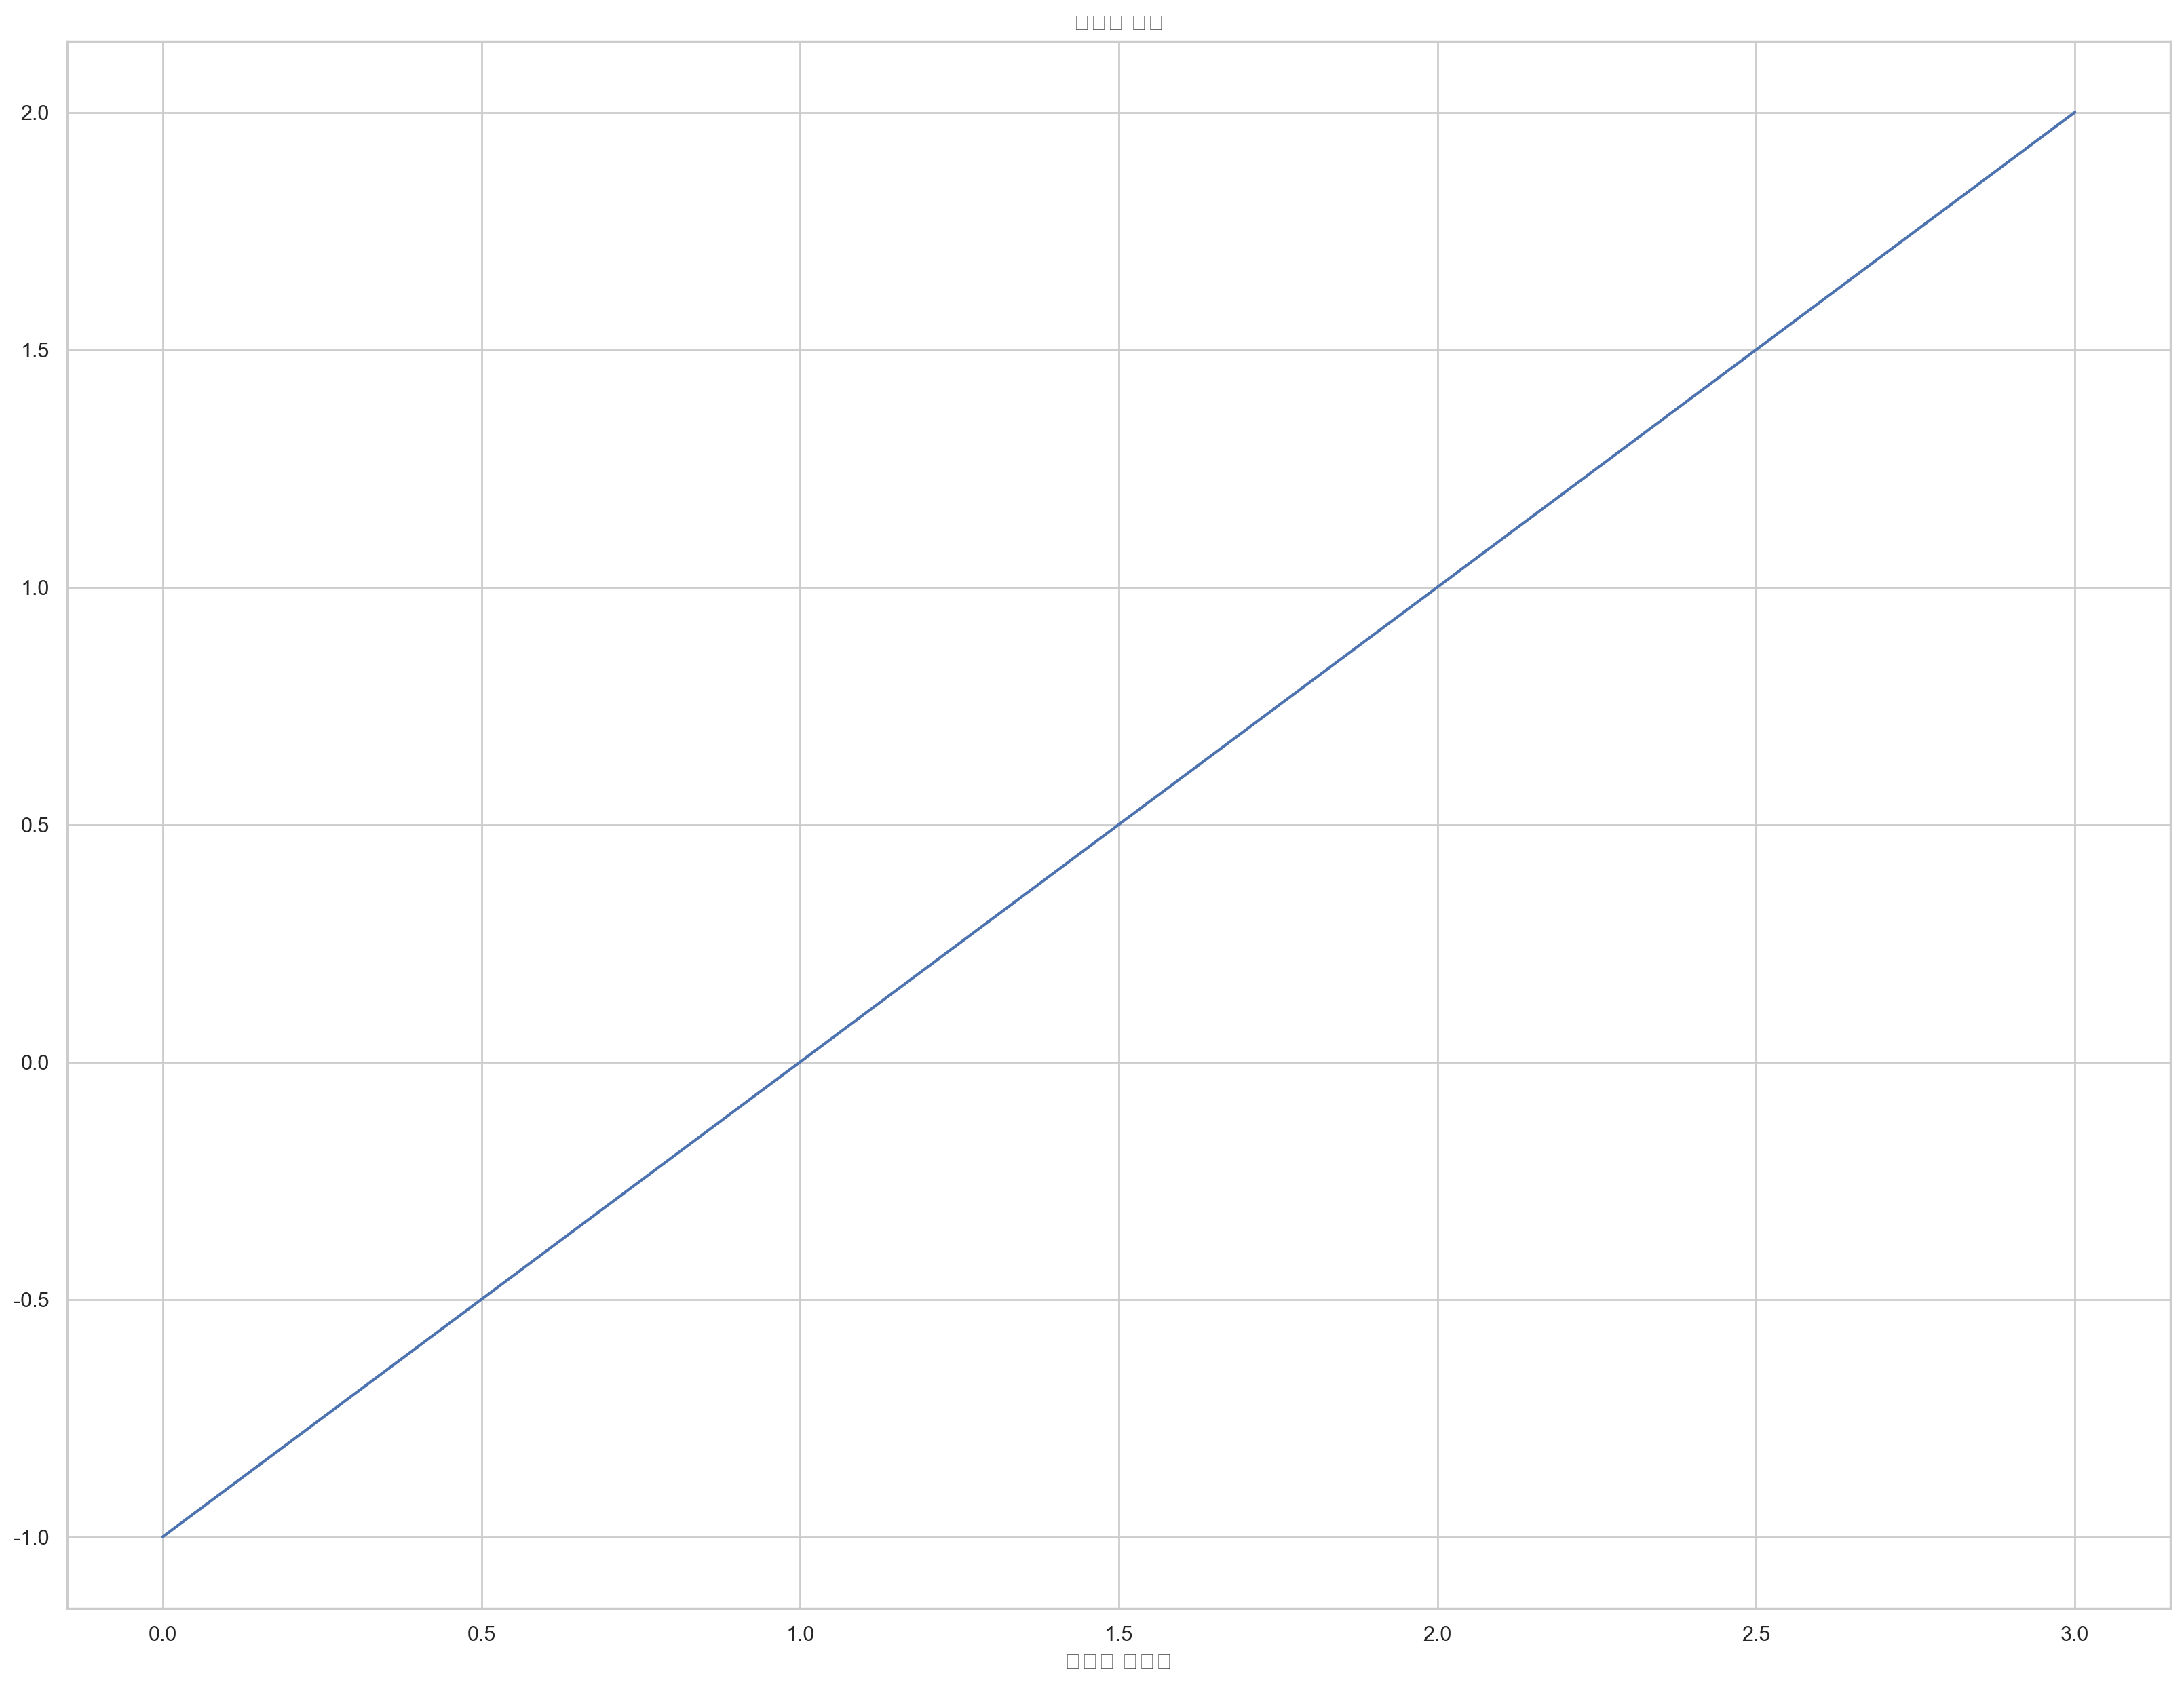

In [518]:
plt.plot([-1, 0, 1, 2])
plt.title('그래프 제목', fontweight="bold")
plt.xlabel('간단한 그래프')
plt.show();

# 파일 로드

## 파일 불러오기

In [519]:
# 파일 불러오기
base_path = '/Users/jomac/Desktop/final/dataset'

# raw 데이터
df_raw = pd.read_csv(f"{base_path}/WA_Fn-UseC_-HR-Employee-Attrition.csv", index_col='EmployeeNumber')

## 데이터 확인하기

In [520]:
df_raw.head()

Age Attrition     BusinessTravel  DailyRate  \
EmployeeNumber                                                
1                41       Yes      Travel_Rarely       1102   
2                49        No  Travel_Frequently        279   
4                37       Yes      Travel_Rarely       1373   
5                33        No  Travel_Frequently       1392   
7                27        No      Travel_Rarely        591   

                            Department  DistanceFromHome  Education  \
EmployeeNumber                                                        
1                                Sales                 1          2   
2               Research & Development                 8          1   
4               Research & Development                 2          2   
5               Research & Development                 3          4   
7               Research & Development                 2          1   

               EducationField  EmployeeCount  EnvironmentSatisfaction  ...  \
EmployeeNumber                                                         ...   
1               Life Sciences              1                        2  ...   
2               Life Sciences              1                        3  ...   
4                       Other              1                        4  ...   
5               Life Sciences              1                        4  ...   
7                     Medical              1                        1  ...   

               RelationshipSatisfaction  StandardHours  StockOptionLevel  \
EmployeeNumber                                                             
1                                     1             80                 0   
2                                     4             80                 1   
4                                     2             80                 0   
5                                     3             80                 0   
7                                     4             80                 1   

                TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
EmployeeNumber                                                             
1                               8                     0                1   
2                              10                     3                3   
4                               7                     3                3   
5                               8                     3                3   
7                               6                     3                3   

               YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                               
1                           6                   4                        0   
2                          10                   7                        1   
4                           0                   0                        0   
5                           8                   7                        3   
7                           2                   2                        2   

                YearsWithCurrManager  
EmployeeNumber                        
1                                  5  
2                                  7  
4                                  0  
5                                  0  
7                                  2  

[5 rows x 34 columns]

In [521]:
df_raw.shape

(1470, 34)

In [522]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

### 전체 기술통계

In [523]:
df_raw.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  ...  RelationshipSatisfaction  StandardHours  \
count      1470.000000  ...               1470.000000         1470.0   
mean          2.728571  ...                  2.712245           80.0   
std           1.102846  ...                  1.081209            0.0   
min           1.000000  ...                  1.000000           80.0   
25%           2.000000  ...                  2.000000           80.0   
50%           3.000000  ...                  3.000000           80.0   
75%           4.000000  ...                  4.000000           80.0   
max           4.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 25 columns]

In [524]:
df_raw.describe(include='all')

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EnvironmentSatisfaction  ... RelationshipSatisfaction  \
count          1470.0              1470.000000  ...              1470.000000   
unique            NaN                      NaN  ...                      NaN   
top               NaN                      NaN  ...                      NaN   
freq              NaN                      NaN  ...                      NaN   
mean              1.0                 2.721769  ...                 2.712245   
std               0.0                 1.093082  ...                 1.081209   
min               1.0                 1.000000  ...                 1.000000   
25%               1.0                 2.000000  ...                 2.000000   
50%               1.0                 3.000000  ...                 3.000000   
75%               1.0                 4.000000  ...                 4.000000   
max               1.0                 4.000000  ...                 4.000000   

        StandardHours  StockOptionLevel  TotalWorkingYears  \
count          1470.0       1470.000000        1470.000000   
unique            NaN               NaN                NaN   
top               NaN               NaN                NaN   
freq              NaN               NaN                NaN   
mean             80.0          0.793878          11.279592   
std               0.0          0.852077           7.780782   
min              80.0          0.000000           0.000000   
25%              80.0          0.000000           6.000000   
50%              80.0          1.000000          10.000000   
75%              80.0          1.000000          15.000000   
max              80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
count            1470.000000      1470.000000    1470.000000   
unique                   NaN              NaN            NaN   
top                      NaN              NaN            NaN   
freq                     NaN              NaN            NaN   
mean                2.799320         2.761224       7.008163   
std                 1.289271         0.706476       6.126525   
min                 0.000000         1.000000       0.000000   
25%                 2.000000         2.000000       3.000000   
50%                 3.000000         3.0

* 대부분 잘 분산된 데이터..

### 결측치 확인

In [525]:
# 결측치 체크
df_raw.isnull().sum().sum()

0

### 중복값 확인

In [526]:
# 중복값 체크
df_raw.duplicated().sum()

0

### 라벨인코딩
- 데이터명 : df_encoded

In [527]:
# Object 컬럼들
categorical_column = ['Attrition', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [528]:
# 깊은 복사 해주기
df_encoded = df_raw.copy(deep=True)

#Scikit-learn 사용해서 라벨 인코딩하기
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        df_encoded[col] = lab_enc.fit_transform(df_raw[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [529]:
df_encoded.head()

Age  Attrition  BusinessTravel  DailyRate  Department  \
EmployeeNumber                                                          
1                41          1               2       1102           2   
2                49          0               1        279           1   
4                37          1               2       1373           1   
5                33          0               1       1392           1   
7                27          0               2        591           1   

                DistanceFromHome  Education EducationField  EmployeeCount  \
EmployeeNumber                                                              
1                              1          2  Life Sciences              1   
2                              8          1  Life Sciences              1   
4                              2          2          Other              1   
5                              3          4  Life Sciences              1   
7                              2          1        Medical              1   

                EnvironmentSatisfaction  ...  RelationshipSatisfaction  \
EmployeeNumber                           ...                             
1                                     2  ...                         1   
2                                     3  ...                         4   
4                                     4  ...                         2   
5                                     4  ...                         3   
7                                     1  ...                         4   

                StandardHours  StockOptionLevel  TotalWorkingYears  \
EmployeeNumber                                                       
1                          80                 0                  8   
2                          80                 1                 10   
4                          80                 0                  7   
5                          80                 0                  8   
7                          80                 1                  6   

                TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
EmployeeNumber                                                           
1                                   0                1               6   
2                                   3                3              10   
4                                   3                3               0   
5                                   3                3               8   
7                                   3                3               2   

                YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                
1                                4                        0   
2                                7                        1   
4                                0                        0   
5                                7                        3   
7                                2                        2   

                YearsWithCurrManager  
EmployeeNumber                        
1                                  5  
2                                  7  
4                                  0  
5                                  0  
7                                  2  

[5 rows x 34 columns]

# 데이터 살펴보기

**(인구 통계학적 정보) Age, Gender, MaritalStatus, Over18, DistanceFromHome**

- 나이, 결혼유무, 통근거리에 따른 유의미한 퇴사율 변화가 있다면 인사팀은 어떤 해결책을 제시할 수 있을까? (효과가 입증된 복리후생 조사)
- 연령대별 퇴사율 분석. 연령대별 특징이 있나?

**(만족도) EnvironmentSatisfaction, JobSatisfaction, 'RelationshipSatisfaction', WorkLifeBalance**

- 만족도가 높은 사람이 퇴사를 적게 할까? 만족도가 높은 사람의 특징은 뭘까?

In [530]:
df_encoded.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### 레이블 값 확인
* 불균형 데이터임

In [531]:
df_raw["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

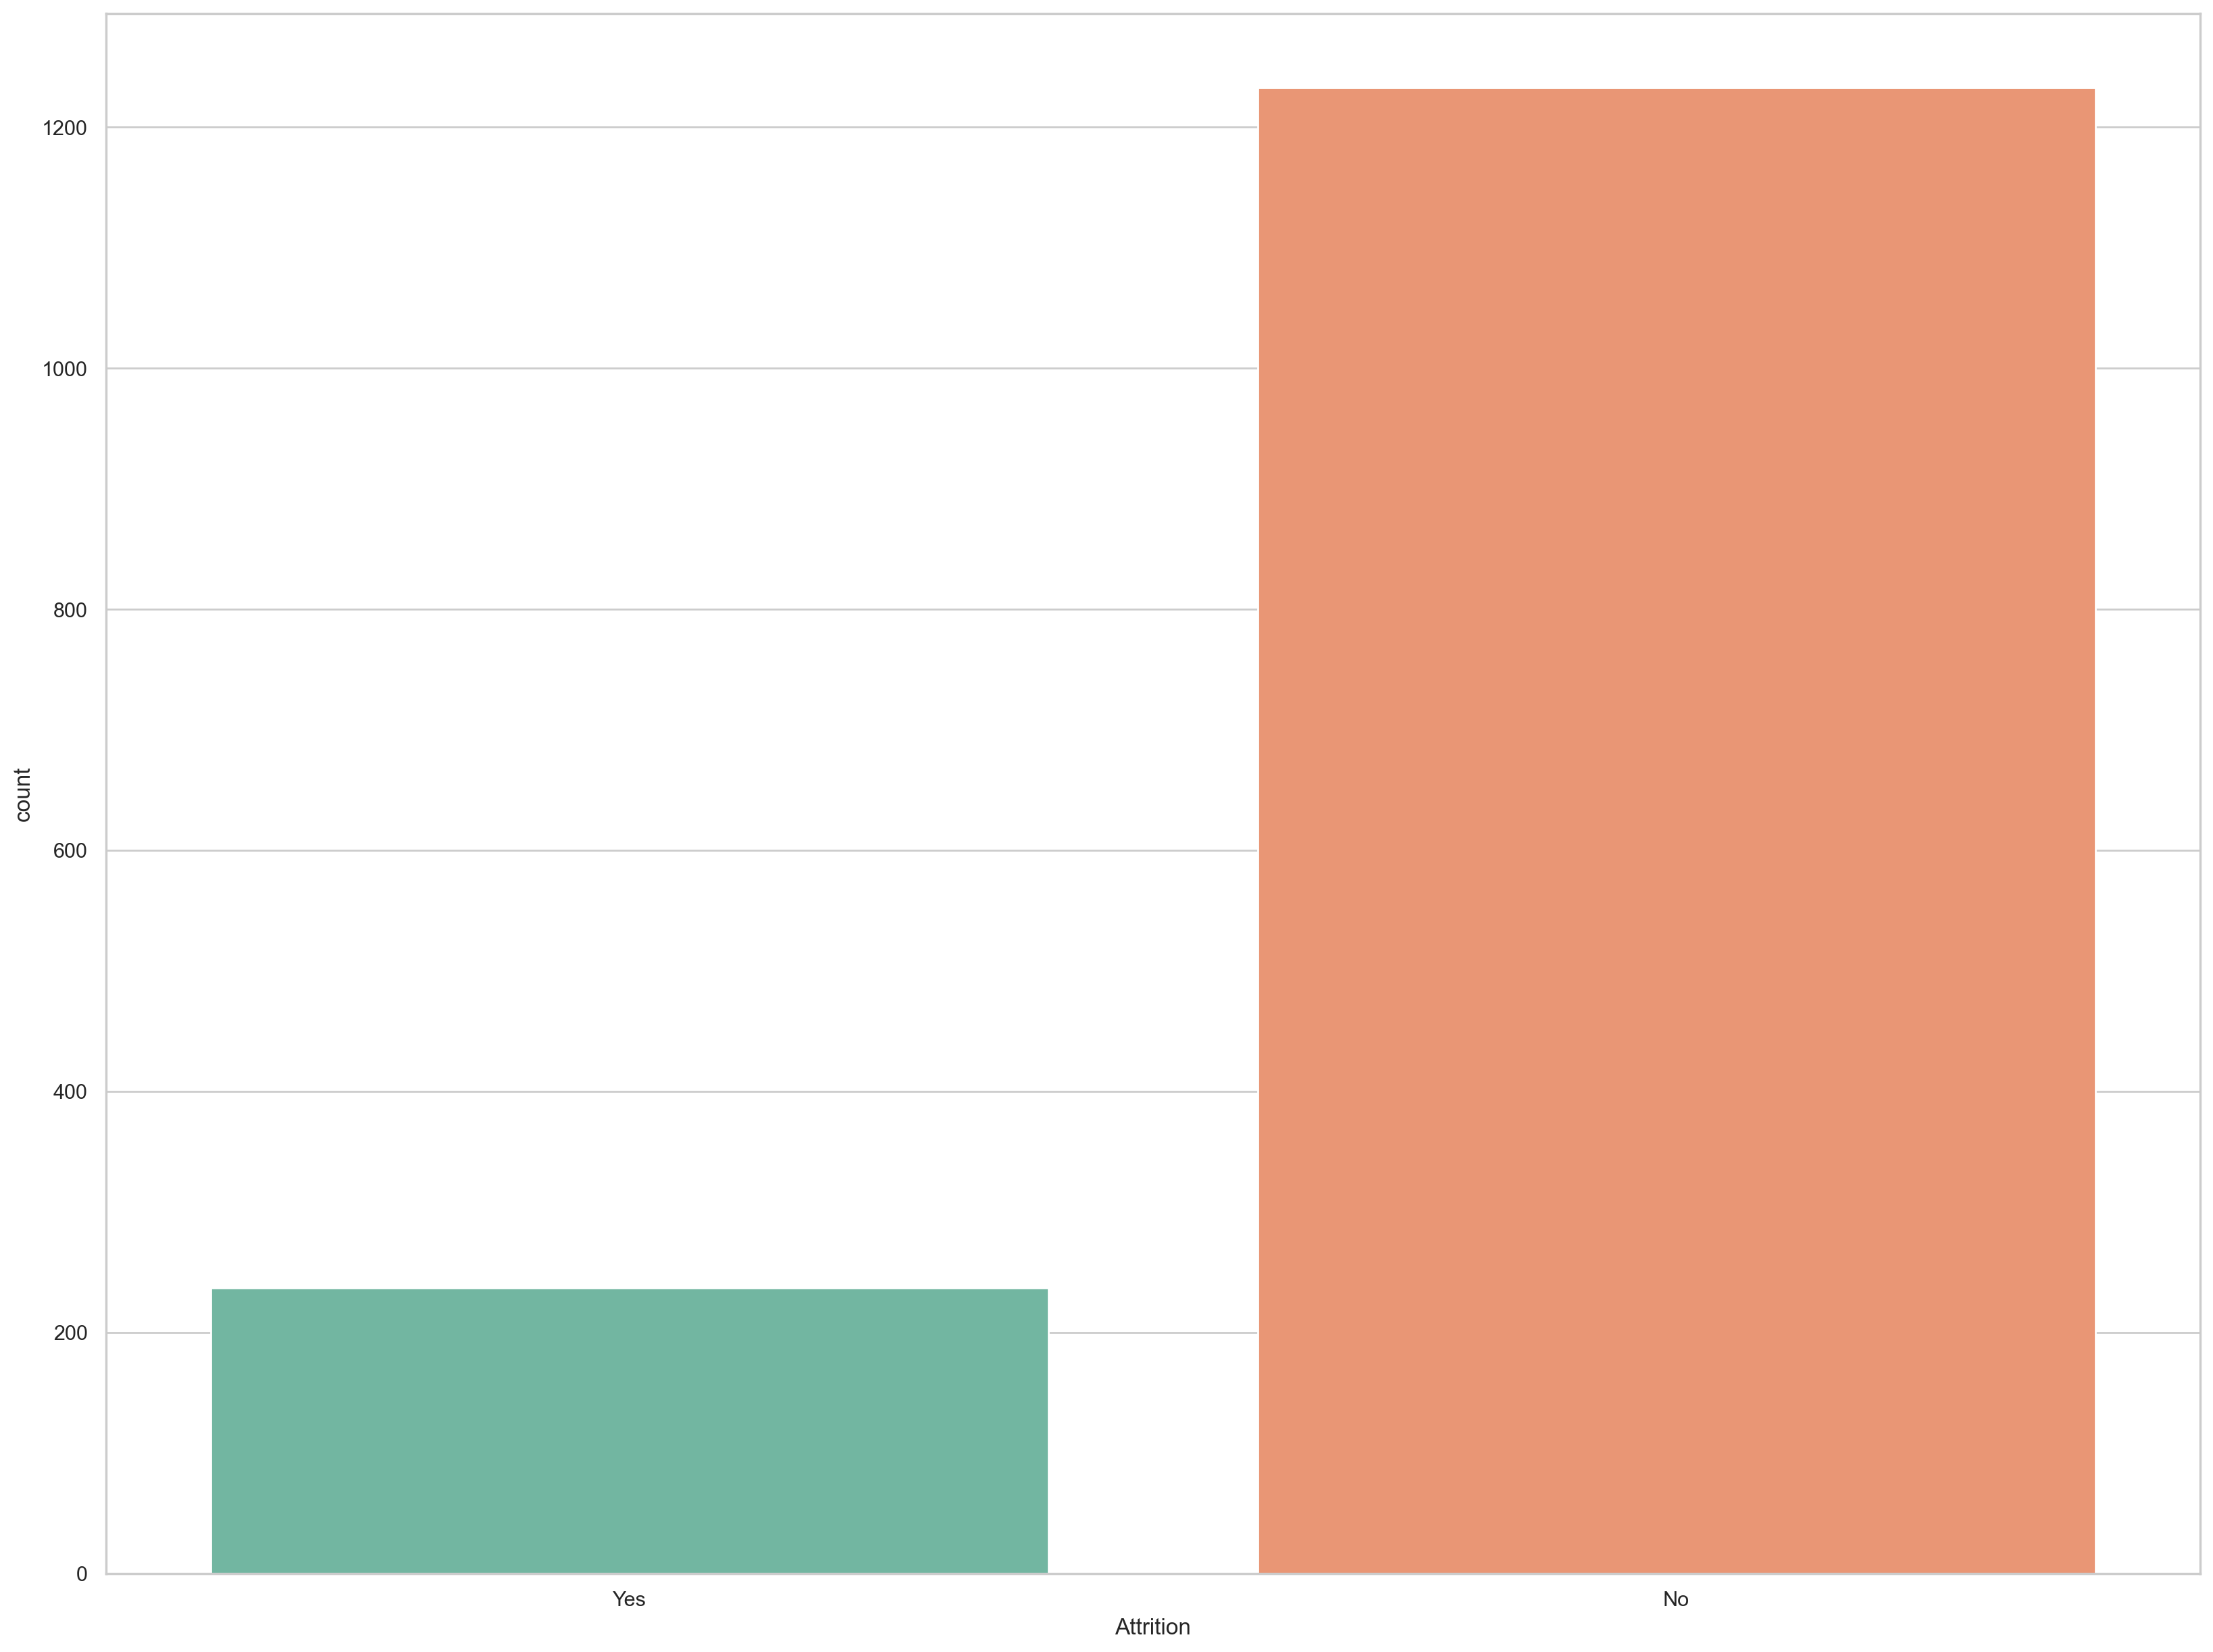

In [532]:
sns.countplot(data=df_raw, x="Attrition", palette='Set2')

### 전체 히스토그램

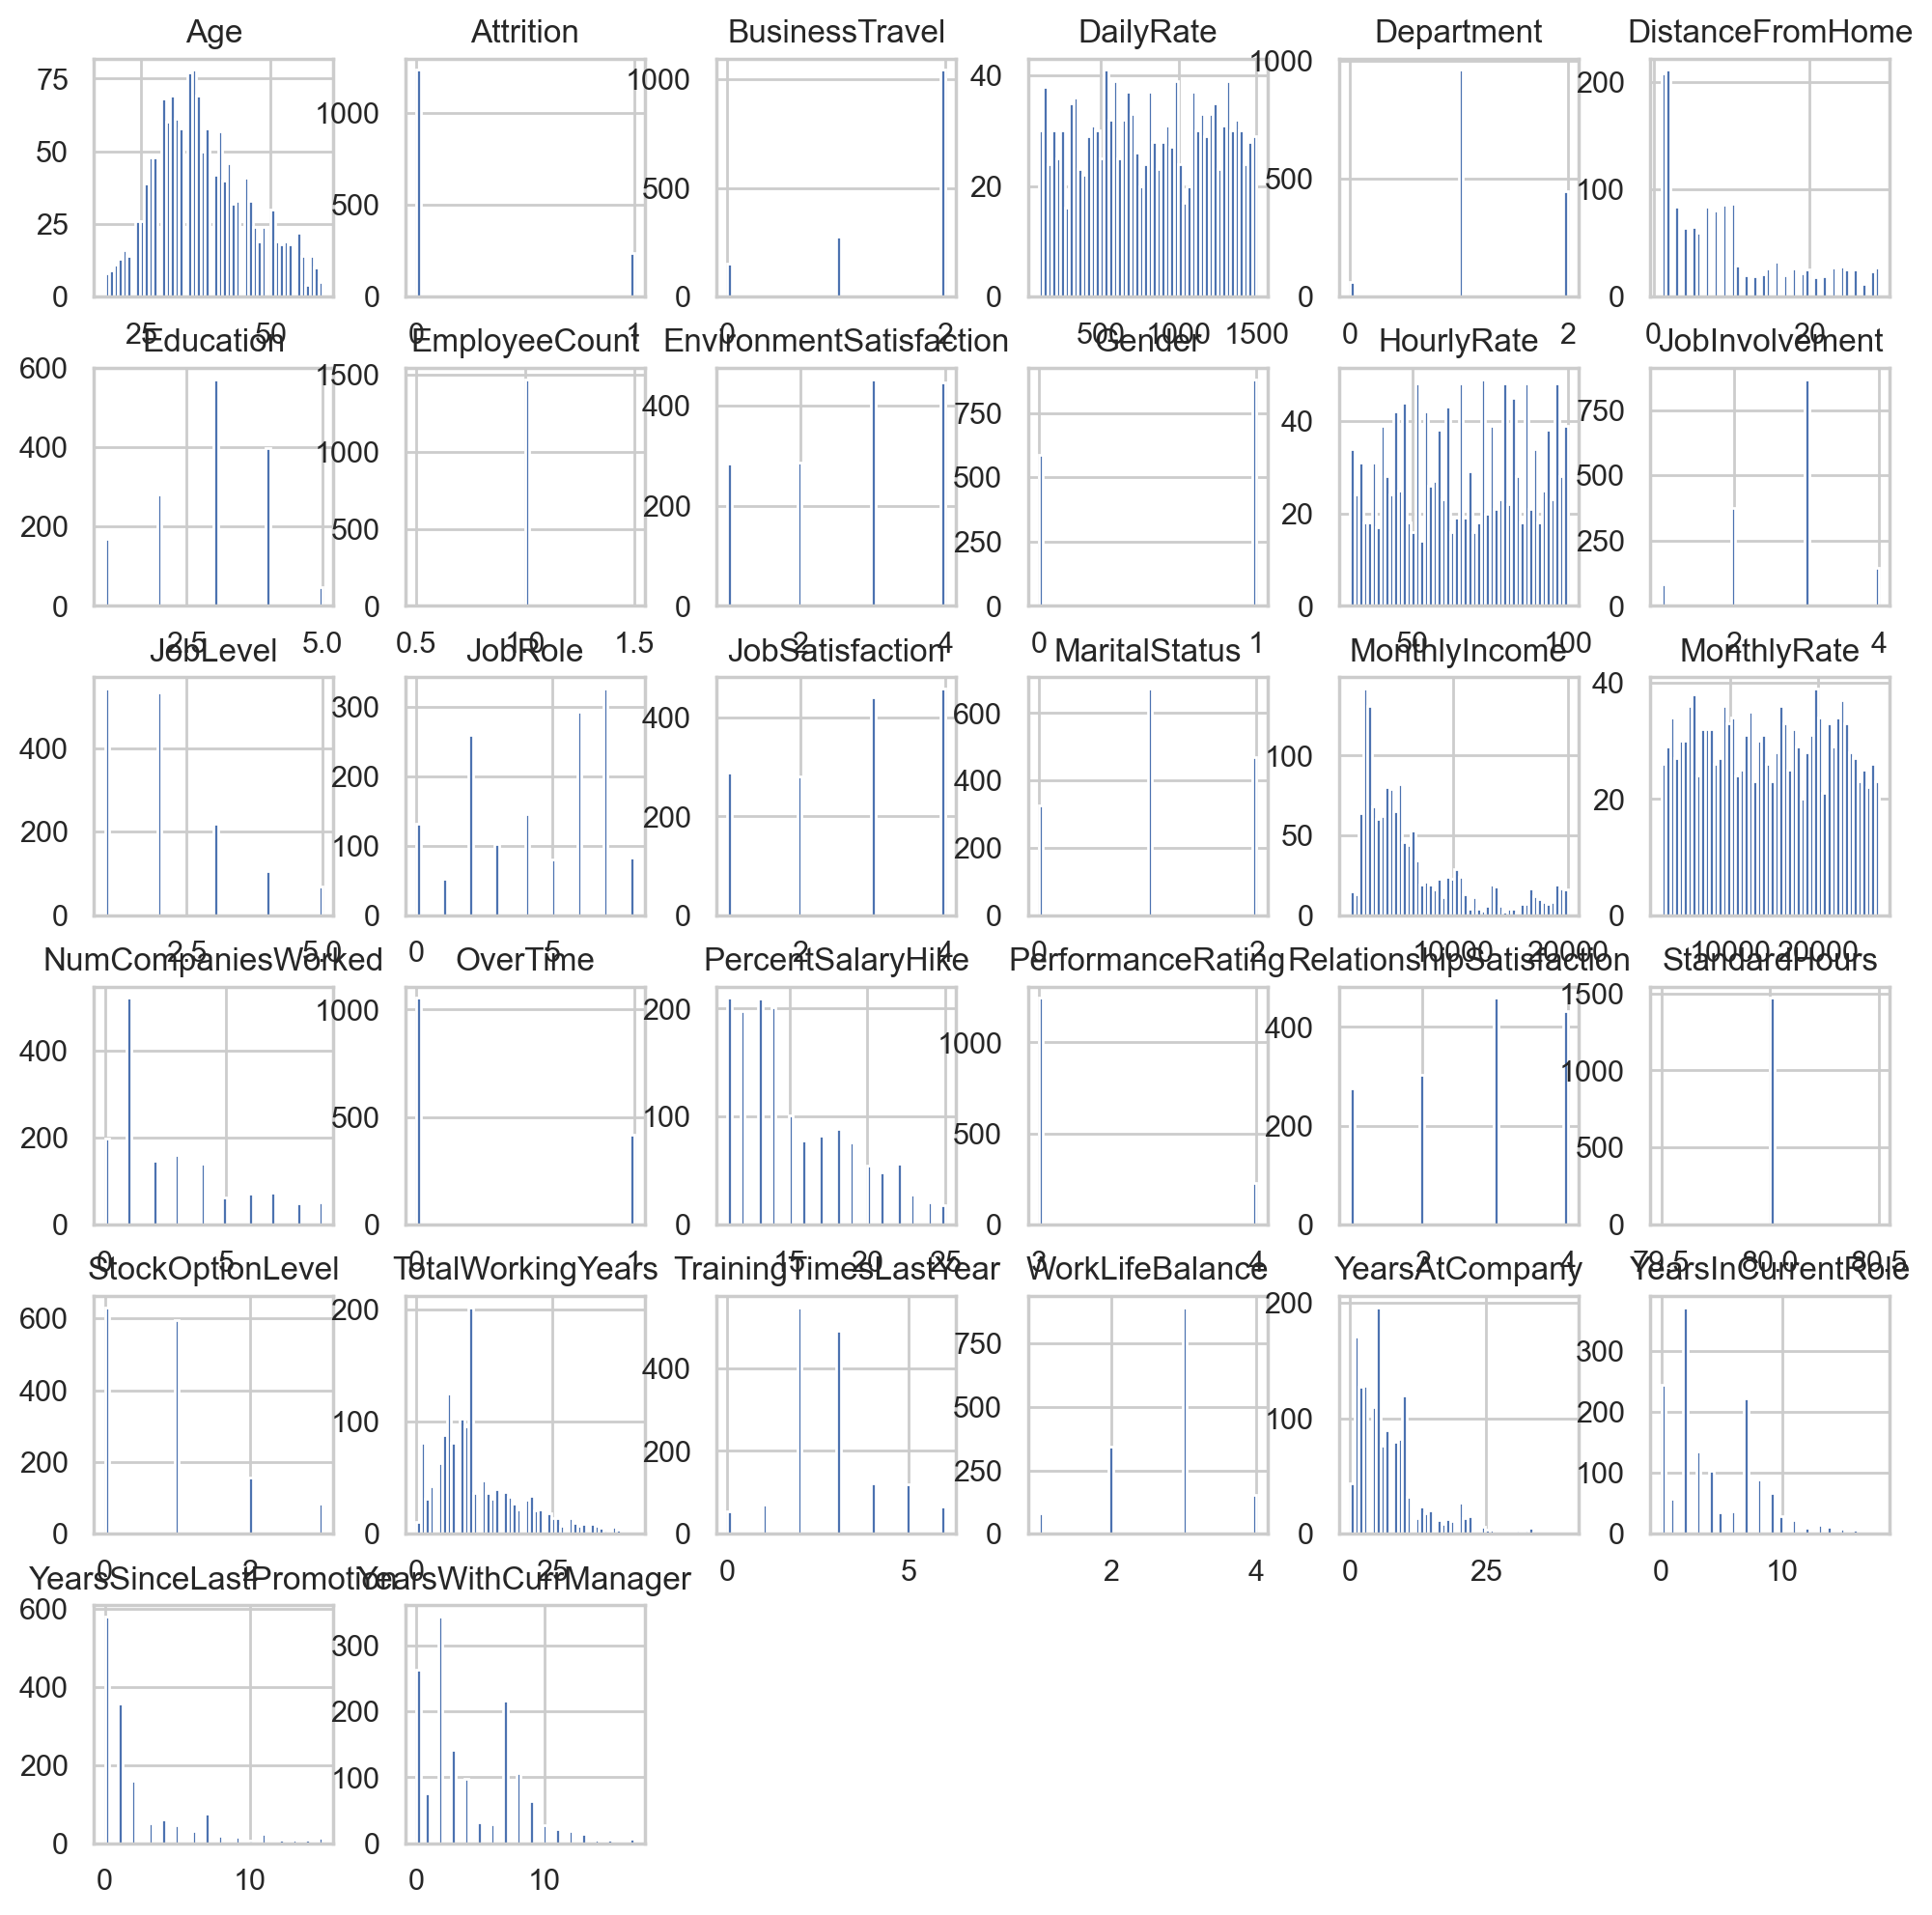

In [533]:
df_encoded.hist(bins=50, figsize=(12,12));

- Age: 정규분포를 가지지만, 일부 데이터 왜곡, 대부분의 직원들이 30대에서 40대에 분포.
- Attrition: 이직 여부 변수는 불균형한 분포. 이직한 직원 수보다 이직하지 않은 직원 수가 더 많다.
- DistanceFromHome: 대부분 직장에서 10마일 이내 거리에 살고 있다.
- Education: 대부분 대학교를 졸업했거나 대학원 석사?
- JobLevel: 대부분 1~2 레벨에 분포해 있습니다.
- MonthlyIncome: 대부분 수입이 5천 달러에서 10천 달러 사이에 분포
- NumCompaniesWorked: 대부분 1~3 개의 회사에서 근무한 경력을 가짐
- PercentSalaryHike: 대부분 10~20%의 연봉 인상을 받았다.
- TotalWorkingYears: 대부분 0~10년 사이에 근무 경력
- TrainingTimesLastYear: 지난 해 대부분 2~3회의 교육을 받았다.
- YearsAtCompany: 대부분 0~10년 사이에 근속 경력을 가진다.
- YearsSinceLastPromotion: 대부분 마지막 진급 이후 0~3년 사이에 있다.
- YearsWithCurrManager: 대부분 현재 매니저와 함께 0~5년 사이에 근무

### 불필요 컬럼 삭제

In [534]:
# 인코딩 안한 데이터셋
# DailyRate, HourlyRate, MonthlyRate, Over18, EmployeeCount, StandardHours
df_drop = df_raw.drop(columns=['DailyRate', 'HourlyRate', 'MonthlyRate', 'Over18', 'EmployeeCount', 'StandardHours'])
df_drop.head(2)

Age Attrition     BusinessTravel              Department  \
EmployeeNumber                                                             
1                41       Yes      Travel_Rarely                   Sales   
2                49        No  Travel_Frequently  Research & Development   

                DistanceFromHome  Education EducationField  \
EmployeeNumber                                               
1                              1          2  Life Sciences   
2                              8          1  Life Sciences   

                EnvironmentSatisfaction  Gender  JobInvolvement  ...  \
EmployeeNumber                                                   ...   
1                                     2  Female               3  ...   
2                                     3    Male               2  ...   

                PerformanceRating RelationshipSatisfaction  StockOptionLevel  \
EmployeeNumber                                                                 
1                               3                        1                 0   
2                               4                        4                 1   

               TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
EmployeeNumber                                                             
1                              8                      0                1   
2                             10                      3                3   

               YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                               
1                           6                   4                        0   
2                          10                   7                        1   

                YearsWithCurrManager  
EmployeeNumber                        
1                                  5  
2                                  7  

[2 rows x 28 columns]

In [535]:
df_drop.columns.nunique()

28

In [536]:
# 인코딩한 데이터셋
# DailyRate, HourlyRate, MonthlyRate, Over18, EmployeeCount, StandardHours
df_encoded_drop = df_raw.drop(columns=['DailyRate', 'HourlyRate', 'MonthlyRate', 'Over18', 'EmployeeCount', 'StandardHours'])
df_encoded_drop.head(2)

Age Attrition     BusinessTravel              Department  \
EmployeeNumber                                                             
1                41       Yes      Travel_Rarely                   Sales   
2                49        No  Travel_Frequently  Research & Development   

                DistanceFromHome  Education EducationField  \
EmployeeNumber                                               
1                              1          2  Life Sciences   
2                              8          1  Life Sciences   

                EnvironmentSatisfaction  Gender  JobInvolvement  ...  \
EmployeeNumber                                                   ...   
1                                     2  Female               3  ...   
2                                     3    Male               2  ...   

                PerformanceRating RelationshipSatisfaction  StockOptionLevel  \
EmployeeNumber                                                                 
1                               3                        1                 0   
2                               4                        4                 1   

               TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
EmployeeNumber                                                             
1                              8                      0                1   
2                             10                      3                3   

               YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                               
1                           6                   4                        0   
2                          10                   7                        1   

                YearsWithCurrManager  
EmployeeNumber                        
1                                  5  
2                                  7  

[2 rows x 28 columns]

### 상관관계

* 인코딩 안한 데이터 상관관계

/var/folders/kd/wh5__hs12zb40t3r3stb8yhr0000gn/T/ipykernel_39828/3646109233.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



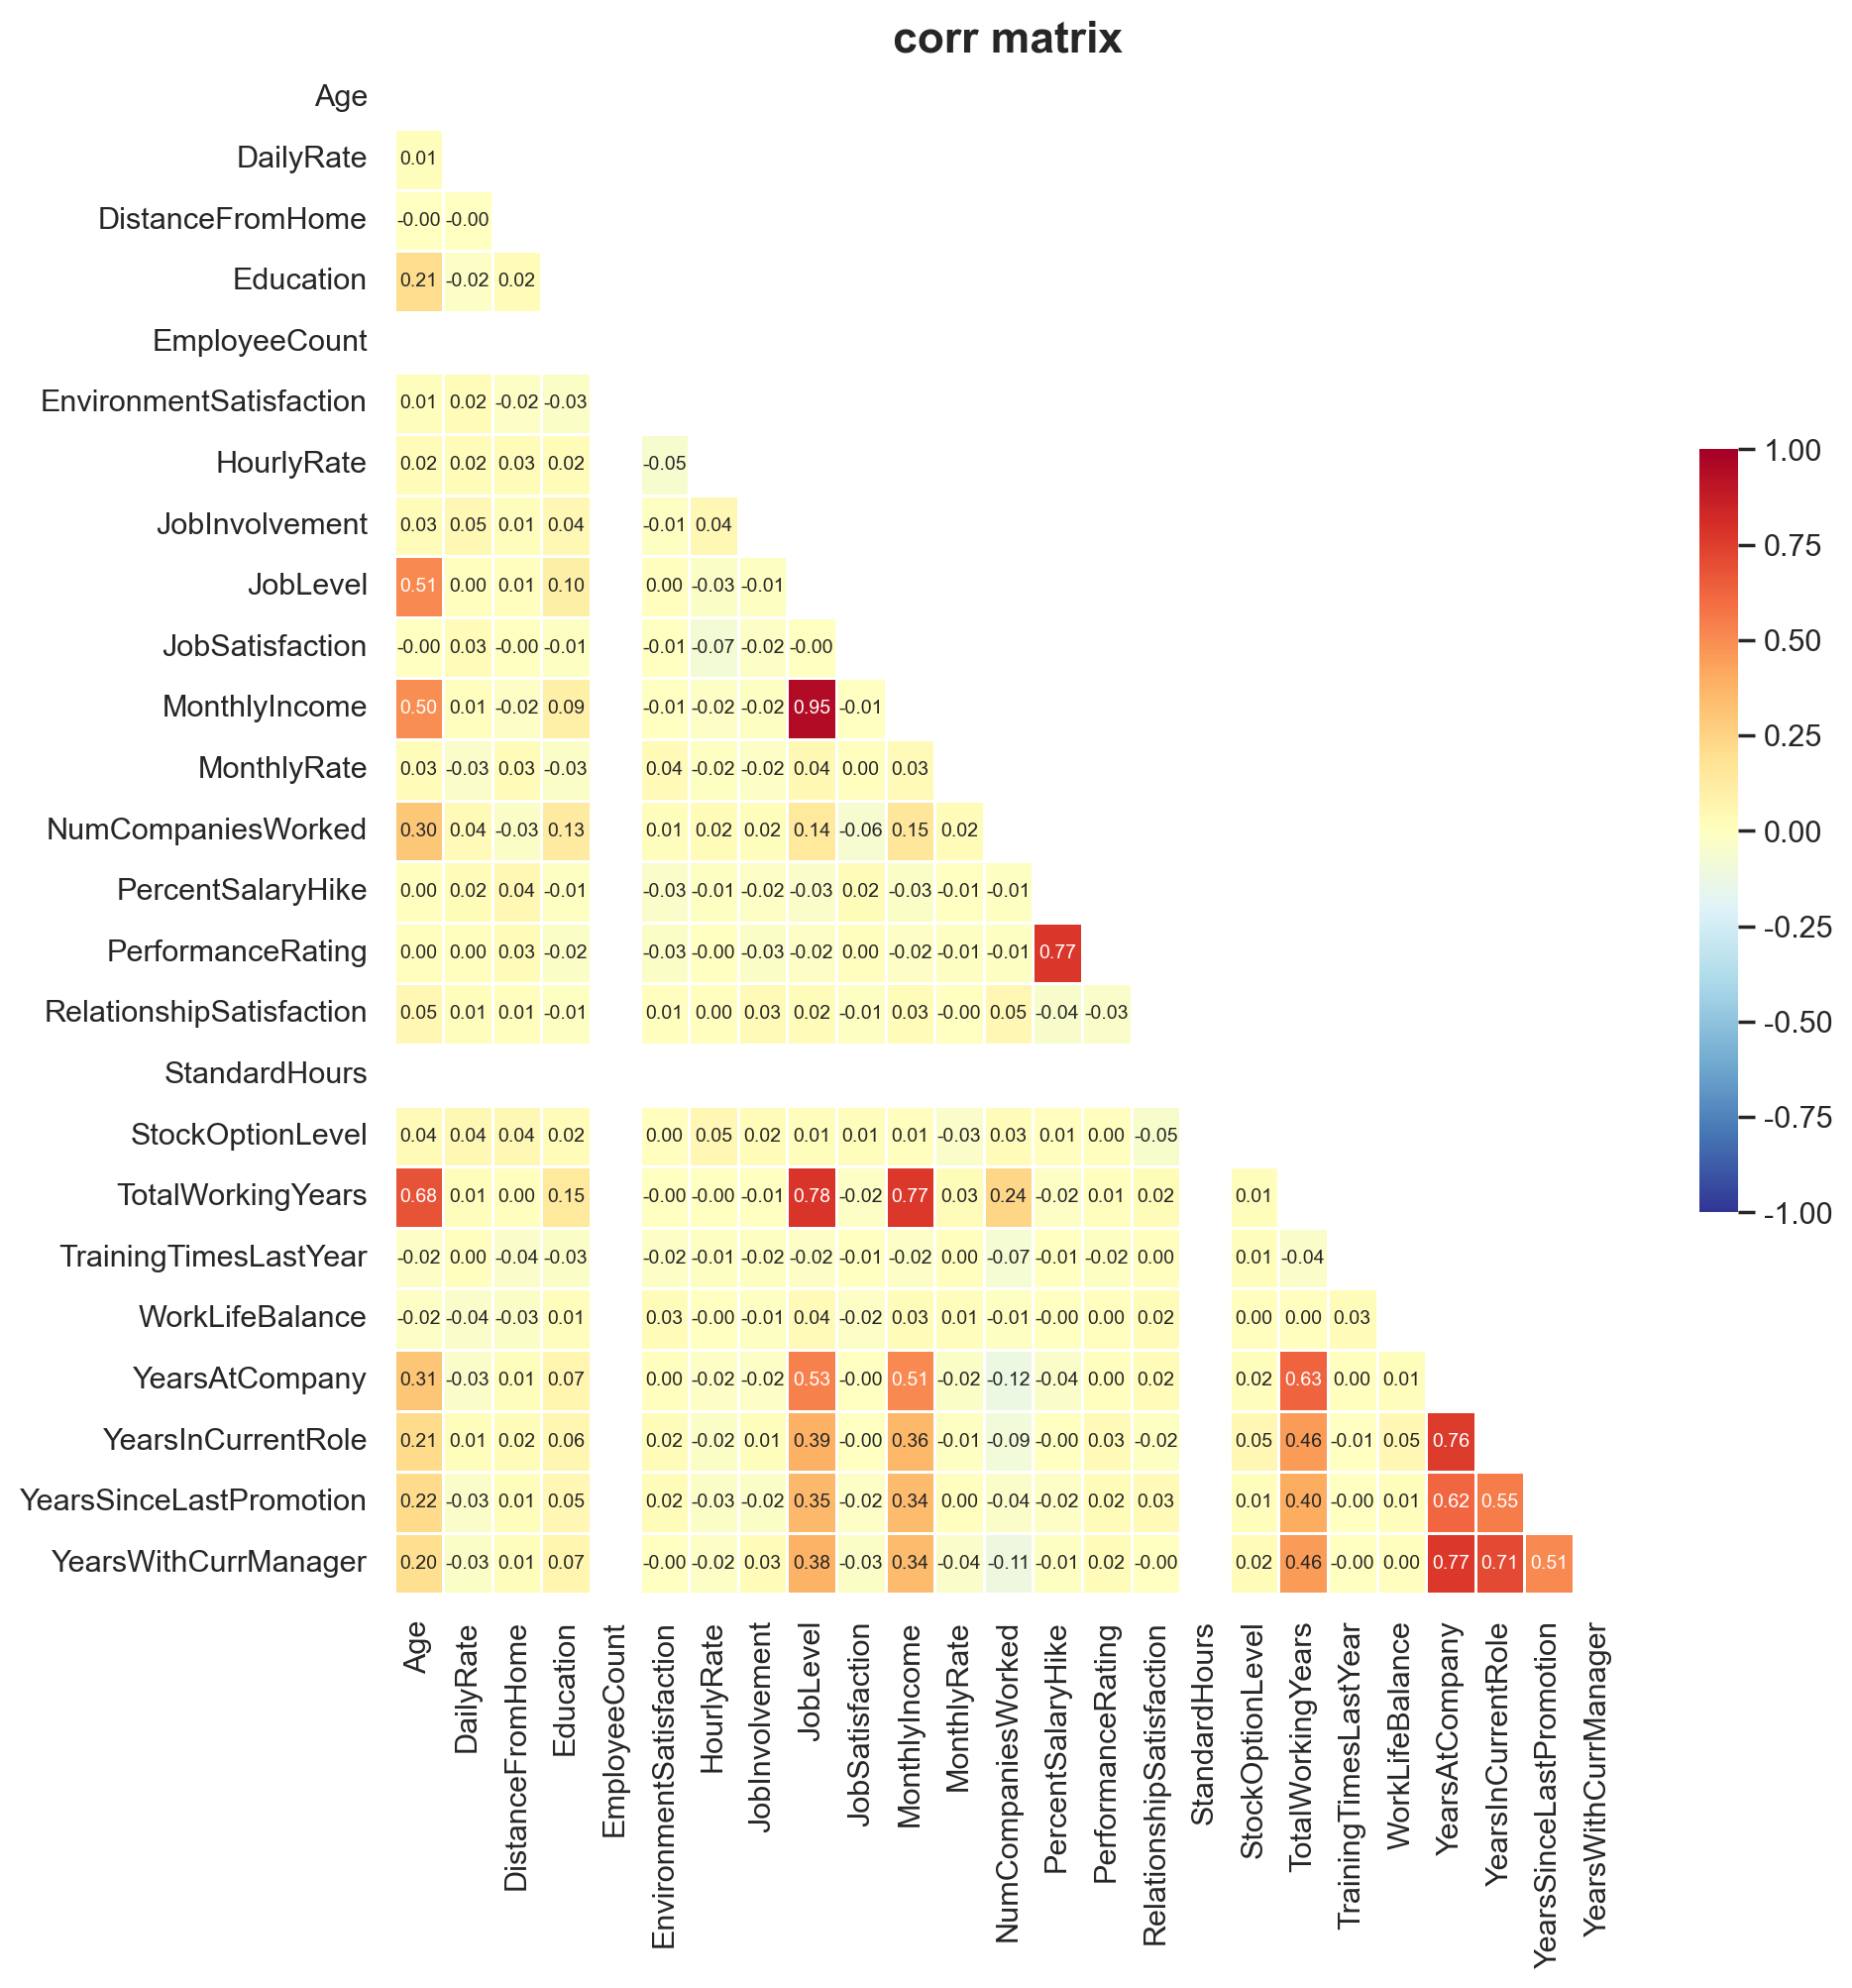

In [537]:
corr = df_raw.corr()
fig, ax = plt.subplots(figsize=(10,10))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            annot_kws={'size' : 7}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.2f',    # annot 소수점 2자리까지
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('corr matrix', fontweight="bold", fontsize=16)
plt.show()

* `인코딩` 데이터 상관관계

In [538]:
# 인코딩 데이터 상관관계
encoded_corr = df_encoded.corr()

/var/folders/kd/wh5__hs12zb40t3r3stb8yhr0000gn/T/ipykernel_39828/2052333042.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

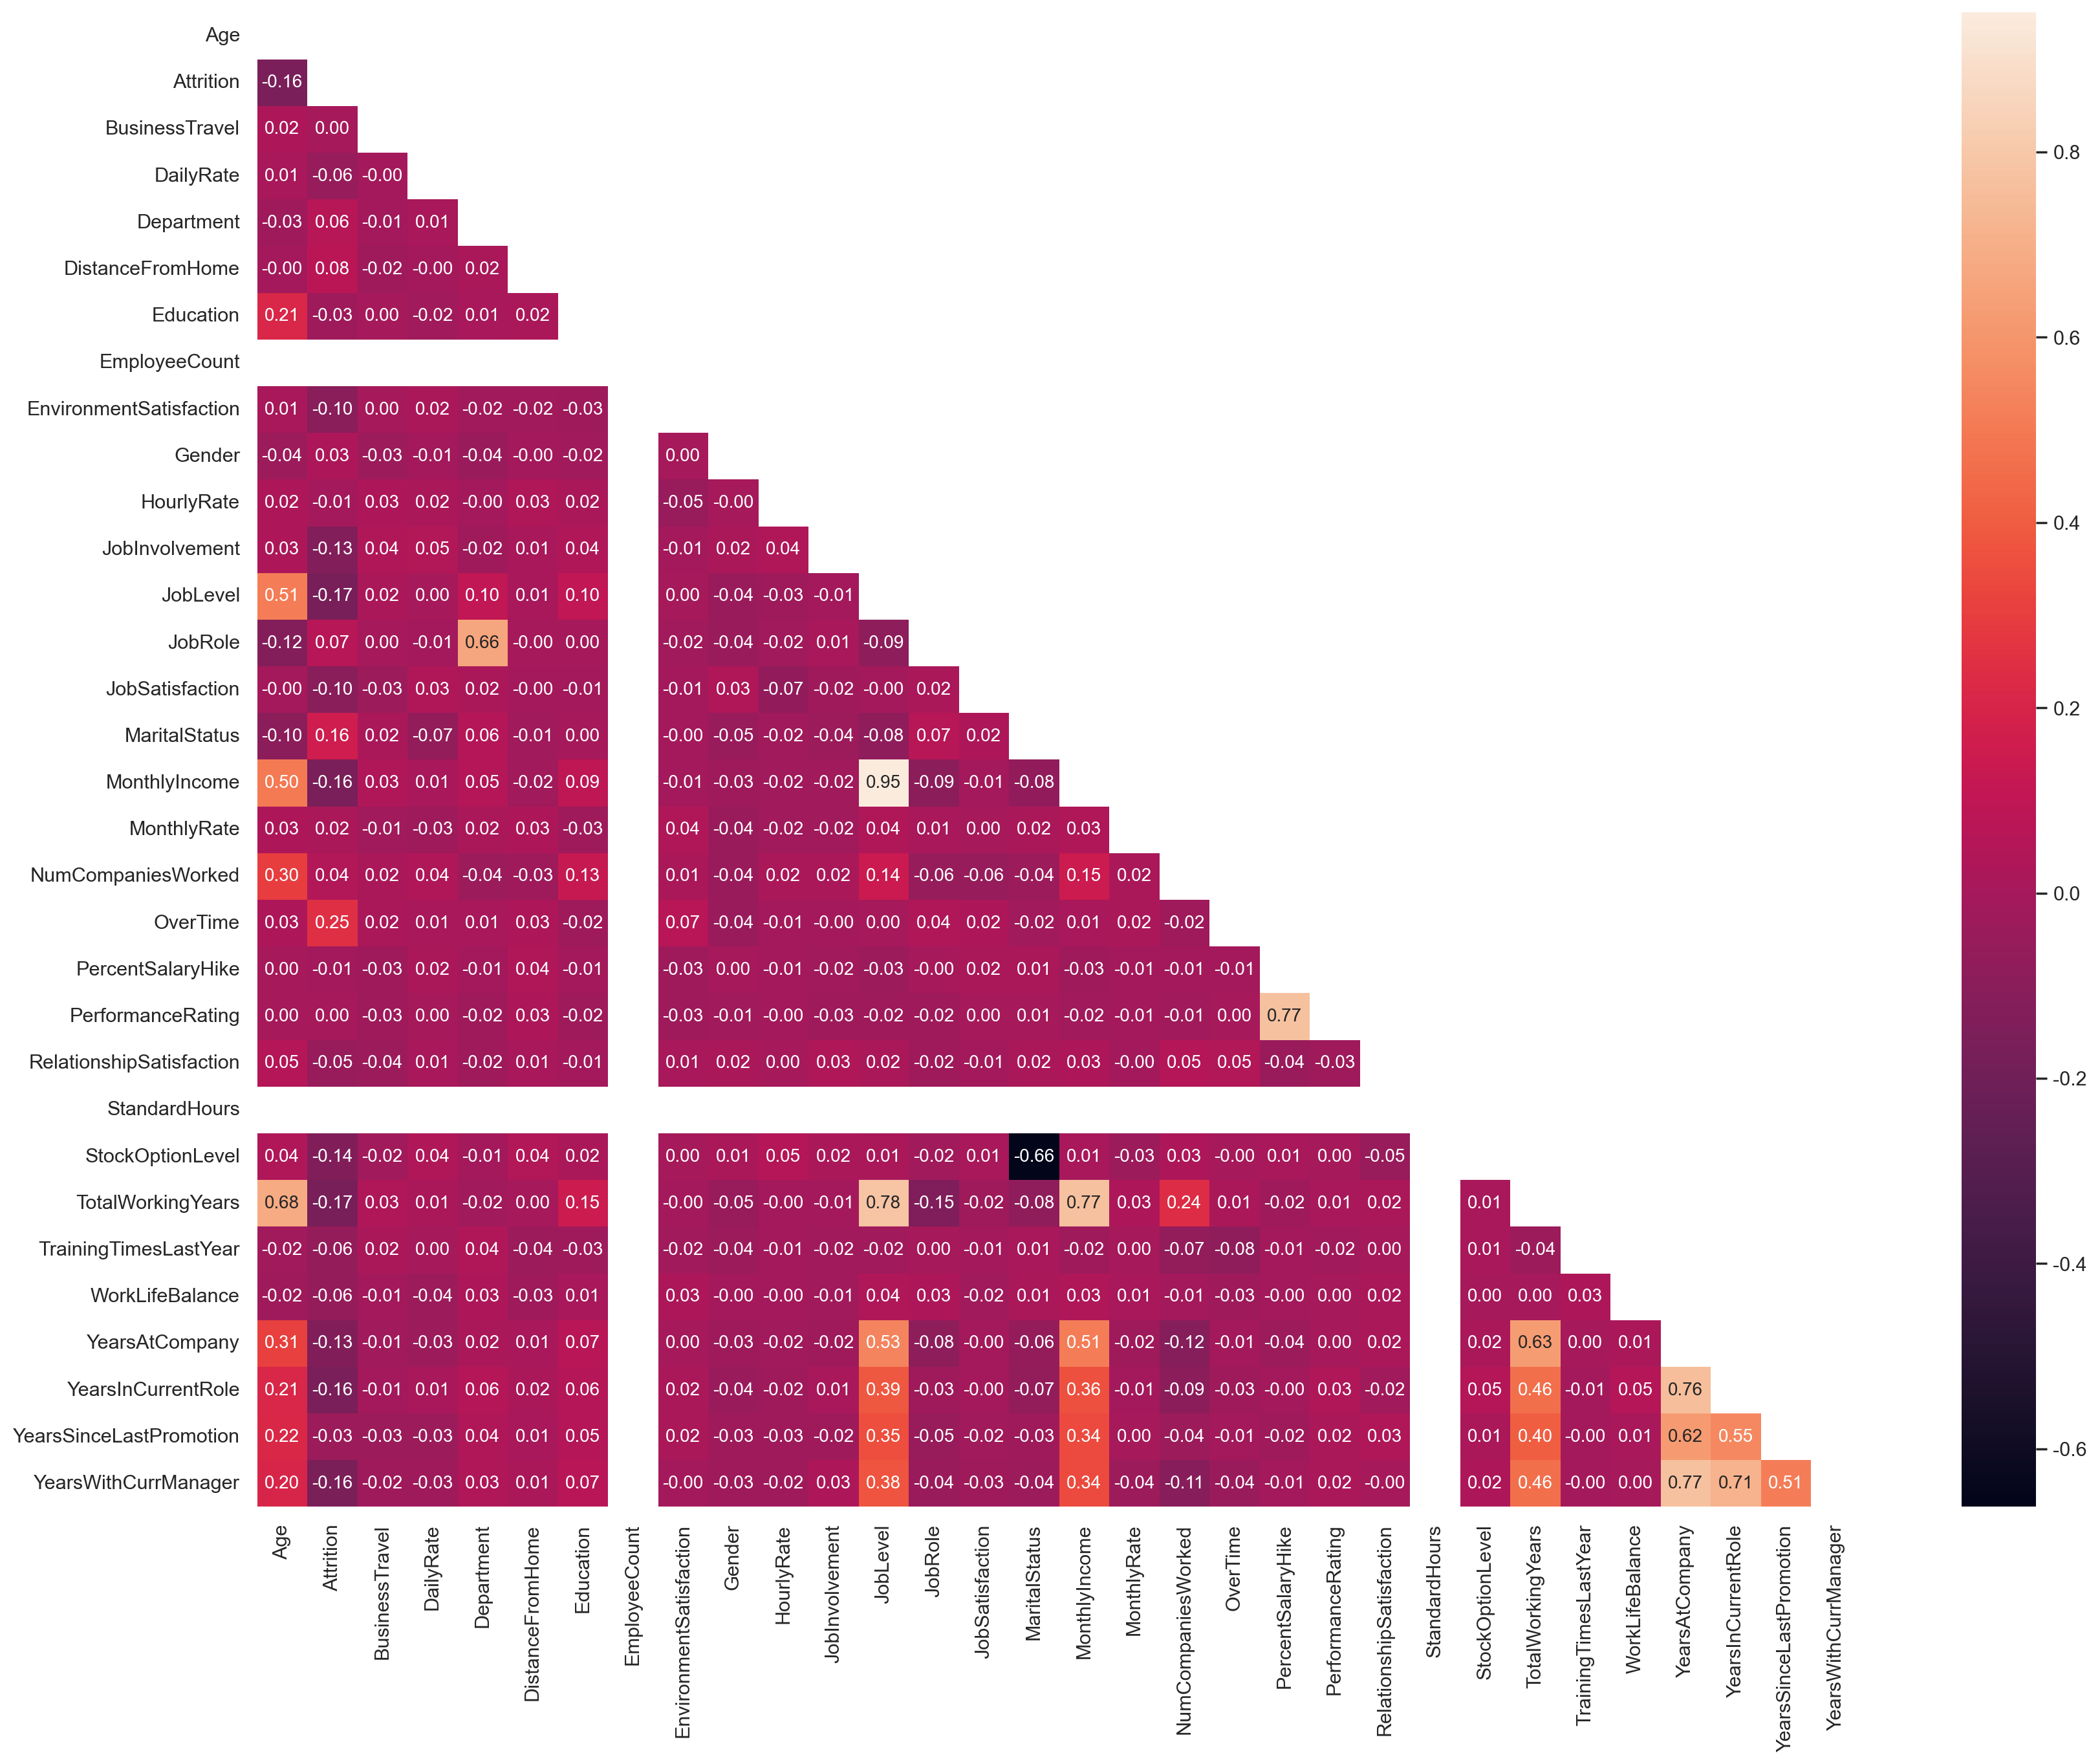

In [539]:
plt.rcParams["figure.figsize"] = [20,15]
mask = np.zeros_like(encoded_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(encoded_corr,
            mask=mask,
            annot=True,
            annot_kws={'size' : 10},
            fmt = '.2f',   
            xticklabels=encoded_corr.columns,
            yticklabels=encoded_corr.columns)

- 월 소득은 직급, 근무연차와 높은 상관관계
- 직급은 근무연차와 높은 상관관계
- 나이와 근무연차 높은 상관관계
- 역할은 부서와 양의 상관?
- 결혼 여부와 스톡옵션 수준은 음의 상관관계
- 업무수행율(?)은 급여인상율과 양의 상관관계
- EmployeeCount, StandardHours는 제외 시켜도 될 컬럼으로 보임

In [540]:
df_drop.select_dtypes(include='number').columns.nunique()

20

* 수치형 변수 박스플롯

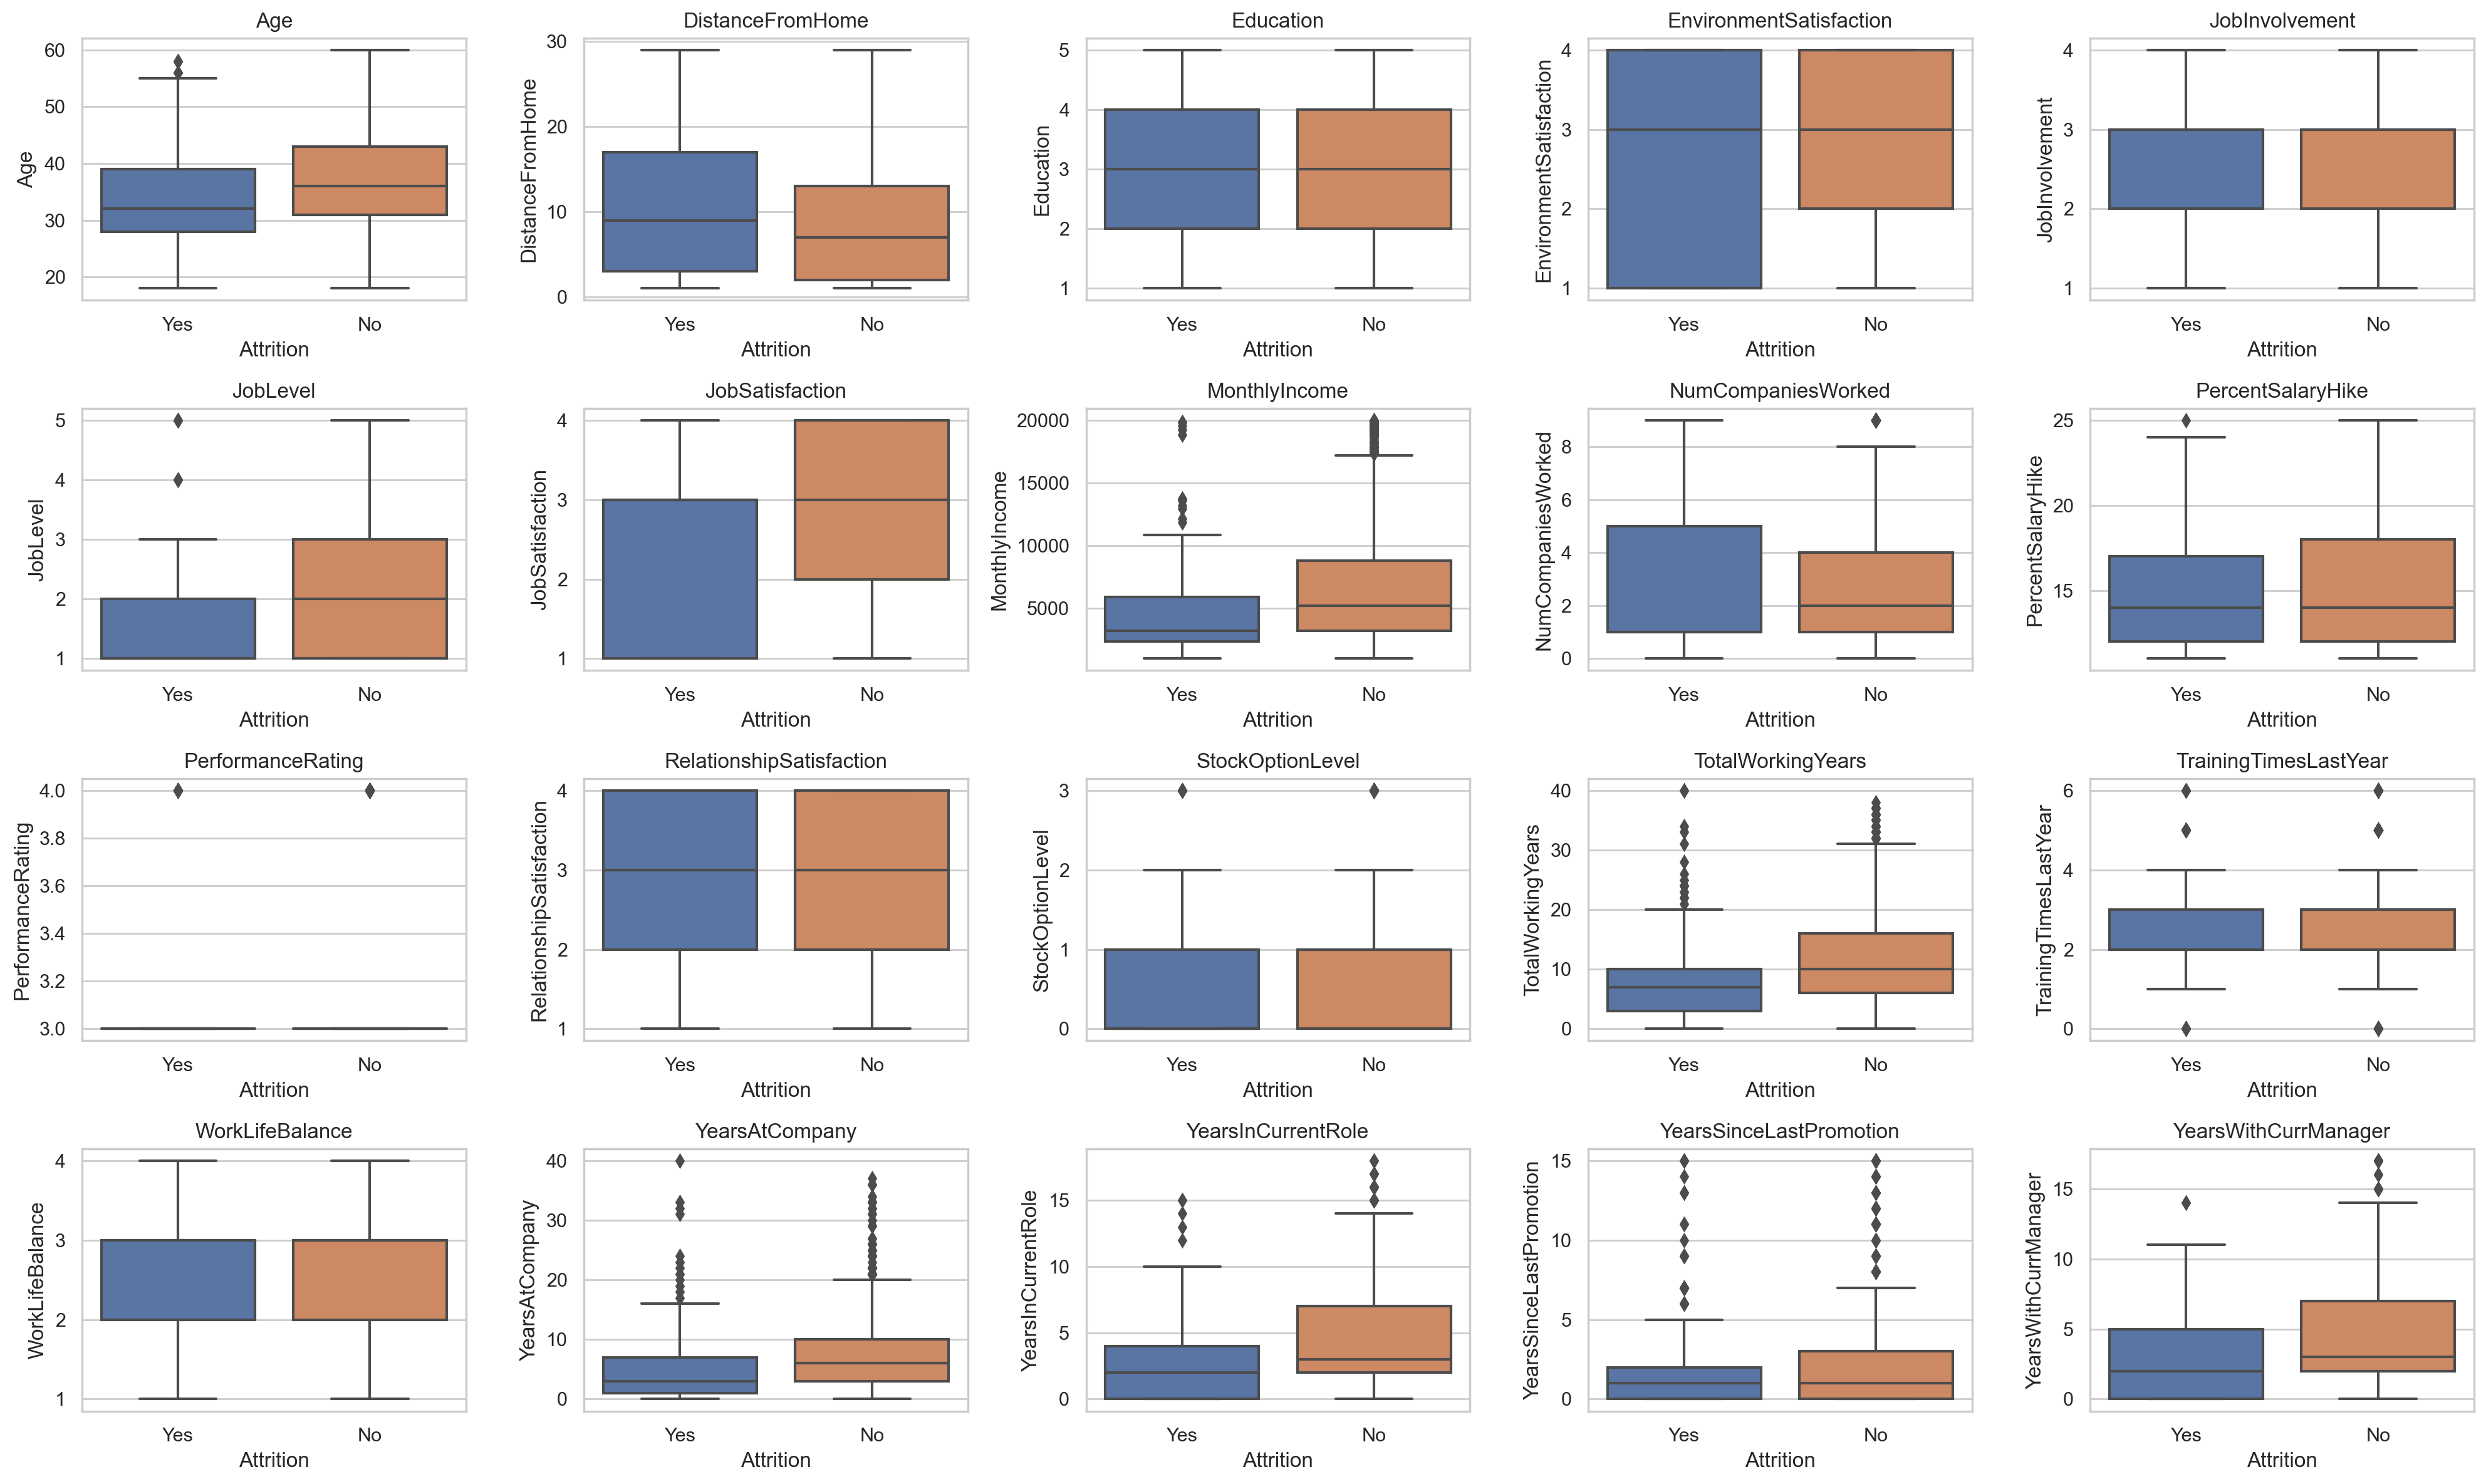

In [541]:
# 수치형 변수들 - attrtion 관계 살펴보기
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 12))

numeric_cols = df_drop.select_dtypes(include='number').columns

for col, ax in zip(numeric_cols, axes.flatten()):
    sns.boxplot(x='Attrition', y=col, data=df_raw, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

* Education, JobInvolvement, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance는 퇴직자, 재직자 동일함
* EnvironmentSatisfaction, NumCompaniesWorked, PercentSalaryHike,YearsSinceLastPromotion 은 아주 살짝씩 크기 차이 있음.

* PCA로 차원축소하기

In [605]:
df_pca = df_drop.copy(deep=True)

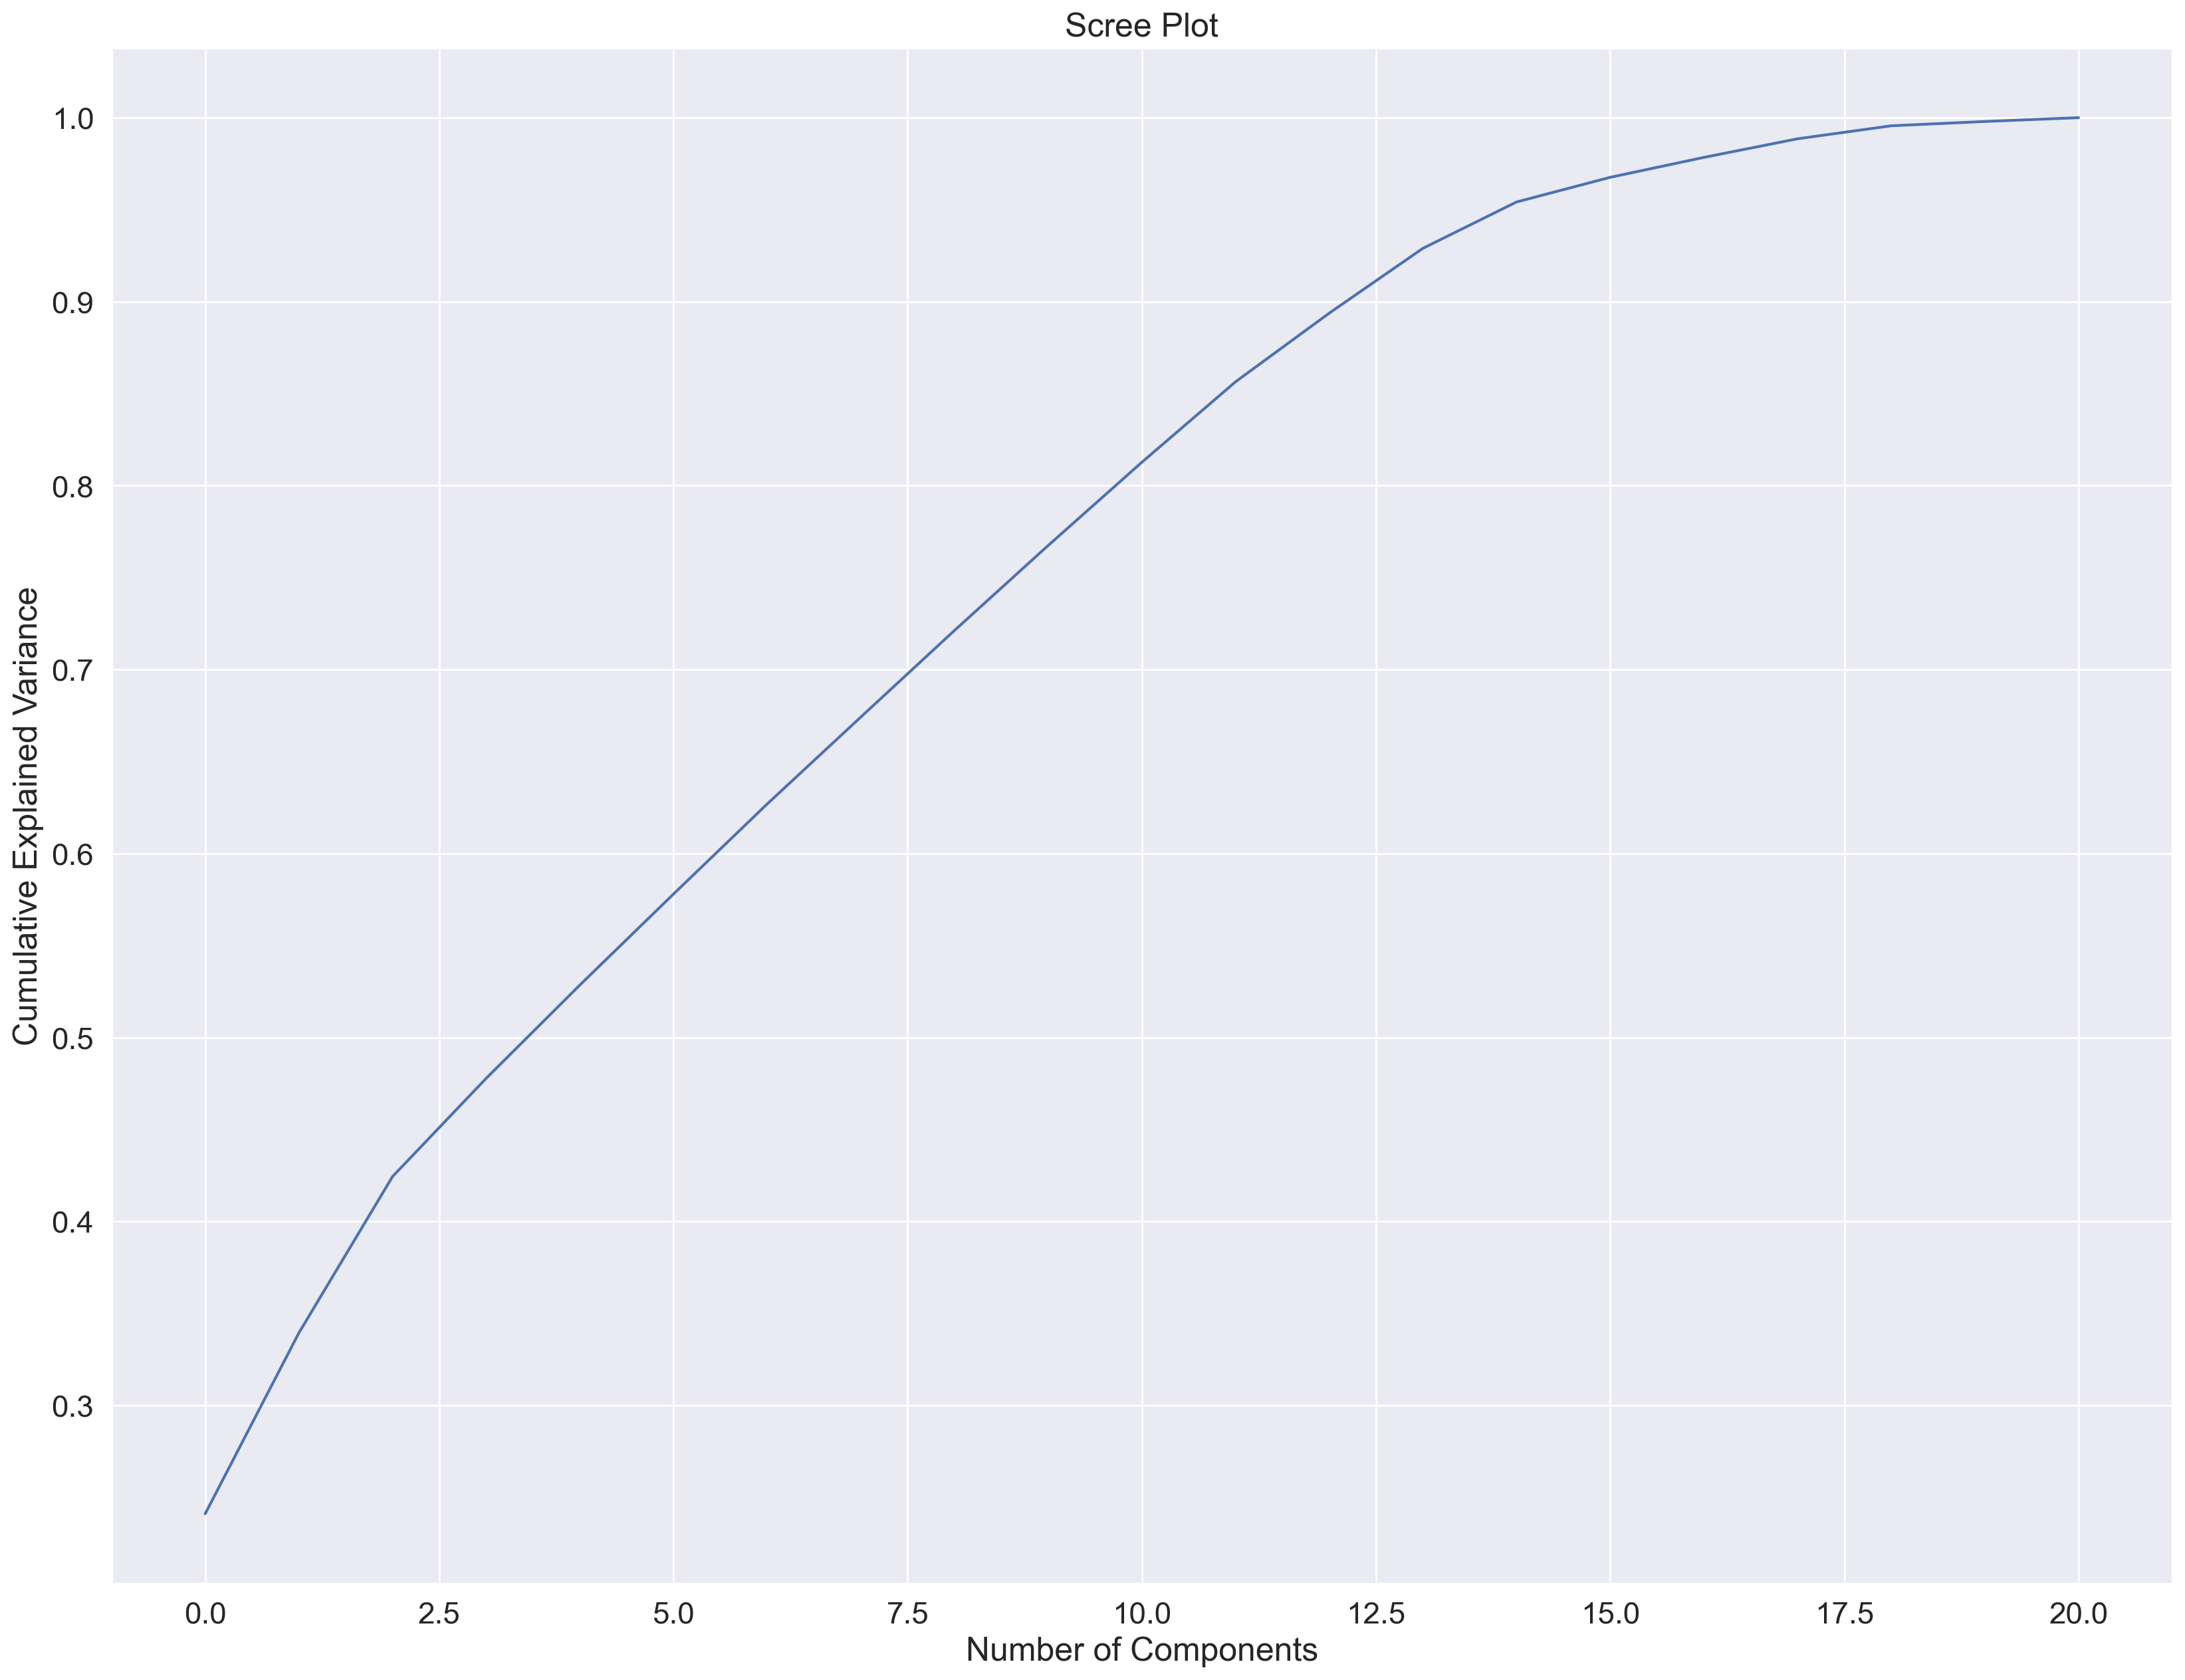

In [606]:
# 데이터 스케일링
numeric_cols = df_pca.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca[numeric_cols])

# 주성분 분석 모델 생성
pca = PCA()

# 주성분 분석 실행
pca.fit(df_scaled)

# 주성분별 설명 분산 비율 확인
variance_ratio = pca.explained_variance_ratio_

# 누적 설명 분산 그래프 그리기
cumulative_variance_ratio = np.cumsum(variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [600]:
df_pca.head(2)

Age  Attrition  BusinessTravel  Department  \
EmployeeNumber                                                    
1               0.446350          1               2           2   
2               1.322365          0               1           1   

                DistanceFromHome  Education  EducationField  \
EmployeeNumber                                                
1                      -1.010909  -0.891688               1   
2                      -0.147150  -1.868426               1   

                EnvironmentSatisfaction  Gender  JobInvolvement  ...  \
EmployeeNumber                                                   ...   
1                             -0.660531       0        0.379672  ...   
2                              0.254625       1       -1.026167  ...   

                PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
EmployeeNumber                                                                  
1                       -0.426230                 -1.584178         -0.932014   
2                        2.346151                  1.191438          0.241988   

                TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
EmployeeNumber                                                              
1                       -0.421642              -2.171982        -2.493820   
2                       -0.164511               0.155707         0.338096   

                YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                                
1                    -0.164613           -0.063296                -0.679146   
2                     0.488508            0.764998                -0.368715   

                YearsWithCurrManager  
EmployeeNumber                        
1                           0.245834  
2                           0.806541  

[2 rows x 28 columns]

In [607]:
# # 범주형 변수 레이블 인코딩
# cat_cols = df_drop.select_dtypes(include='object').columns.tolist()
# encoder = LabelEncoder()
# df_pca[cat_cols] = df_pca[cat_cols].apply(encoder.fit_transform)

# 표준화
scaler = StandardScaler()
df_pca[numeric_cols] = scaler.fit_transform(df_pca[numeric_cols])

# 주성분 분석
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_pca[numeric_cols])

# 변수 계수 데이터프레임 만들기
df_coef = pd.DataFrame(pca.components_, columns=numeric_cols)
df_coef.index = ['PC1', 'PC2']
df_coef = df_coef.transpose()

# 결과 출력
print(df_coef.round(6))

                               PC1       PC2
Age                       0.310546  0.379635
DistanceFromHome          0.003298 -0.027142
Education                 0.085111  0.157534
EnvironmentSatisfaction   0.002782  0.001224
JobInvolvement            0.002679  0.038965
JobLevel                  0.368185  0.108658
JobSatisfaction          -0.008663 -0.015691
MonthlyIncome             0.360896  0.120644
NumCompaniesWorked        0.069431  0.410791
PercentSalaryHike        -0.013034 -0.045915
PerformanceRating         0.000334 -0.071336
RelationshipSatisfaction  0.018176  0.059792
StockOptionLevel          0.016237  0.001936
TotalWorkingYears         0.396864  0.132519
TrainingTimesLastYear    -0.011055 -0.042695
WorkLifeBalance           0.009054 -0.031527
YearsAtCompany            0.354692 -0.324339
YearsInCurrentRole        0.298596 -0.372209
YearsSinceLastPromotion   0.268012 -0.283020
YearsWithCurrManager      0.293322 -0.374942
Age_cat                   0.307060  0.371315


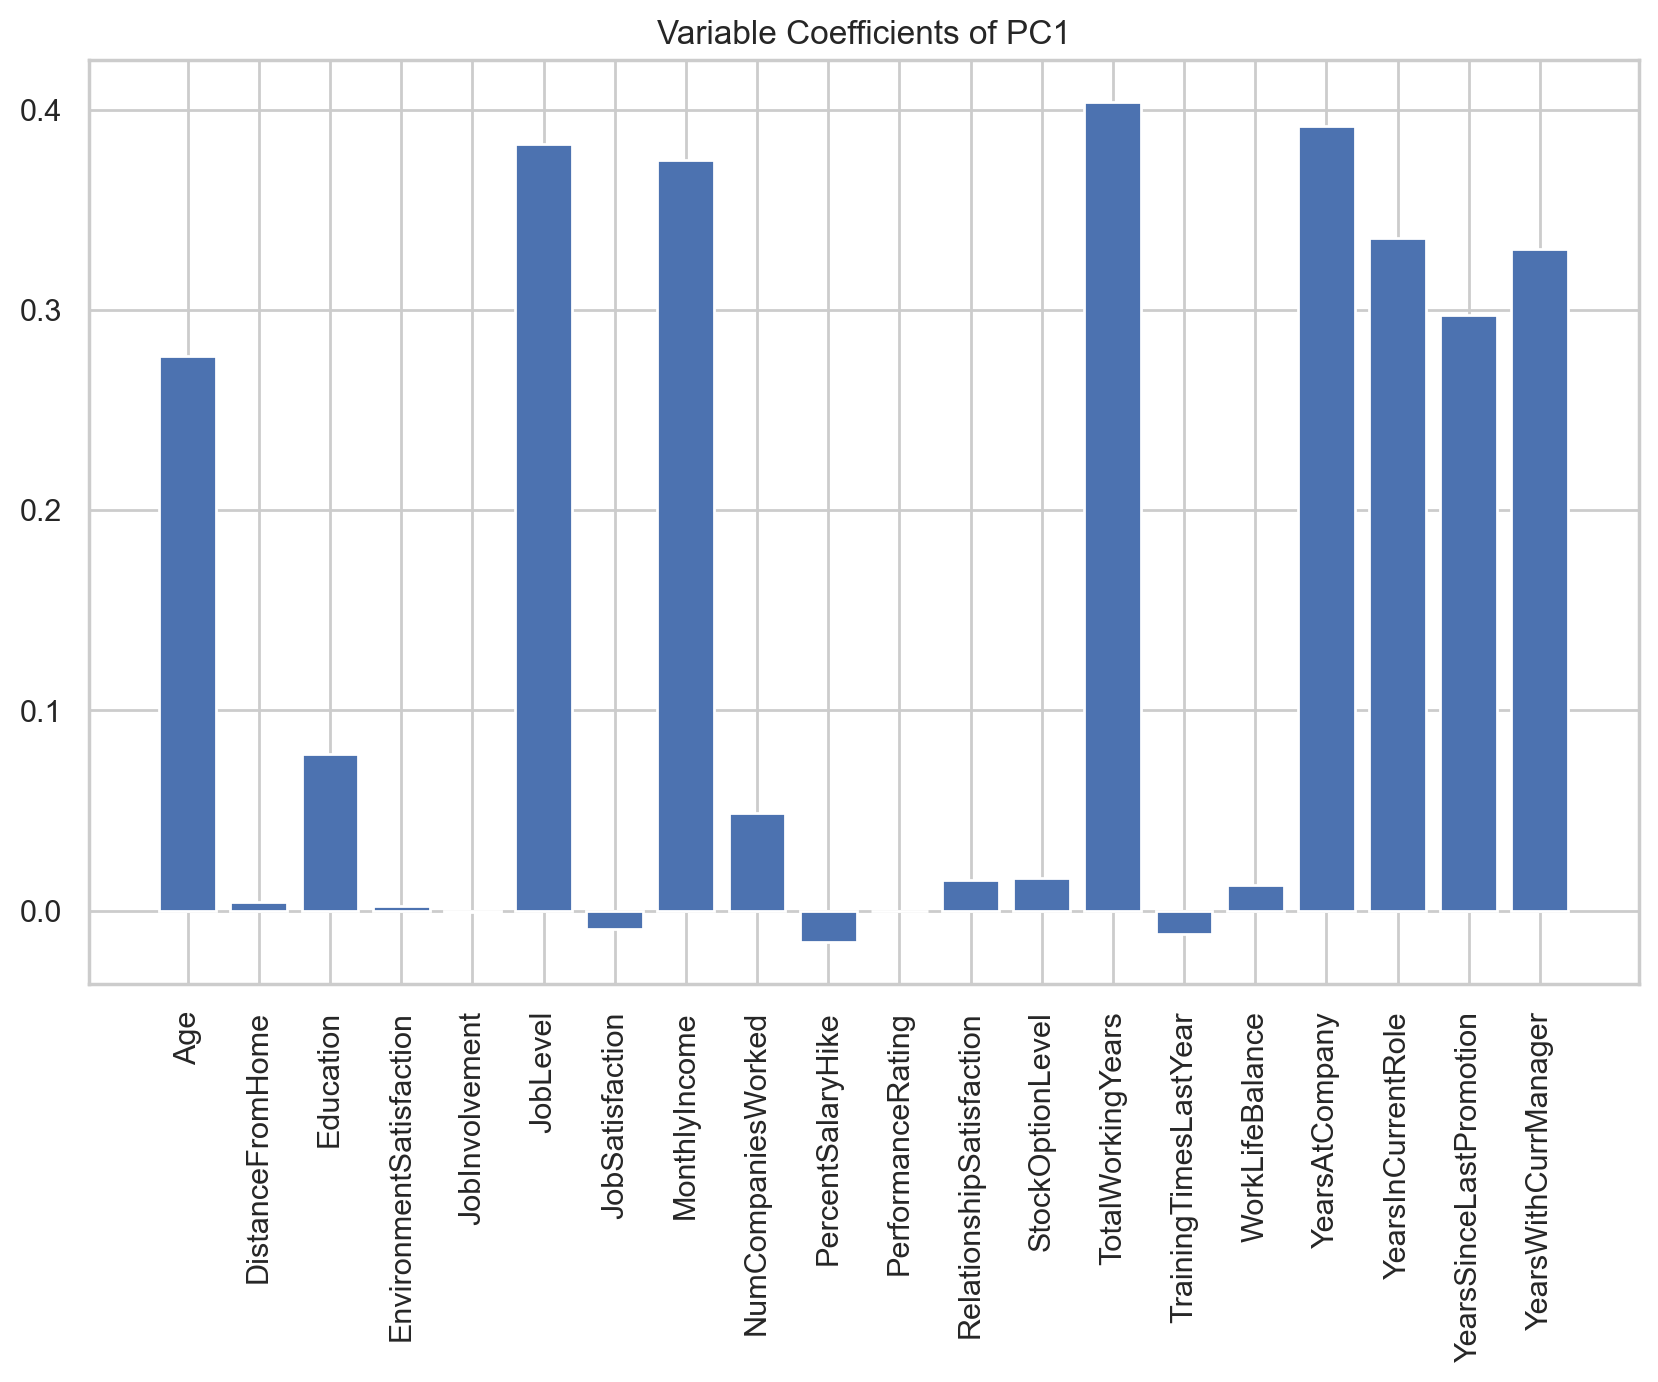

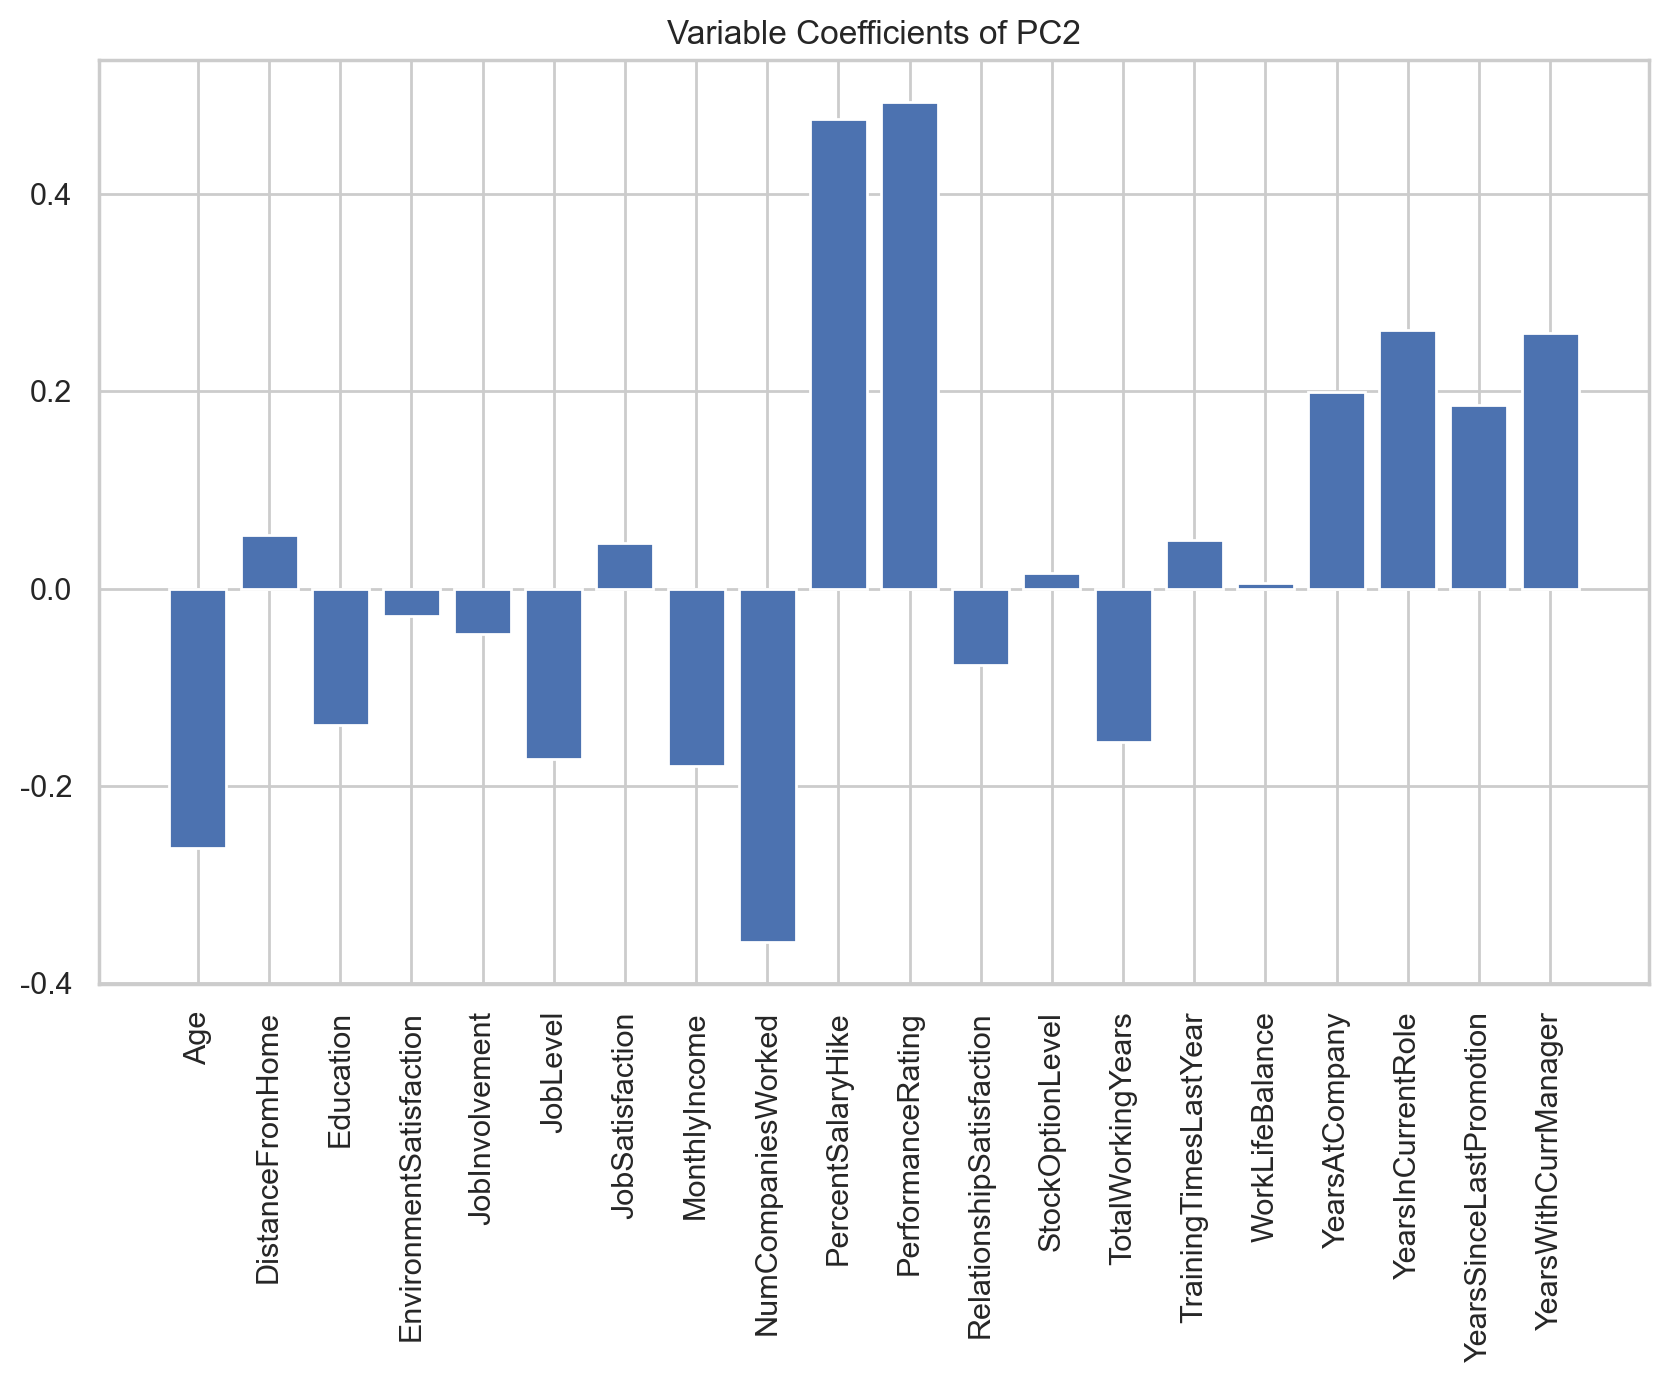

In [546]:
# PC1 변수 계수 시각화
plt.figure(figsize=(10,6))
plt.bar(x=df_coef.index, height=df_coef['PC1'].values)
plt.xticks(rotation=90)
plt.title('Variable Coefficients of PC1')
plt.show()

# PC2 변수 계수 시각화
plt.figure(figsize=(10,6))
plt.bar(x=df_coef.index, height=df_coef['PC2'].values)
plt.xticks(rotation=90)
plt.title('Variable Coefficients of PC2')
plt.show()

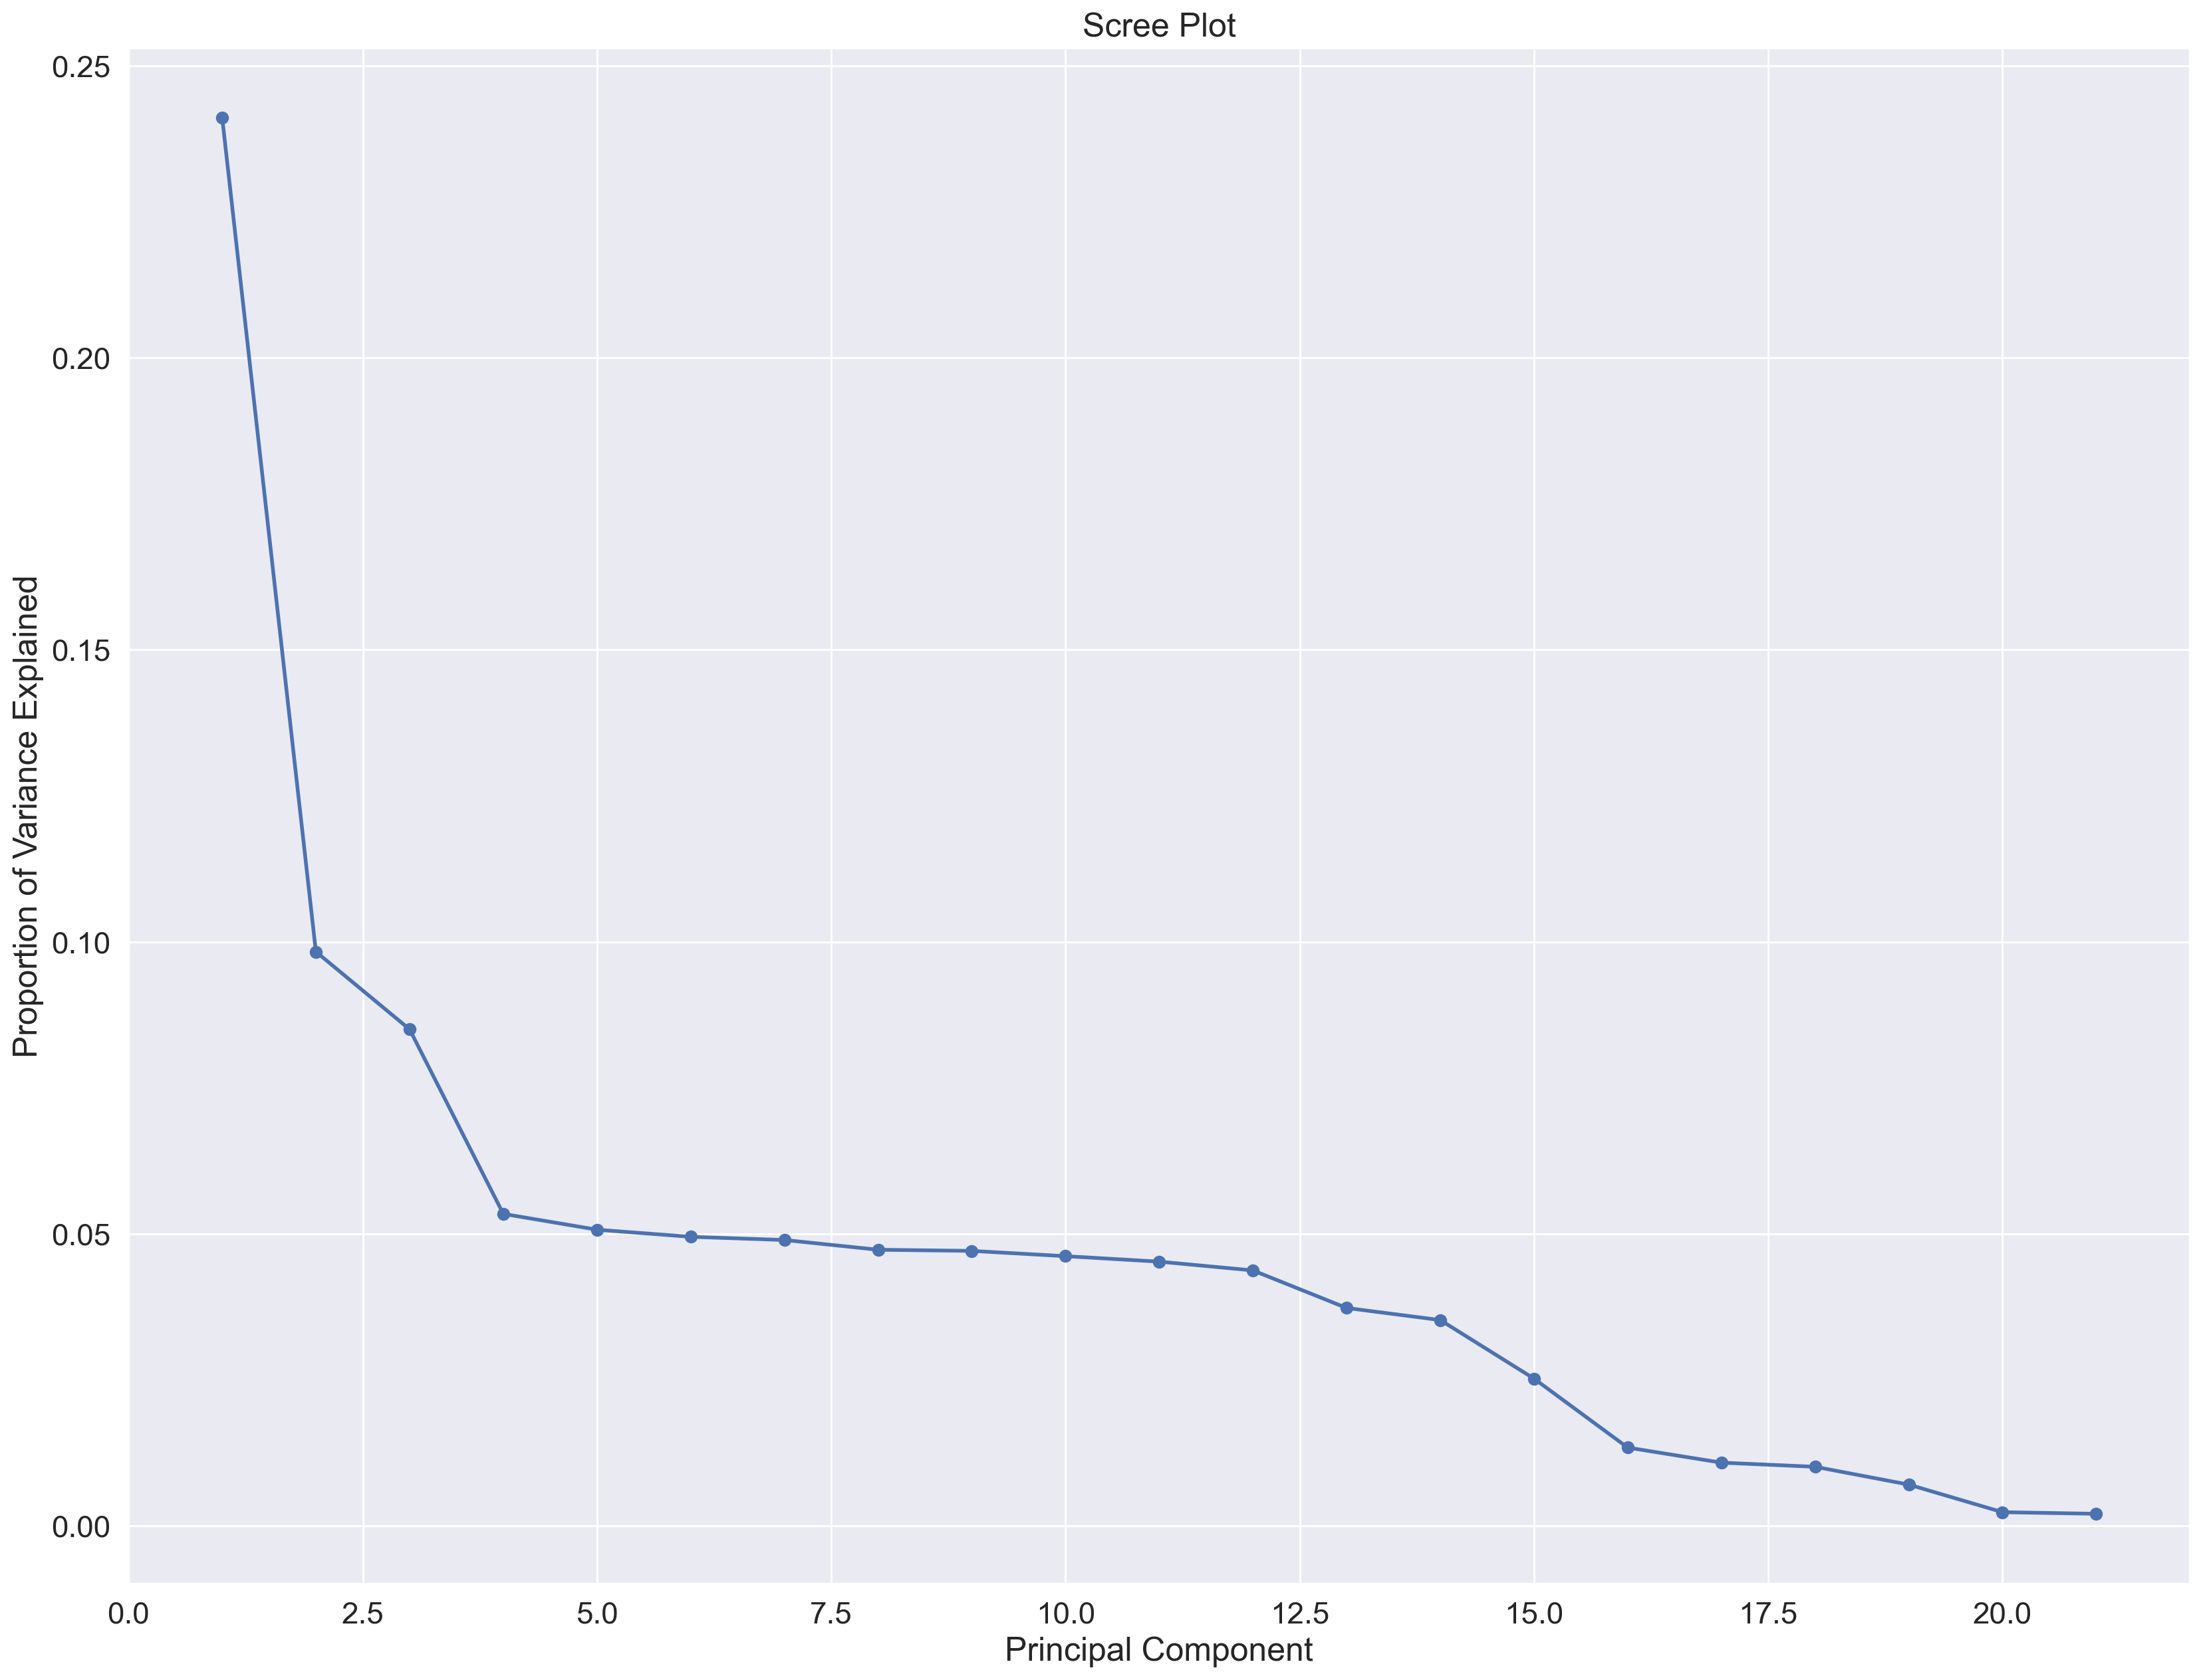

                               PC1       PC2       PC3       PC4
Age                       0.310547  0.379715  0.058147 -0.080377
DistanceFromHome          0.003295 -0.027272  0.060501 -0.403399
Education                 0.085112  0.157628  0.000605 -0.416419
EnvironmentSatisfaction   0.002784  0.001312 -0.054876  0.109190
JobInvolvement            0.002678  0.038847 -0.035001 -0.447461
JobLevel                  0.368185  0.108646 -0.011573  0.219590
JobSatisfaction          -0.008661 -0.015671  0.020885  0.067045
MonthlyIncome             0.360895  0.120623 -0.007127  0.240144
NumCompaniesWorked        0.069430  0.410541  0.028712 -0.060779
PercentSalaryHike        -0.013034 -0.045911  0.700154  0.022656
PerformanceRating         0.000334 -0.071331  0.697187  0.036107
RelationshipSatisfaction  0.018178  0.059880 -0.059141  0.054803
StockOptionLevel          0.016238  0.001946  0.018919 -0.377928
TotalWorkingYears         0.396865  0.132526  0.017430  0.068413
TrainingTimesLastYear    

In [624]:
df_pca = df_drop.copy(deep=True)

# 범주형 변수와 수치형 변수를 분리
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numeric_cols = [col for col in df_pca.columns if col not in categorical_cols and col != 'Attrition']

# One-hot encoding을 통해 범주형 변수를 수치형 변수로 변환
df_pca_encoded = pd.get_dummies(df_pca, columns=categorical_cols)

# StandardScaler를 사용하여 각 변수들의 스케일을 맞춤
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca_encoded[numeric_cols])

# PCA 모델 생성
pca = PCA()

# 주성분 분석 실행
pca.fit(df_scaled)

# Scree plot을 그려서 주성분의 개수를 결정
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# 4개의 주성분을 선택하여 분석
pca = PCA(n_components=4)
X_pca = pca.fit_transform(df_scaled)

# 결과를 데이터프레임으로 변환하여 저장
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Attrition'] = df_pca['Attrition']

# 시각화
# 변수 계수 데이터프레임 만들기
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, pca.n_components_+1)], index=numeric_cols)

# 결과 출력
print(loadings.round(6))

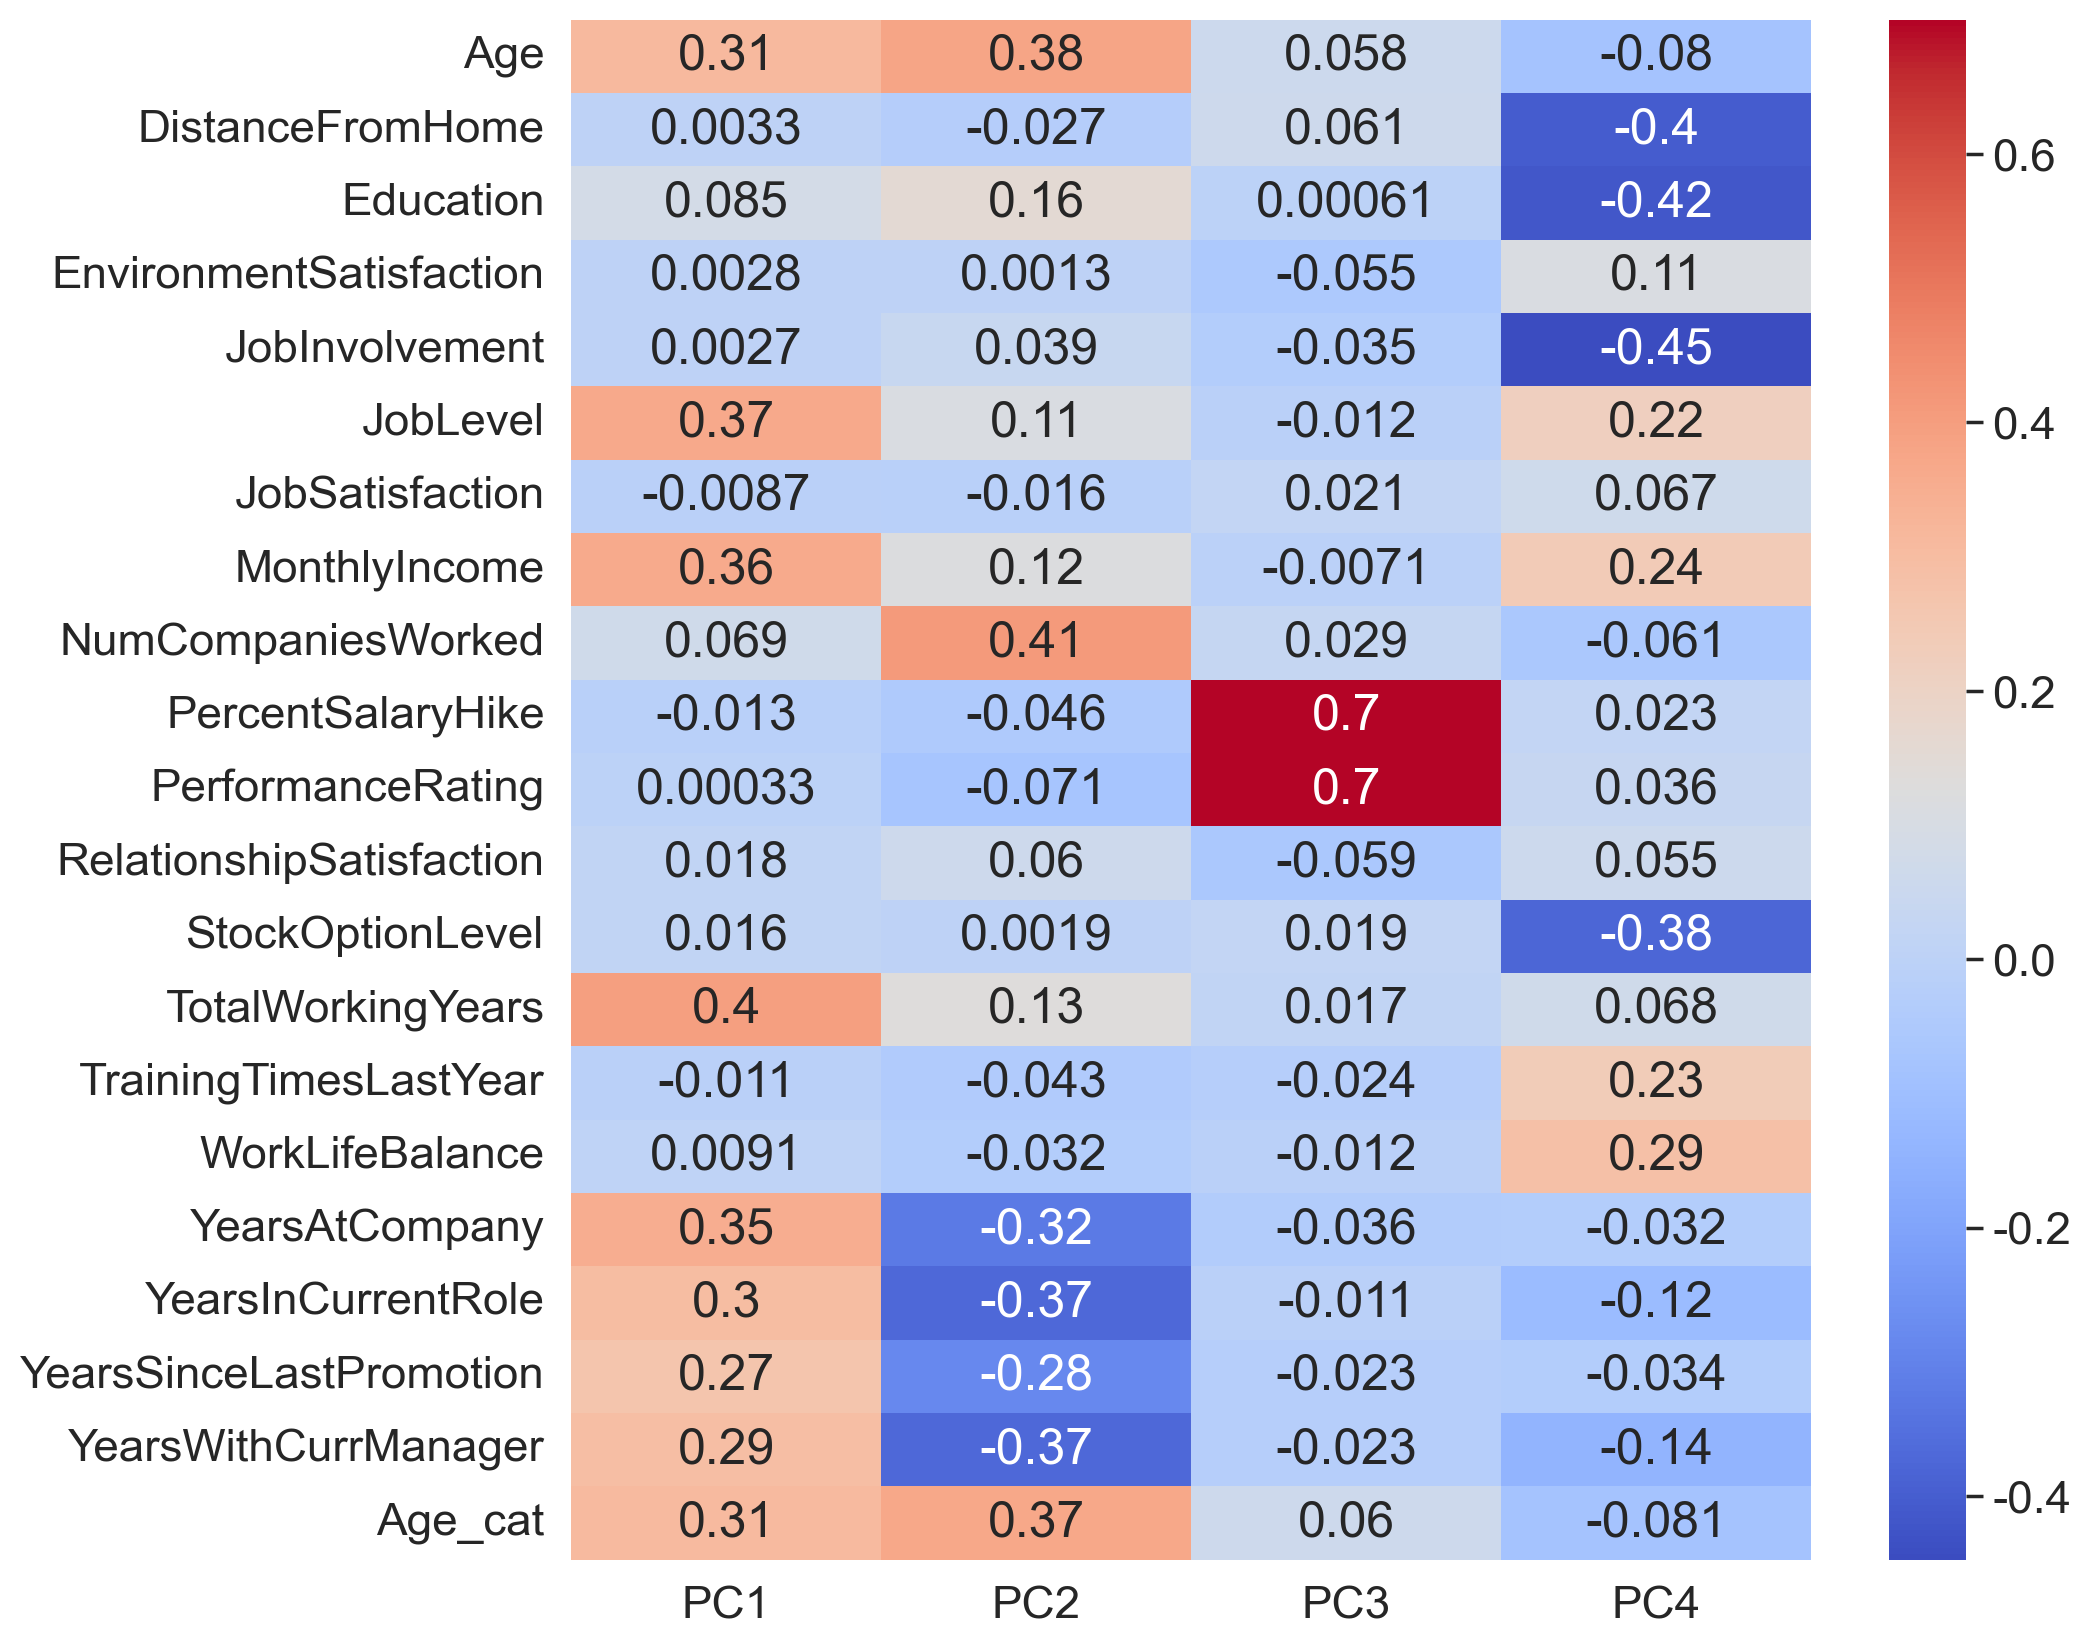

In [631]:
plt.figure(figsize=(10,10))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.show()

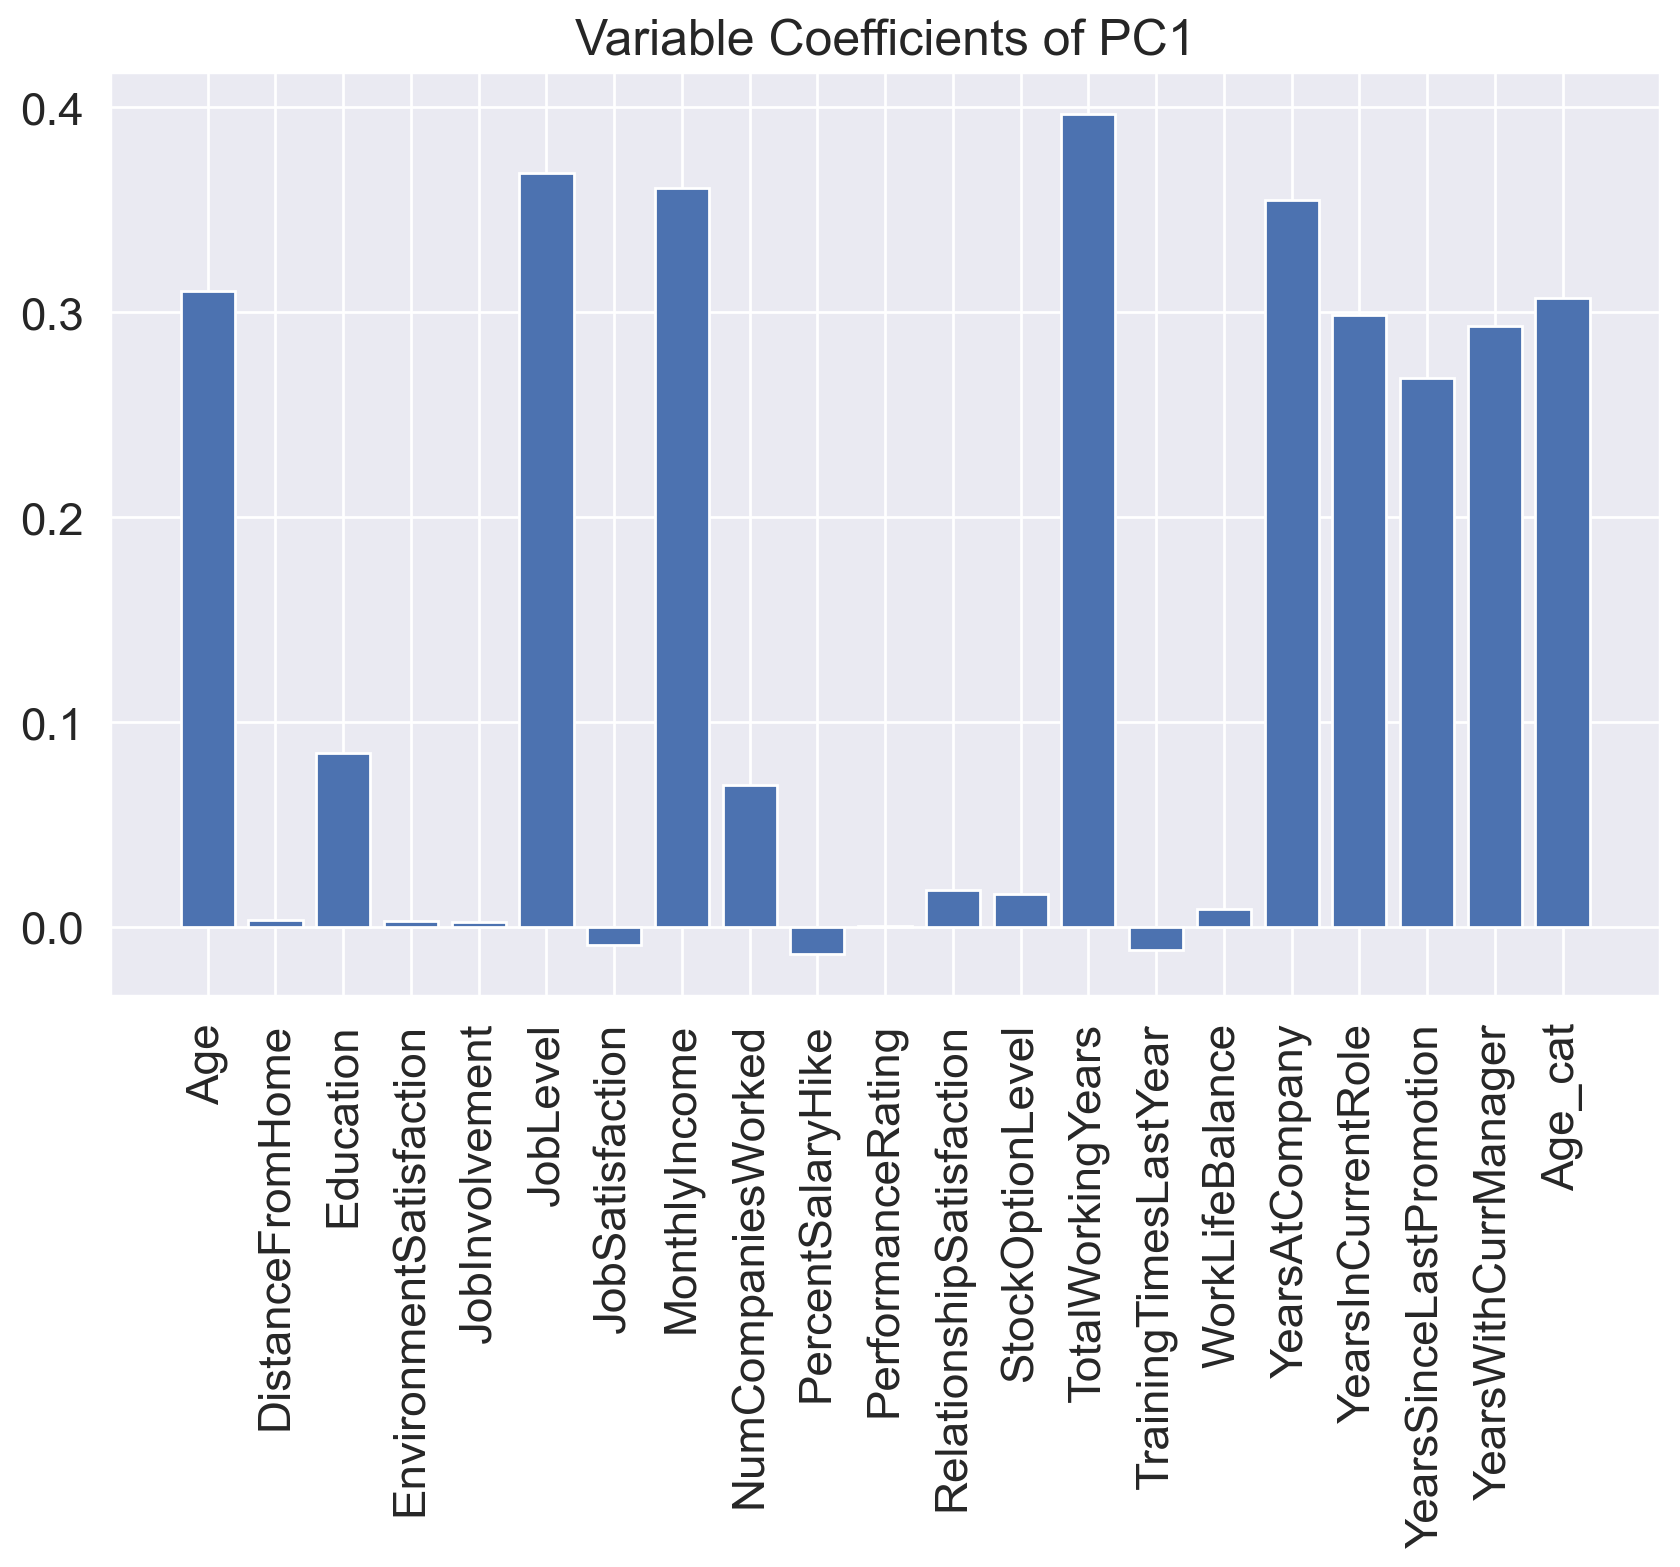

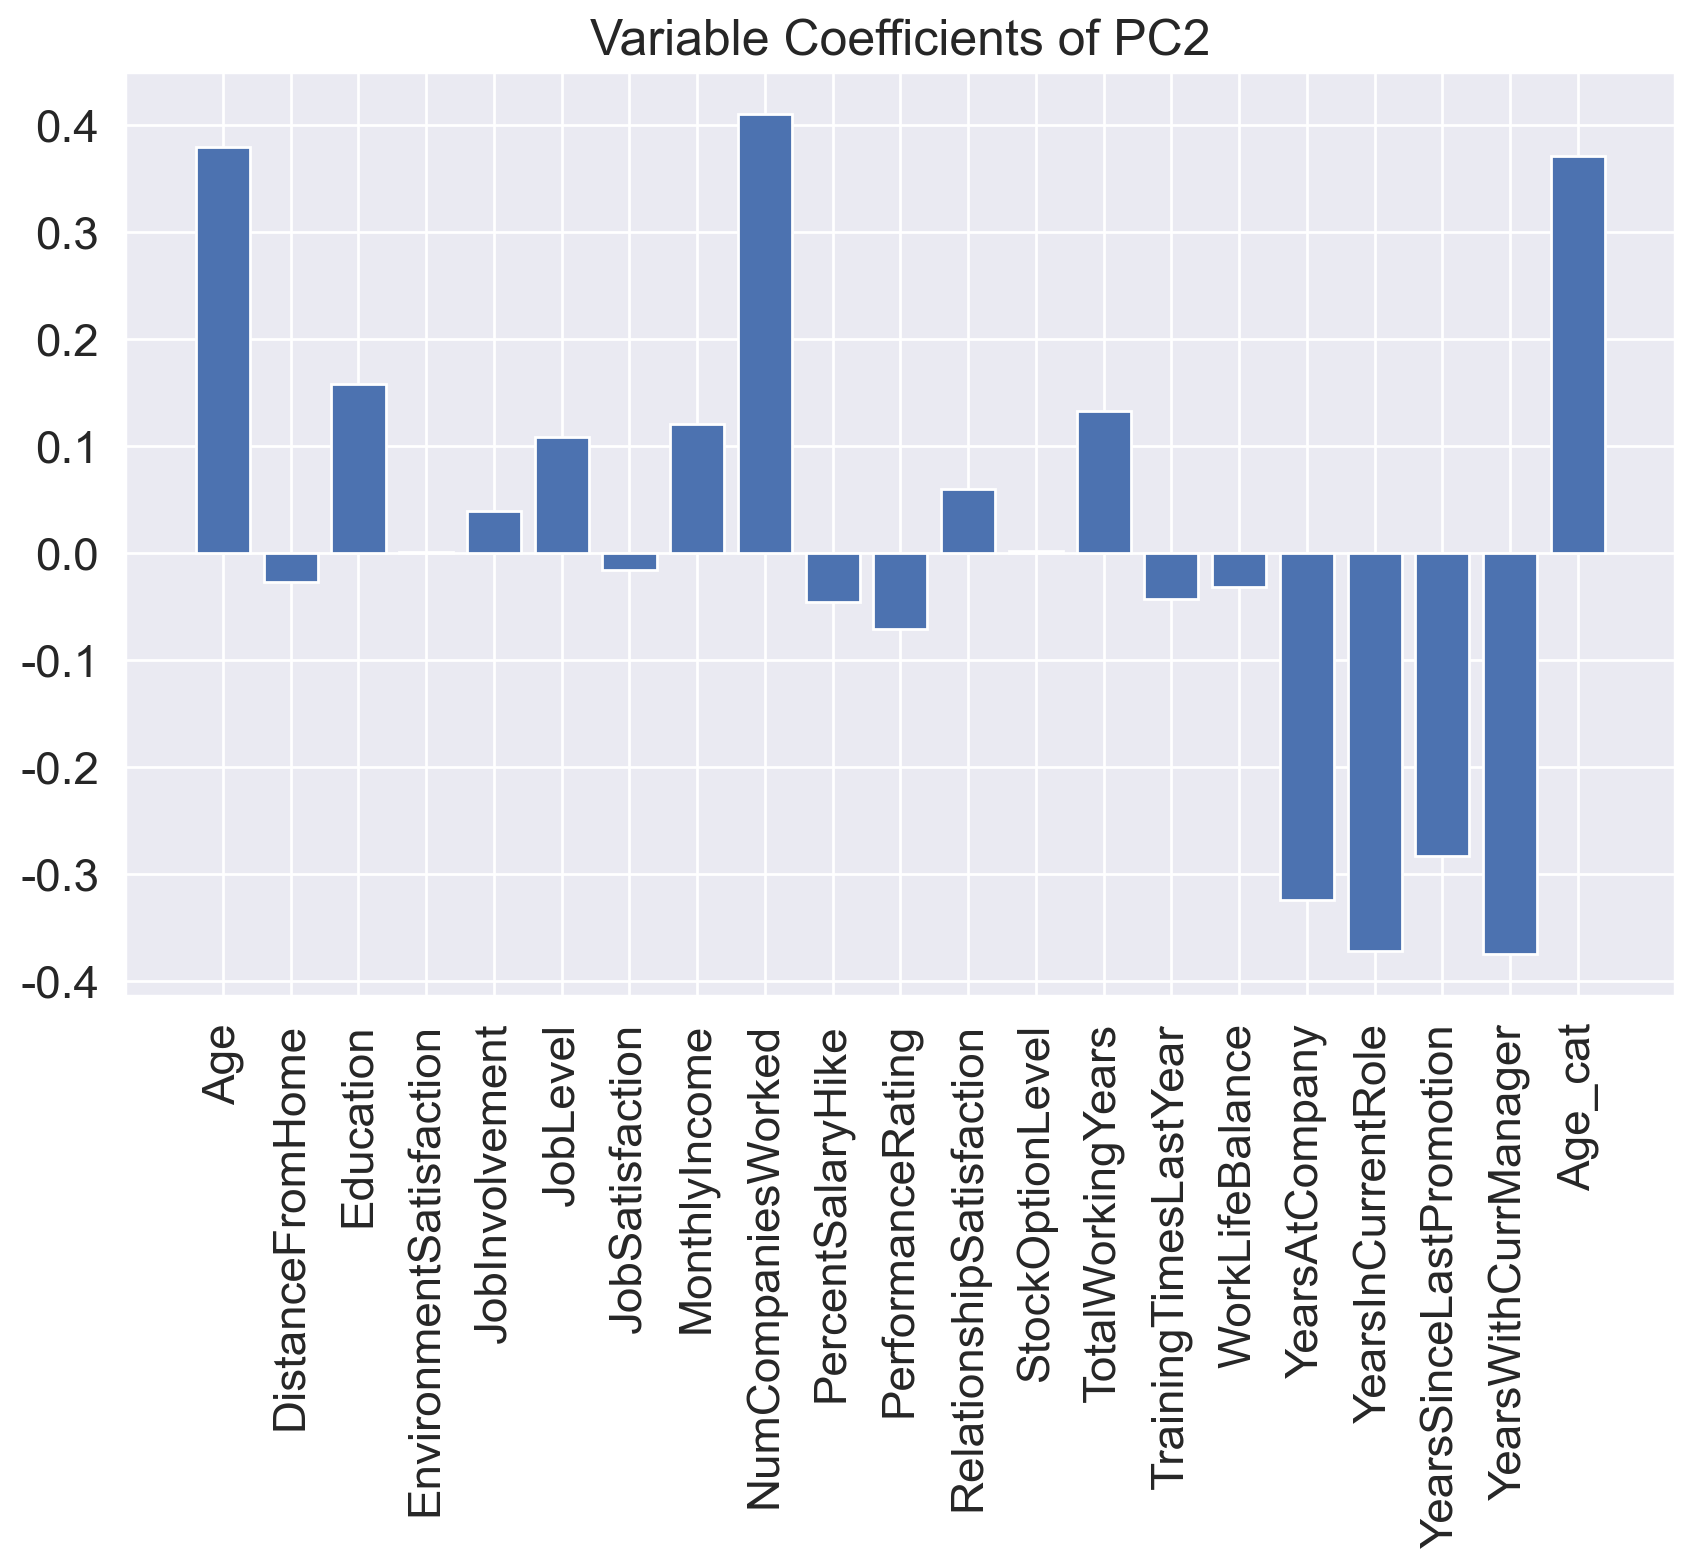

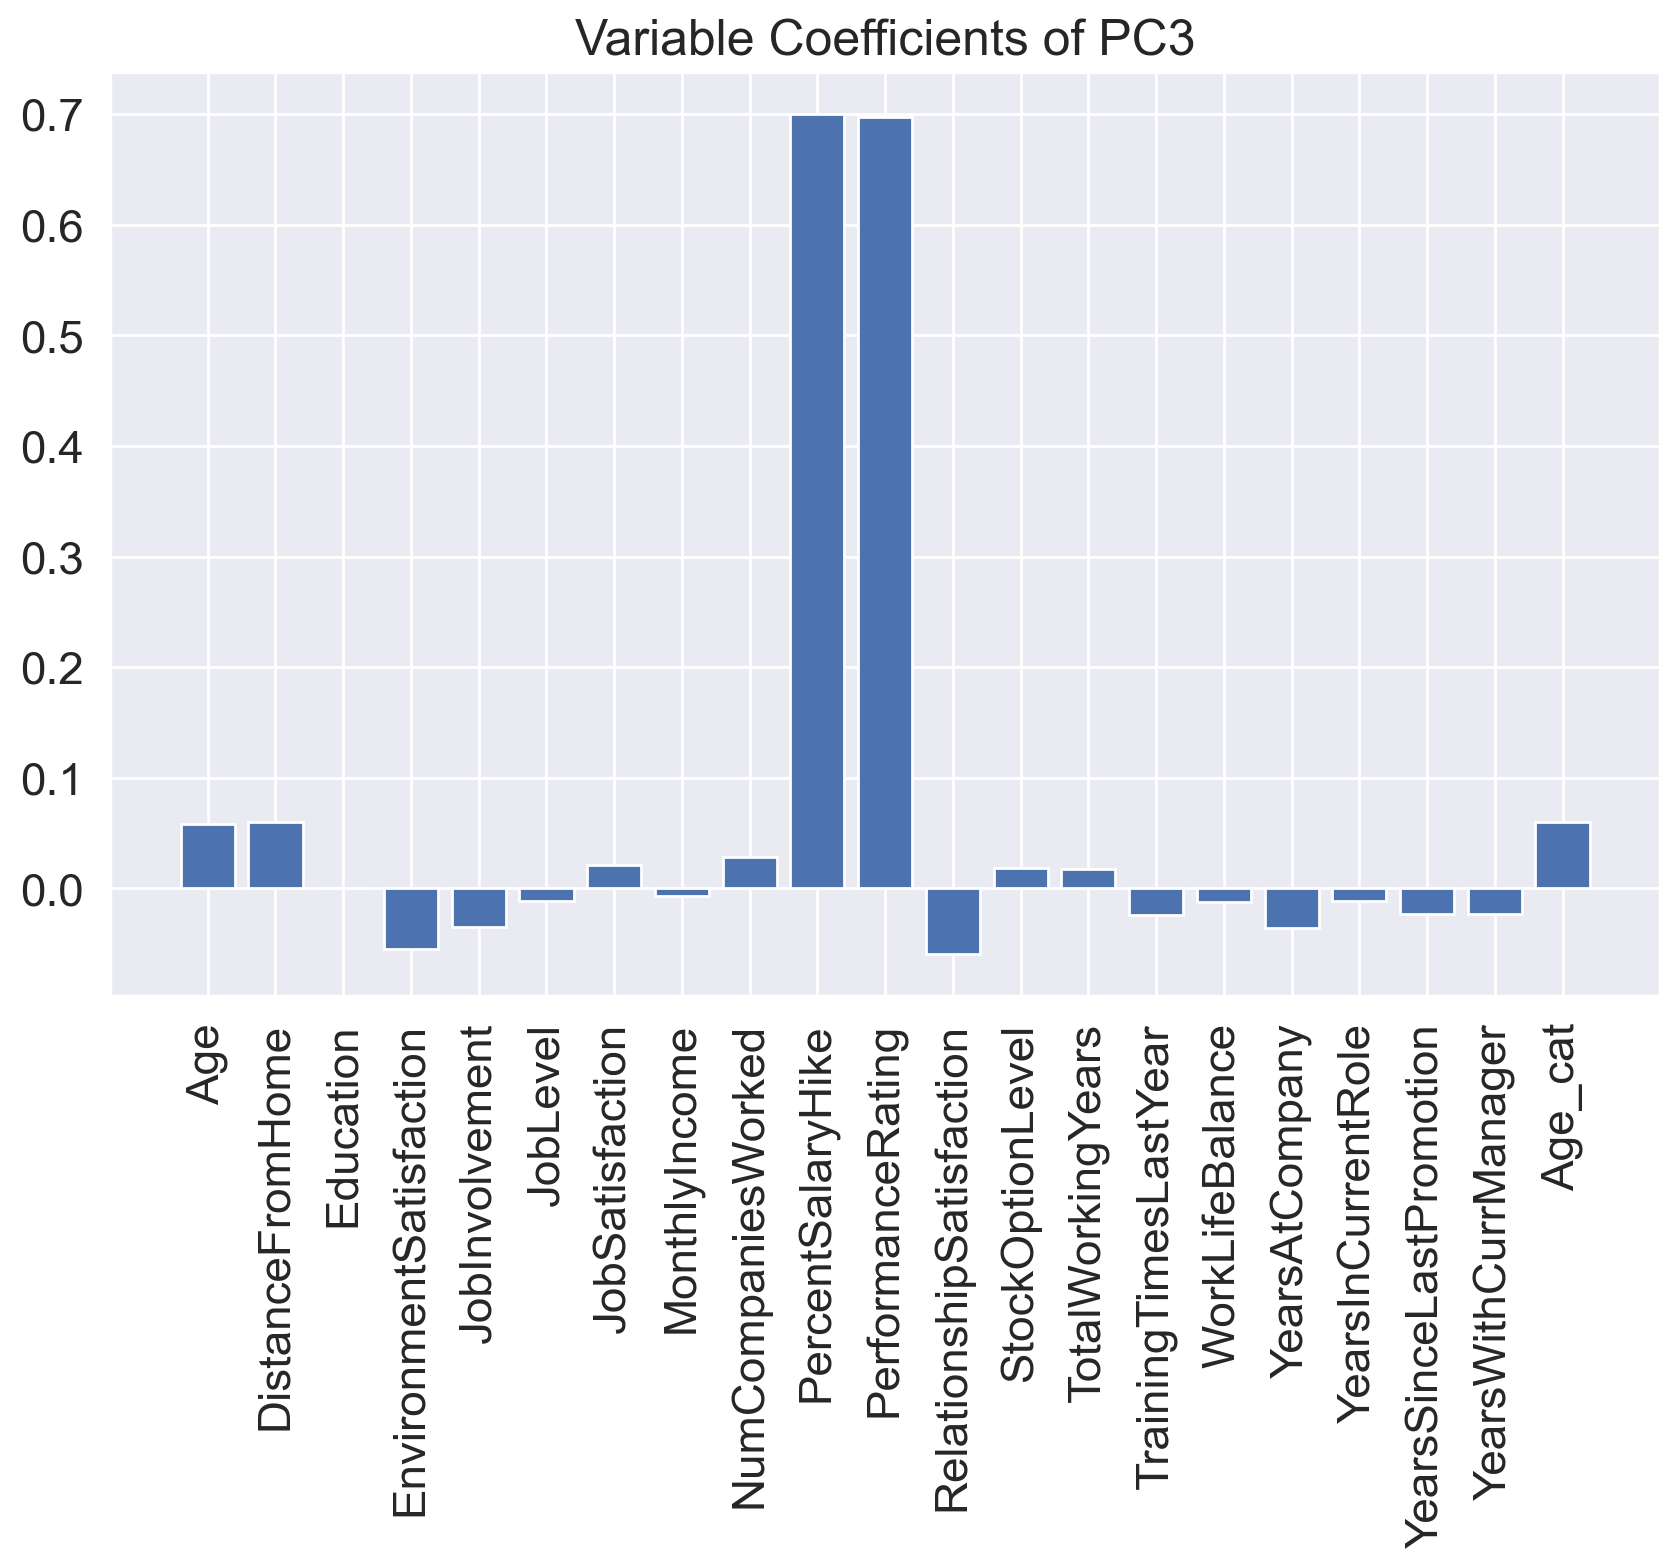

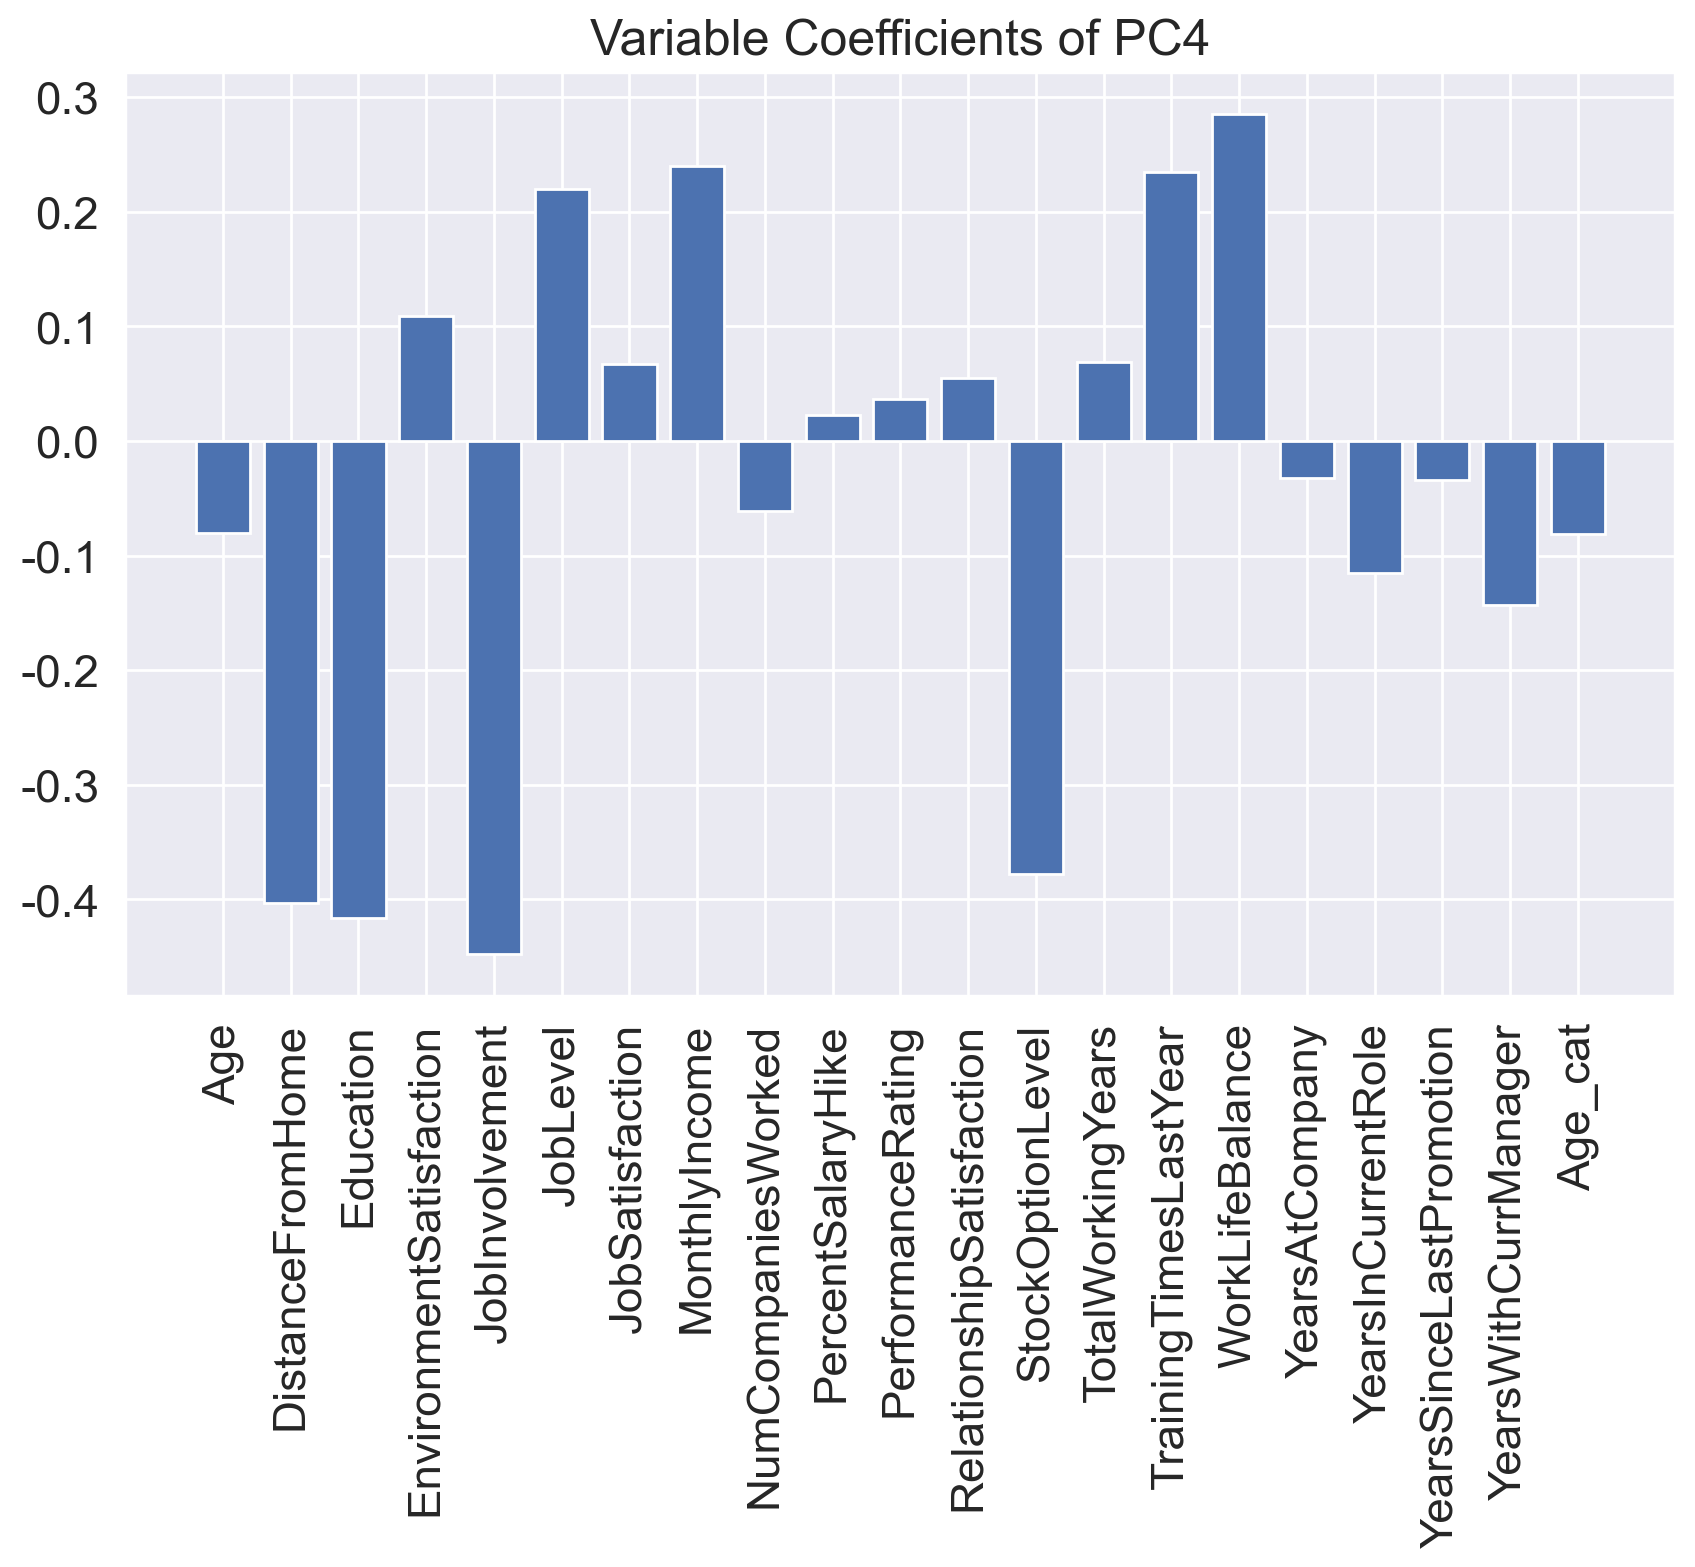

In [630]:
# PC1 변수 계수 시각화
plt.figure(figsize=(10,6))
plt.bar(x=loadings.index, height=loadings['PC1'].values)
plt.xticks(rotation=90)
plt.title('Variable Coefficients of PC1')
plt.show()

# PC2 변수 계수 시각화
plt.figure(figsize=(10,6))
plt.bar(x=loadings.index, height=loadings['PC2'].values)
plt.xticks(rotation=90)
plt.title('Variable Coefficients of PC2')
plt.show()

# PC3 변수 계수 시각화
plt.figure(figsize=(10,6))
plt.bar(x=loadings.index, height=loadings['PC3'].values)
plt.xticks(rotation=90)
plt.title('Variable Coefficients of PC3')
plt.show()

# PC4 변수 계수 시각화
plt.figure(figsize=(10,6))
plt.bar(x=loadings.index, height=loadings['PC4'].values)
plt.xticks(rotation=90)
plt.title('Variable Coefficients of PC4')
plt.show()

#### 수치형 변수 t-test 검정

In [ ]:
df_raw['Attrition'].unique()

In [ ]:

from scipy.stats import f_oneway

# 연속형 변수 리스트
num_cols = df_raw.select_dtypes(include='number').columns.tolist()

# 빈 리스트 생성
results = []

# 각 연속형 변수에 대해 ANOVA 검정 실행
for col in num_cols:
    groups = [df_raw[df_raw['Attrition'] == val][col] for val in df_raw['Attrition'].unique()]
    fval, pval = f_oneway(*groups)
    results.append([col, fval, f'{pval:.4f}'])

# 결과 데이터프레임 생성
result_df = pd.DataFrame(results, columns=['Numerical Variable', 'F-value', 'P-value'])
result_df

In [ ]:
# # 범주형 변수와 Attrition 변수 선택
# categorical_vars = df_raw.select_dtypes(include='object').columns.tolist()
# target_var = 'Attrition'

# # 범주형 변수와 Attrition 변수 간의 상관계수 구하기
# corr_df = pd.DataFrame()
# for col in categorical_vars:
#     corr_df.loc[col, target_var] = df_raw[target_var].corr(df_raw[col], method='spearman')
    
# corr_df

#### Attrition vs. 범주형 변수 카이제곱 검증

- 성별과 over18 컬럼 제외하고는 유의미한 관계가 있어보인다.
- 특히 업무와 관련 높은 JobRole, OverTime, MaritalStatus가 비교적 높은 연관성을 보이므로 좀 더 살펴보면 좋겠다.

In [551]:
# 범주형 변수 리스트
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education']

for col in cat_cols:
    cross_tab = pd.crosstab(df_drop[col], df_raw['Attrition'])
    chi2, pval, dof, expected = chi2_contingency(cross_tab)
    print(f"{col} vs Attrition:")
    print(f"chi2: {chi2}")
    print(f"p-value: {pval:.4f}")

BusinessTravel vs Attrition:
chi2: 24.182413685655174
p-value: 0.0000
Department vs Attrition:
chi2: 10.79600732241067
p-value: 0.0045
EducationField vs Attrition:
chi2: 16.024674119585427
p-value: 0.0068
Gender vs Attrition:
chi2: 1.1169671241970975
p-value: 0.2906
JobRole vs Attrition:
chi2: 86.19025367670434
p-value: 0.0000
MaritalStatus vs Attrition:
chi2: 46.163676540848705
p-value: 0.0000
OverTime vs Attrition:
chi2: 87.56429365828768
p-value: 0.0000
Education vs Attrition:
chi2: 3.0739613982367193
p-value: 0.5455


In [552]:
# 빈 리스트 생성
results = []

for col in cat_cols:
    cross_tab = pd.crosstab(df_drop[col], df_raw['Attrition'])
    chi2, pval, dof, expected = chi2_contingency(cross_tab)
    results.append([col, chi2, f'{pval:.4f}', dof])

# 결과 데이터프레임 생성
result_df = pd.DataFrame(results, columns=['Categorical Variable', 'Chi-square', 'P-value', 'Degrees of Freedom'])

result_df

Categorical Variable  Chi-square P-value  Degrees of Freedom
0       BusinessTravel   24.182414  0.0000                   2
1           Department   10.796007  0.0045                   2
2       EducationField   16.024674  0.0068                   5
3               Gender    1.116967  0.2906                   1
4              JobRole   86.190254  0.0000                   8
5        MaritalStatus   46.163677  0.0000                   2
6             OverTime   87.564294  0.0000                   1
7            Education    3.073961  0.5455                   4

In [ ]:
# 좀 더 뽑아보기
data_corr_filtered = df_raw[['MonthlyIncome', 'TotalWorkingYears', 'Age', 'MaritalStatus', 'StockOptionLevel',
                      'JobLevel']]
correlation = data_corr_filtered.corr()
plt.rcParams["figure.figsize"] = [20,10]
sns.heatmap(correlation,
            xticklabels=data_corr_filtered.columns,
            yticklabels=data_corr_filtered.columns)

# 인구통계학적 정보
* 조은 피처 : `Age`, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance

In [ ]:
def attrition_ratio_all(df, col):
    """
    입력된 데이터프레임에서 col 열의 각 값에 대한 attrition 비율을 계산하여 데이터프레임으로 반환하는 함수
    df: 분석할 데이터프레임
    col: 분석할 열 이름
    """
    attrition_count = df.groupby([col, 'Attrition'])['Attrition'].count()
    total_count = df.groupby(col)['Attrition'].count()
    ratio = (attrition_count/total_count).reset_index(name='Attrition Ratio')
    ratio = ratio.pivot(index=col, columns='Attrition', values='Attrition Ratio')
    ratio.fillna(0, inplace=True)
    ratio.reset_index(drop=False)
    return ratio

In [569]:
def attrition_ratio_yes(data, column):
    """
    입력된 데이터프레임에서 col 열의 각 값에 대한 attrition 'yes' 비율을 계산하여 데이터프레임으로 반환하는 함수
    df: 분석할 데이터프레임
    col: 분석할 열 이름
    """
    grouped = data.groupby([column, 'Attrition'])
    result = pd.DataFrame(grouped.size().unstack())
    result.columns = ['no', 'yes']
    result['ratio'] = result['yes'] / (result['no'] + result['yes'])
    return result

## 수치형데이터 살펴보기

### 나이

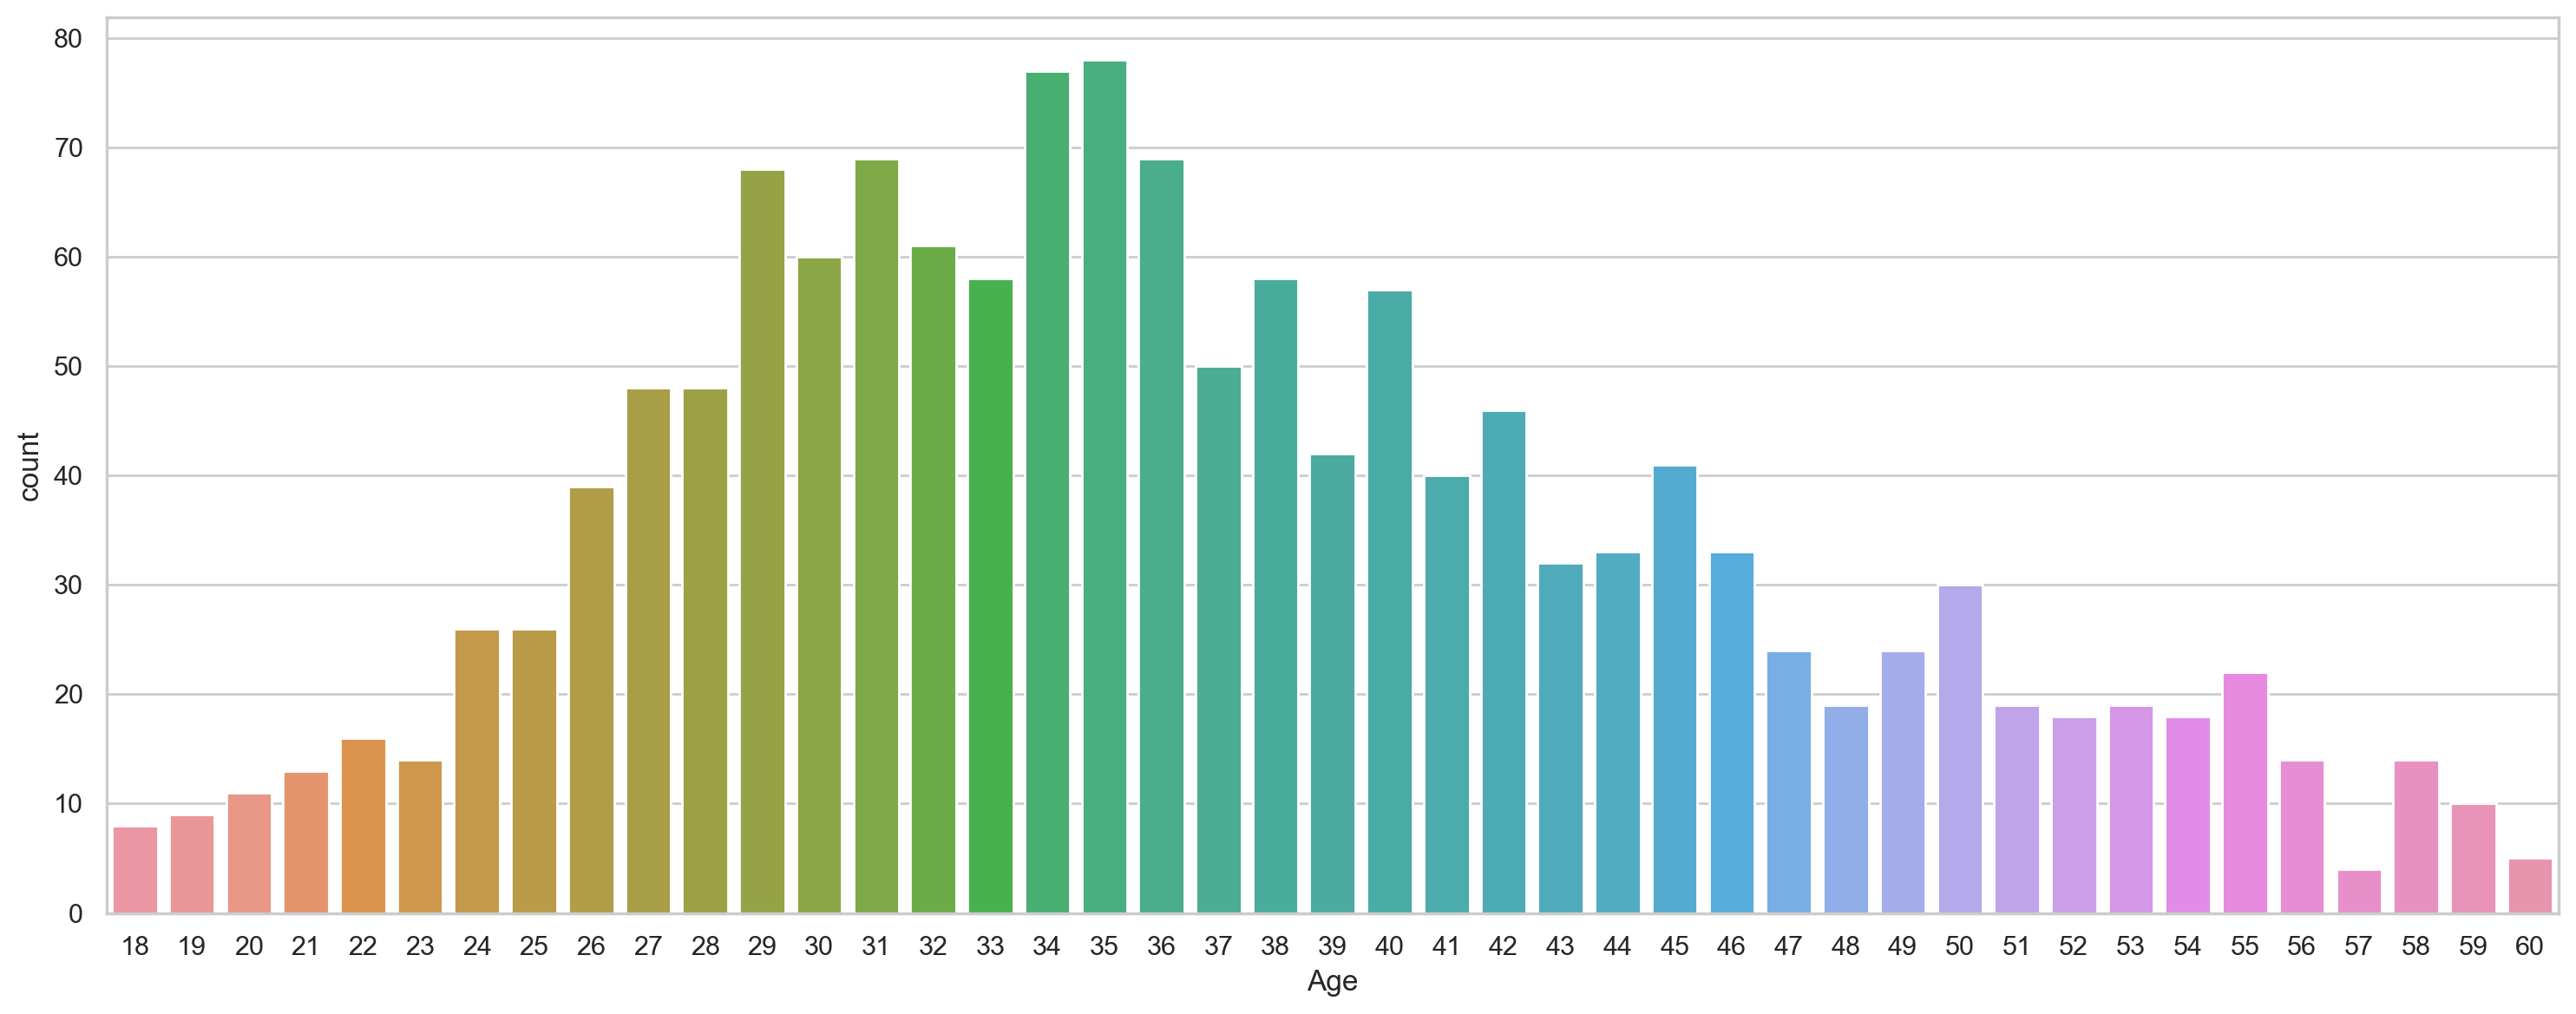

In [553]:
# 나이 분포 확인하기
plt.figure(figsize=(15, 6))
sns.countplot(data = df_drop, x='Age')
plt.tight_layout()
plt.show()

In [ ]:
# 나이 분포 확인해보기
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(df_encoded['Age'], 
         bins=np.arange(0,80,10), 
         alpha=0.8, 
         rwidth=0.9, 
         color='blue'
         )

In [554]:
def age_categorize(age):
    age = (age//10) * 10
    return age

In [555]:
df_drop['Age_cat'] =  df_drop['Age'].apply(age_categorize)
df_drop.head()

Age Attrition     BusinessTravel              Department  \
EmployeeNumber                                                             
1                41       Yes      Travel_Rarely                   Sales   
2                49        No  Travel_Frequently  Research & Development   
4                37       Yes      Travel_Rarely  Research & Development   
5                33        No  Travel_Frequently  Research & Development   
7                27        No      Travel_Rarely  Research & Development   

                DistanceFromHome  Education EducationField  \
EmployeeNumber                                               
1                              1          2  Life Sciences   
2                              8          1  Life Sciences   
4                              2          2          Other   
5                              3          4  Life Sciences   
7                              2          1        Medical   

                EnvironmentSatisfaction  Gender  JobInvolvement  ...  \
EmployeeNumber                                                   ...   
1                                     2  Female               3  ...   
2                                     3    Male               2  ...   
4                                     4    Male               2  ...   
5                                     4  Female               3  ...   
7                                     1    Male               3  ...   

                RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
EmployeeNumber                                                                 
1                                      1                0                  8   
2                                      4                1                 10   
4                                      2                0                  7   
5                                      3                0                  8   
7                                      4                1                  6   

               TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
EmployeeNumber                                                          
1                                  0                1               6   
2                                  3                3              10   
4                                  3                3               0   
5                                  3                3               8   
7                                  3                3               2   

               YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                               
1                               4                        0   
2                               7                        1   
4                               0                        0   
5                               7                        3   
7                               2                        2   

                YearsWithCurrManager  Age_cat  
EmployeeNumber                                 
1                                  5       40  
2                                  7       40  
4                                  0       30  
5                                  0       30  
7                                  2       20  

[5 rows x 29 columns]

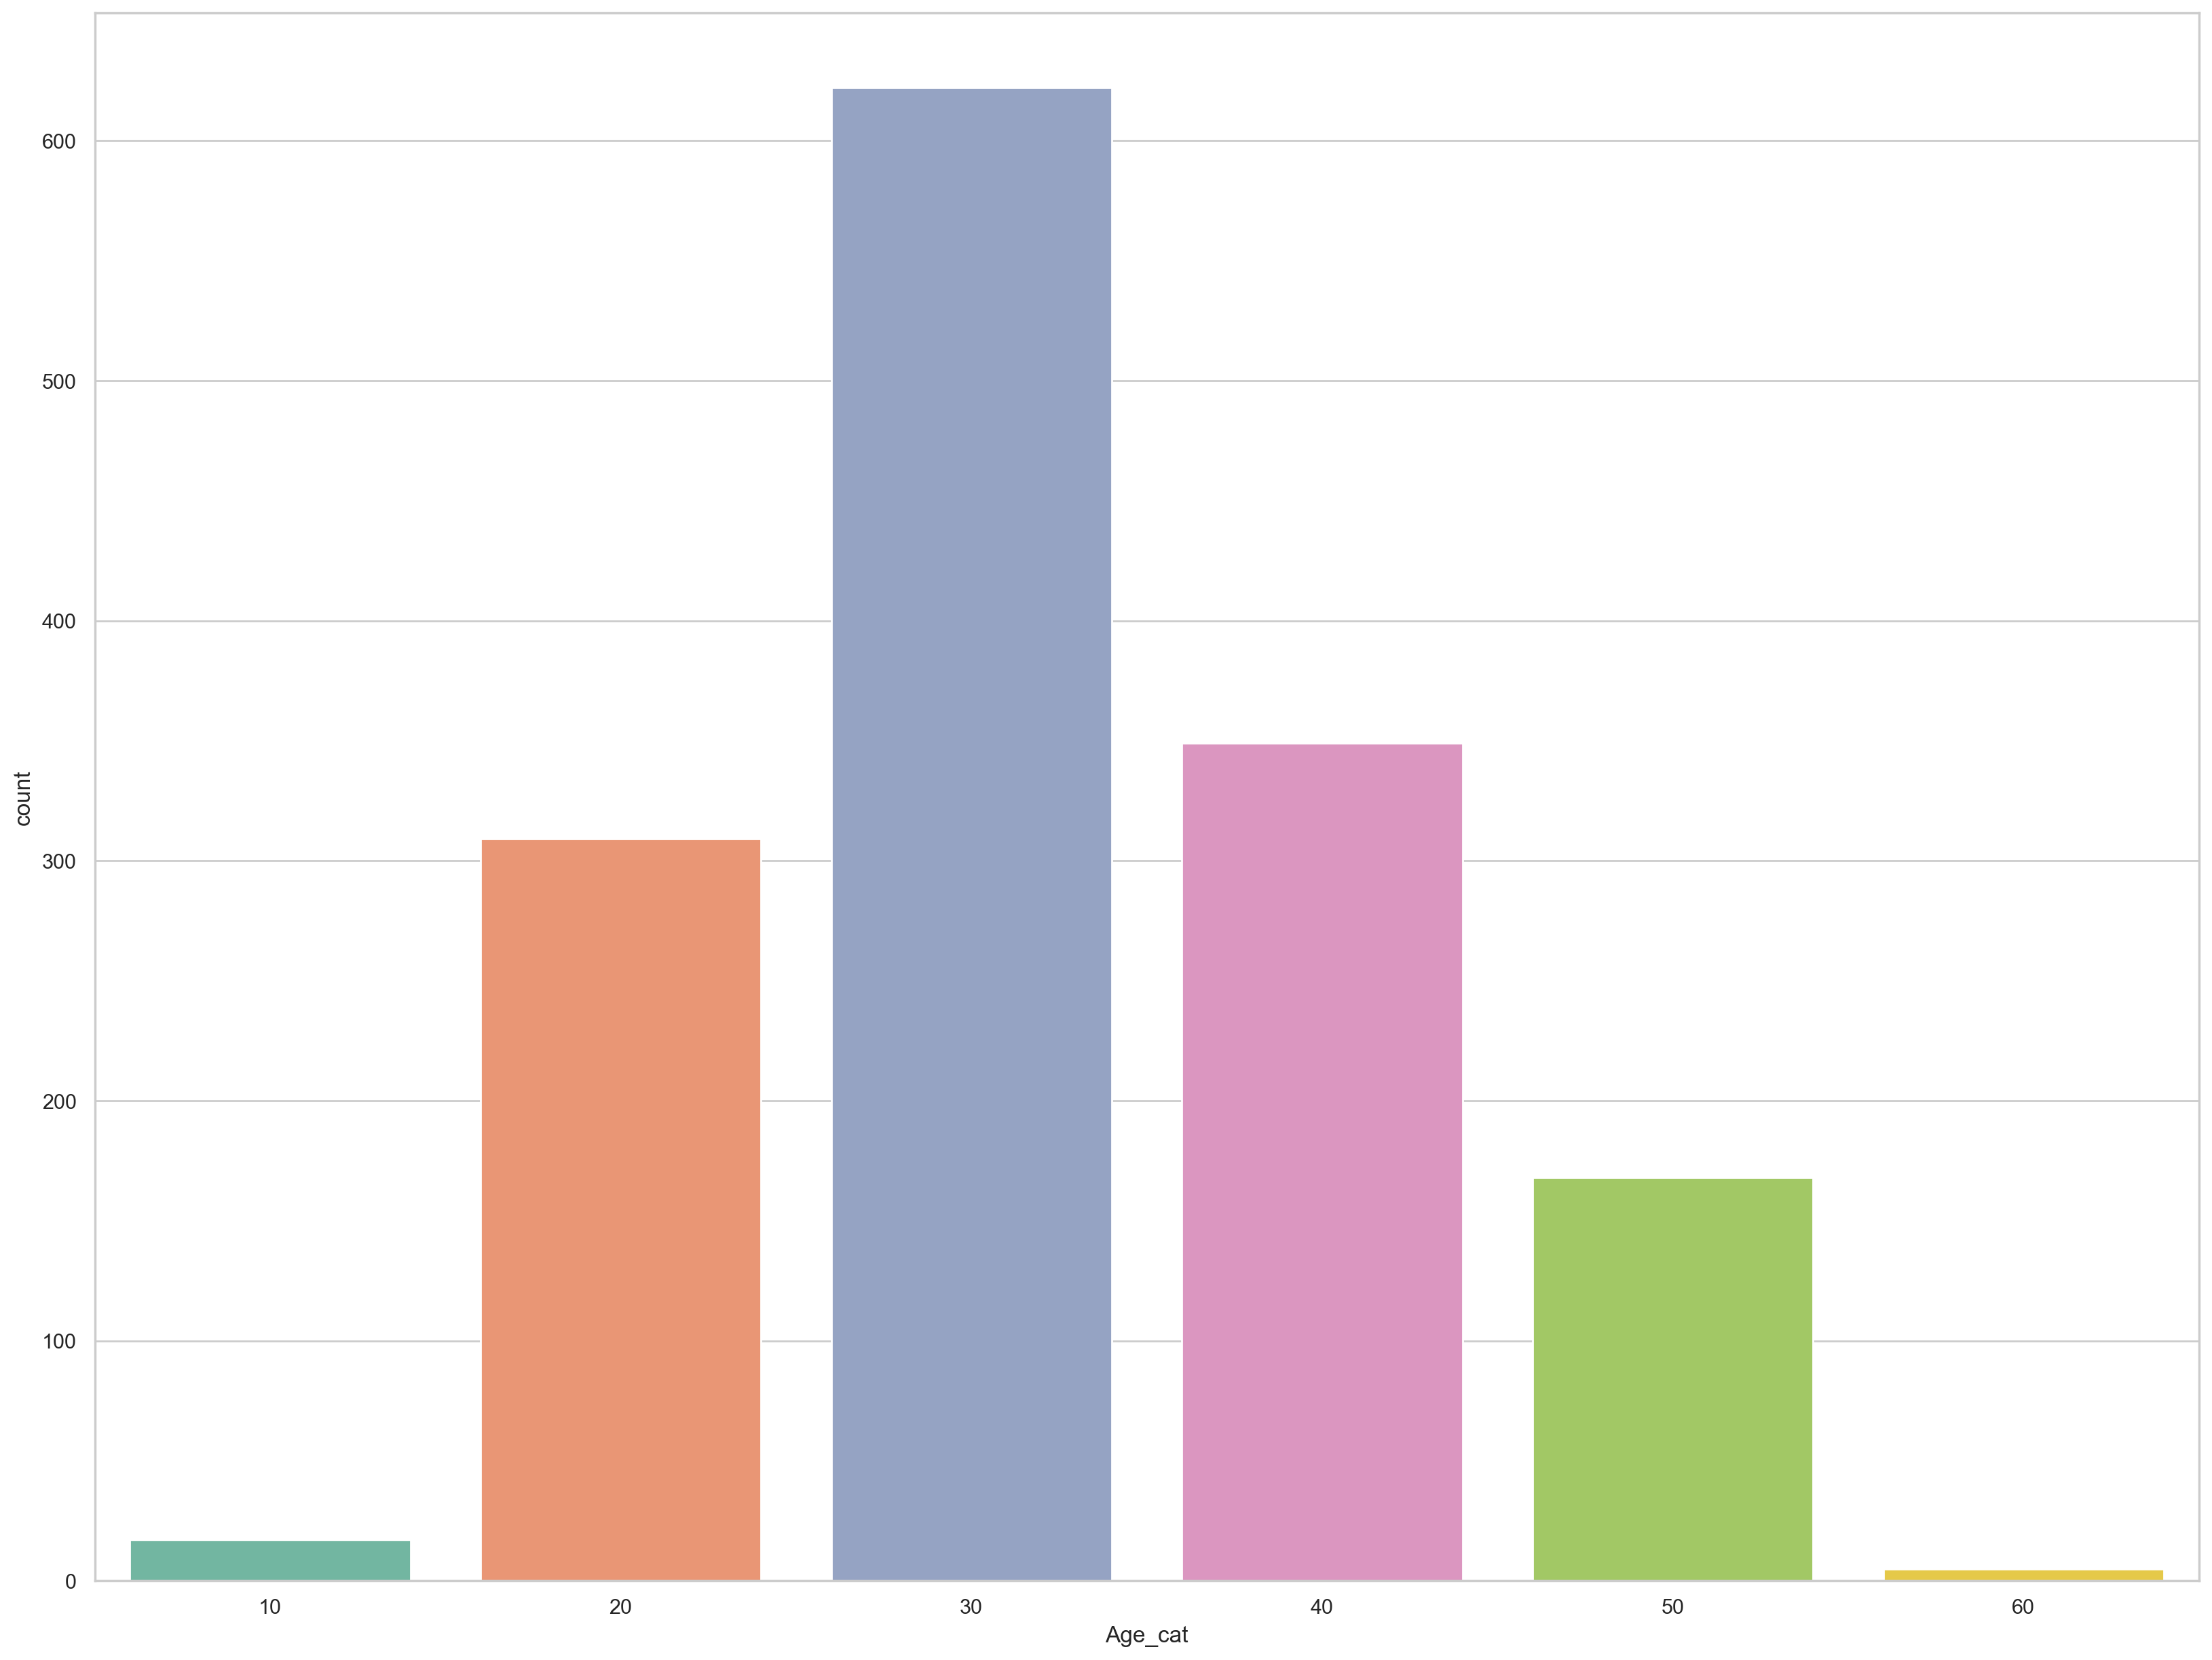

In [556]:
sns.countplot(data=df_drop, x='Age_cat', palette='Set2')
plt.show()

* 3-40대 범위의 직원이 많다.
* 약 45%가 여기에 속함

In [ ]:
# 퇴사 가능성이 높은 연령대를 확인해보자. 퇴사할 가능성이 높은 직원만 뽑아보기
positive_attrition_df = df_encoded.loc[df_encoded['Attrition'] == 1]
negative_attrition_df = df_encoded.loc[df_encoded['Attrition'] == 0]

In [ ]:
plt.hist(positive_attrition_df['Age'], 
         bins=np.arange(0,80,10), 
         alpha=0.8, 
         rwidth=0.9, 
         color='red'
         )

* 3-40대 직원이 퇴사율이 가장 높고
* 2-30대가 2번째로 위험하다 !

#### 2-30대에 왜 퇴사율이 높을까?

In [561]:
df_2030 = df_drop[(df_drop['Age_cat'] == 20)|(df_drop['Age_cat'] == 30)]
df_2030.head(2)

Age Attrition     BusinessTravel              Department  \
EmployeeNumber                                                             
4                37       Yes      Travel_Rarely  Research & Development   
5                33        No  Travel_Frequently  Research & Development   

                DistanceFromHome  Education EducationField  \
EmployeeNumber                                               
4                              2          2          Other   
5                              3          4  Life Sciences   

                EnvironmentSatisfaction  Gender  JobInvolvement  ...  \
EmployeeNumber                                                   ...   
4                                     4    Male               2  ...   
5                                     4  Female               3  ...   

                RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
EmployeeNumber                                                                 
4                                      2                0                  7   
5                                      3                0                  8   

               TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
EmployeeNumber                                                          
4                                  3                3               0   
5                                  3                3               8   

               YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                               
4                               0                        0   
5                               7                        3   

                YearsWithCurrManager  Age_cat  
EmployeeNumber                                 
4                                  0       30  
5                                  0       30  

[2 rows x 29 columns]

* 수치 : TotalWorkingYears, YearsAtCompany, JobLevel, MonthlyIncome, YearsInCurrentRole, YearsWithCurrManager
* 범주 : OverTime, MaritalStatus

In [566]:
df_drop.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_cat'],
      dtype='object')

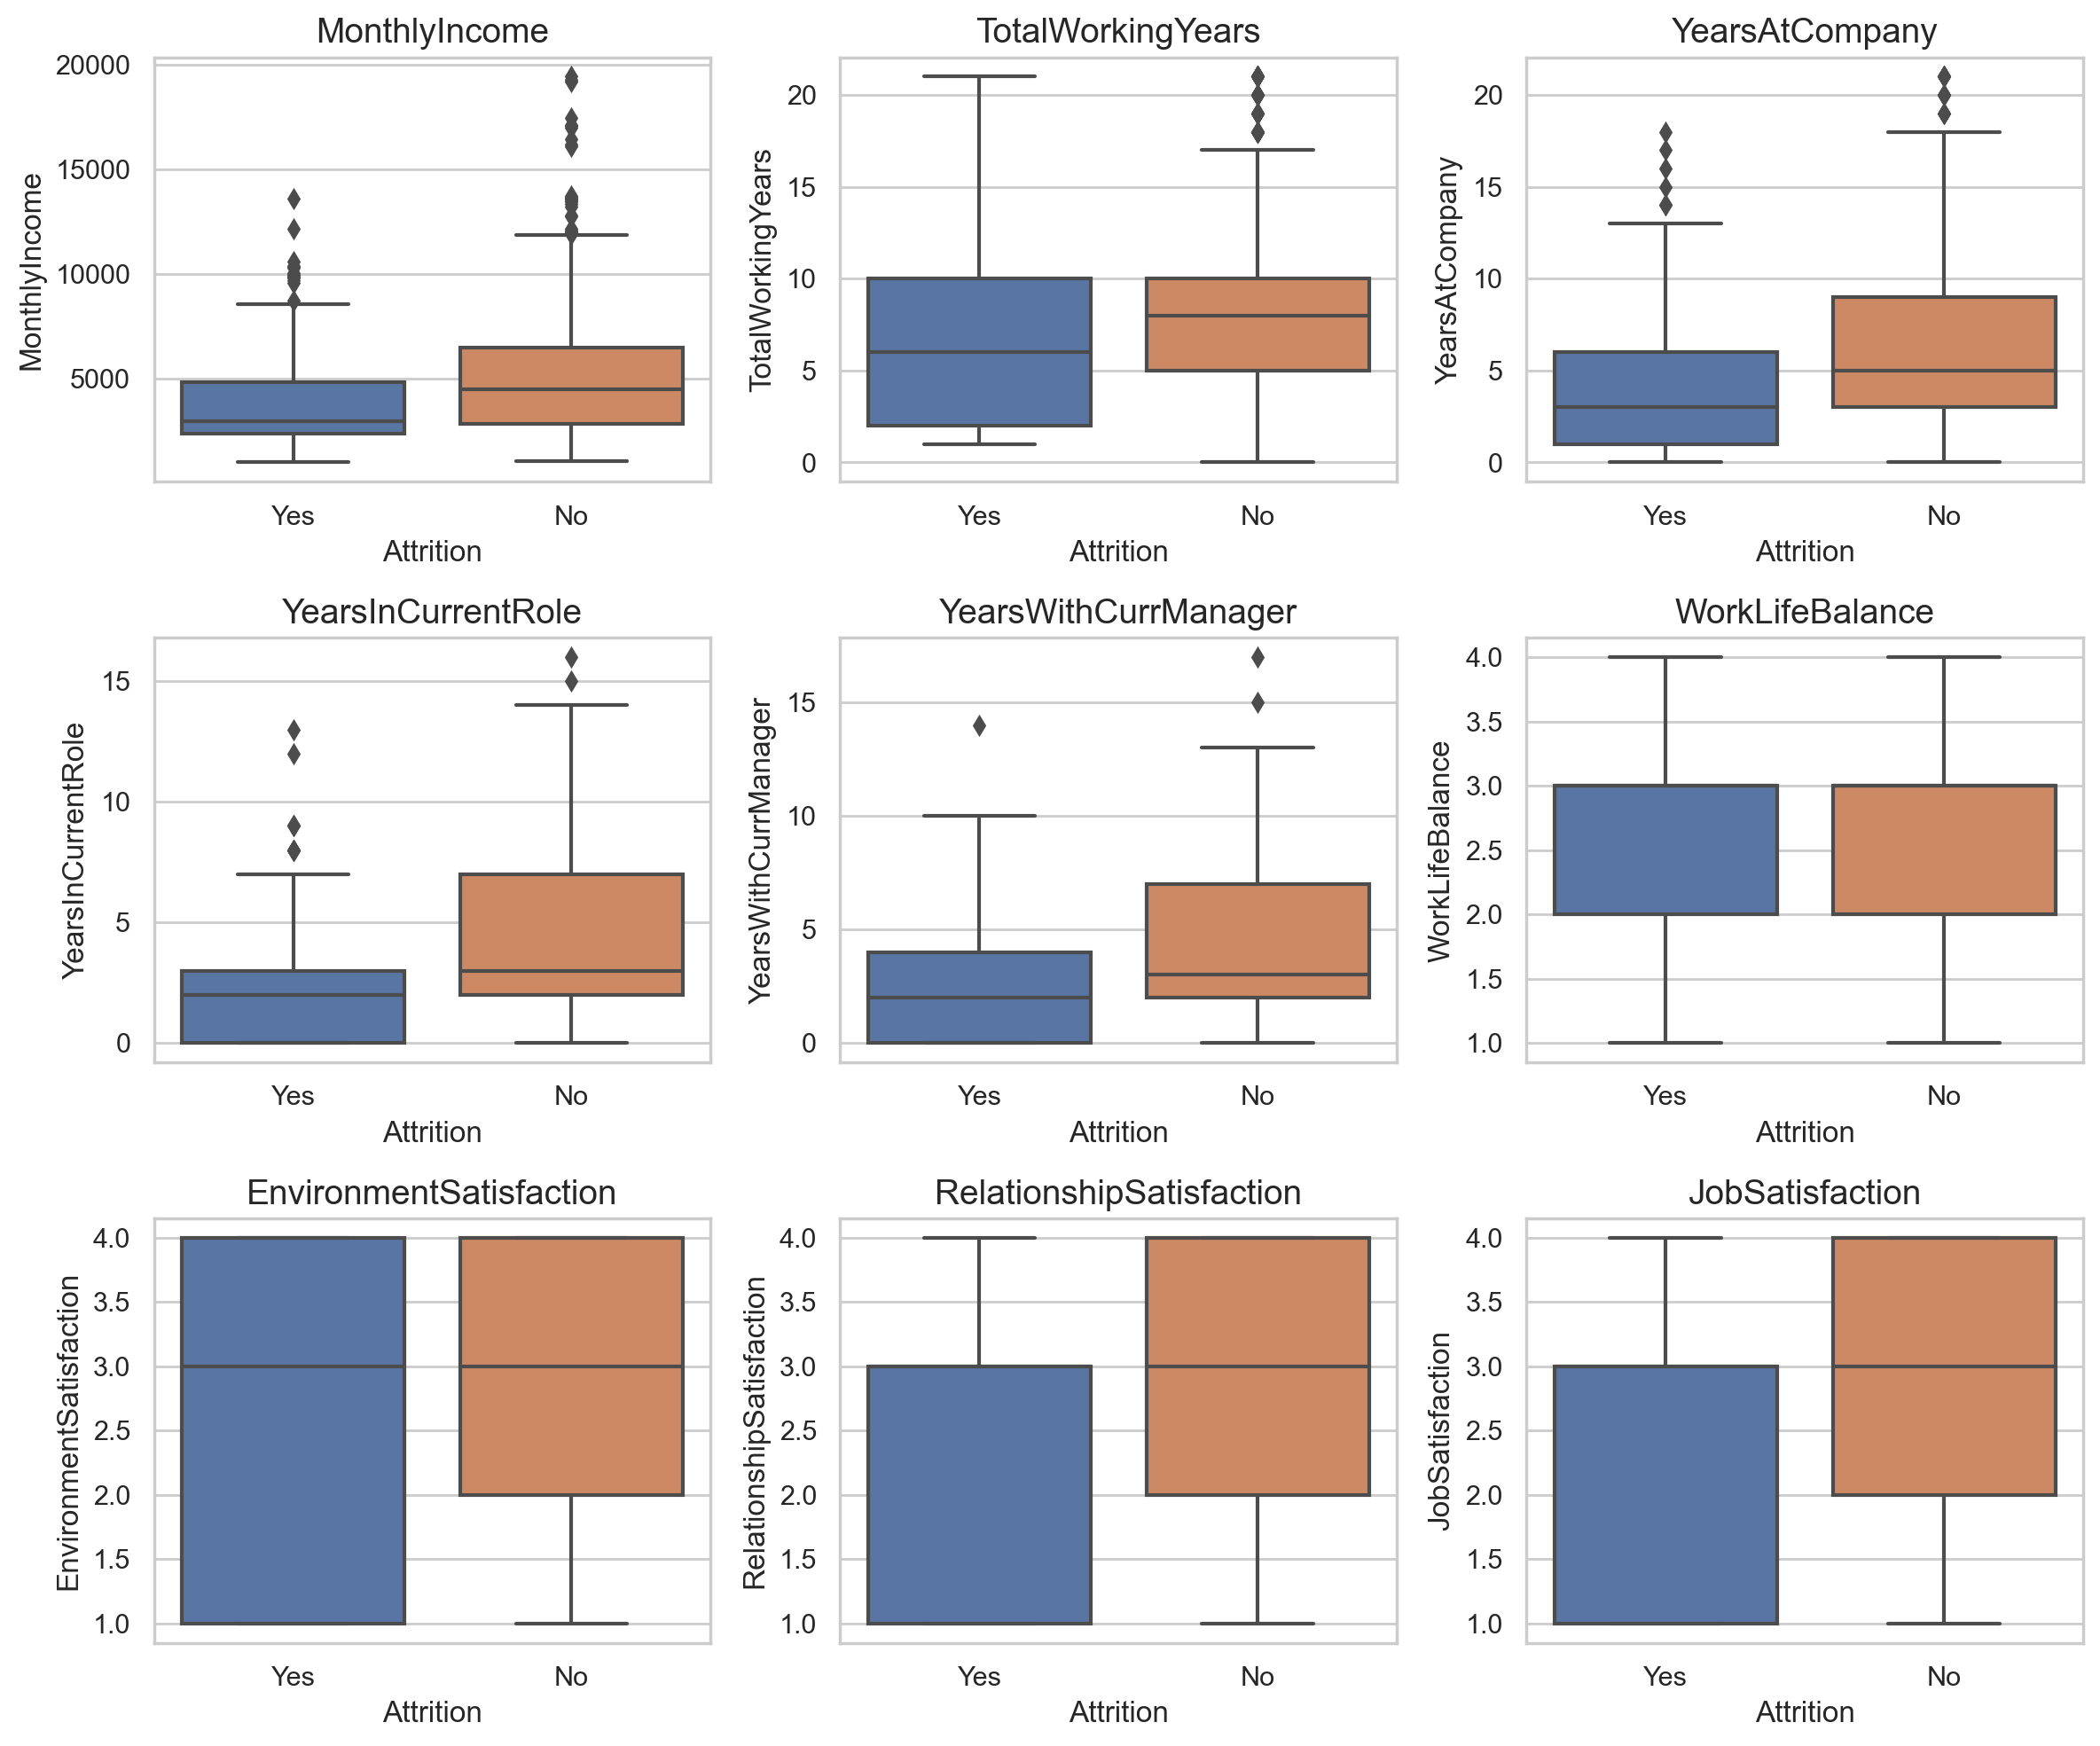

In [684]:
# 수치형 변수들 - attrtion 관계 살펴보기
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

cols = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 
        'YearsInCurrentRole', 'YearsWithCurrManager','WorkLifeBalance',
        'EnvironmentSatisfaction','RelationshipSatisfaction','JobSatisfaction']

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(x='Attrition', y=col, data=df_2030, ax=ax)
    ax.set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

* 상사와의 관계가 영향을 미치나?? 
* 이상치 값도 확인해보자

Text(0.5, 1.0, 'RelationshipSatisfaction - for a long time withCurrManager')

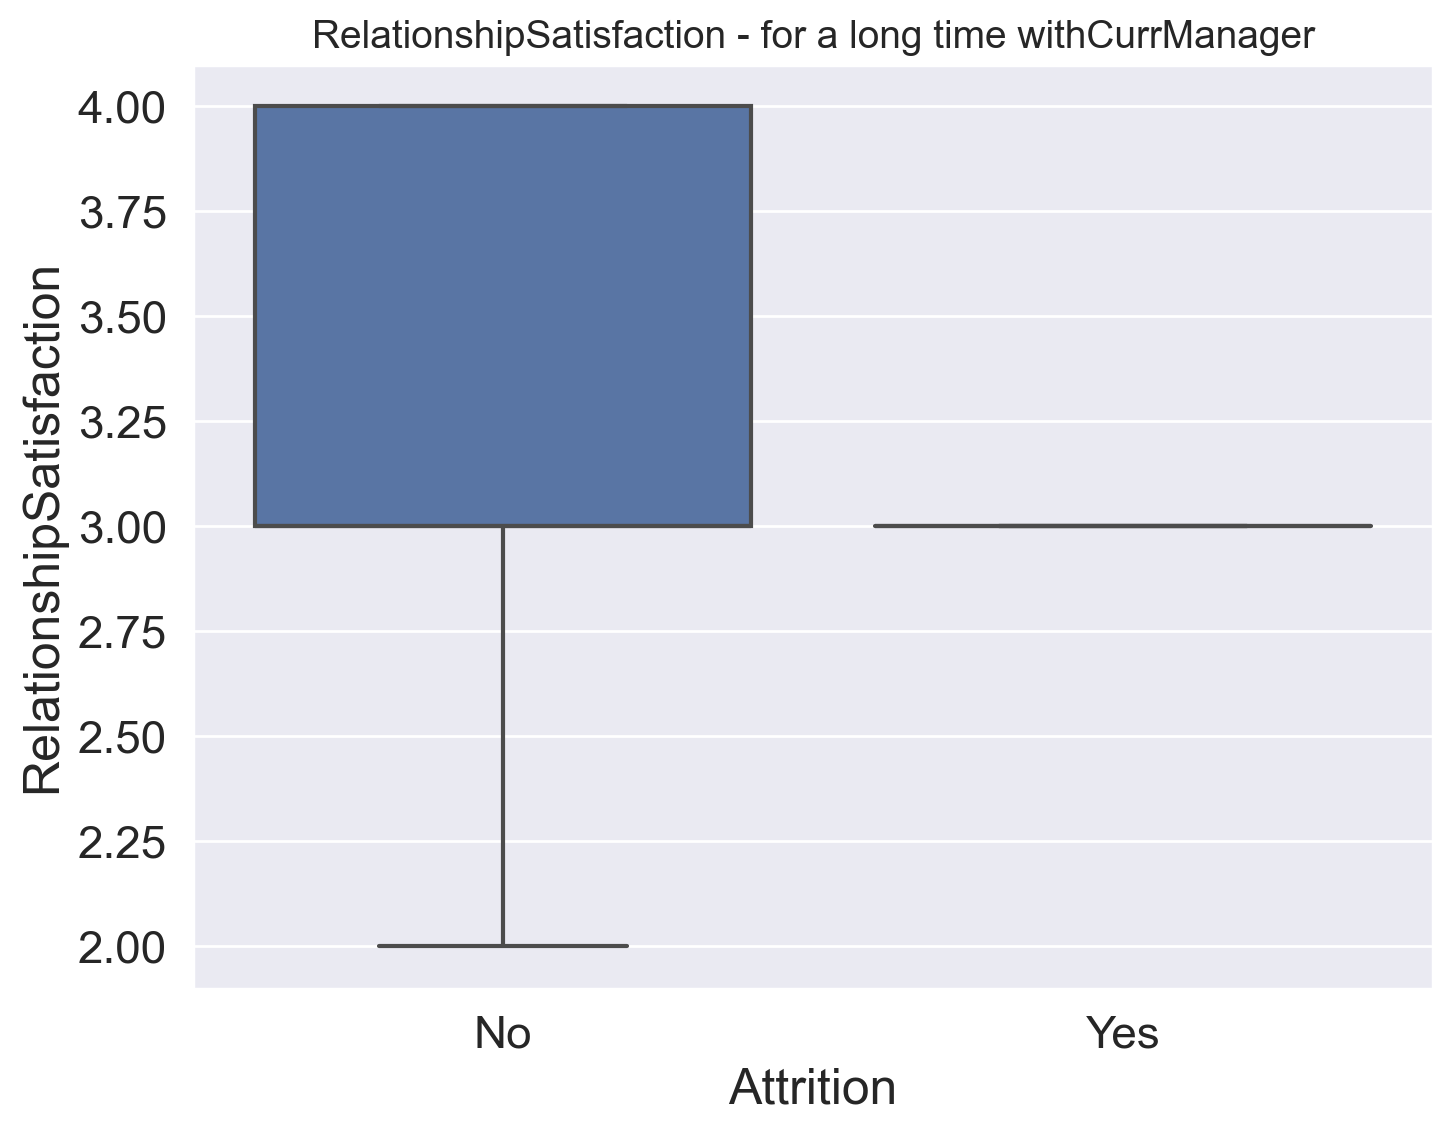

In [652]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition', y='RelationshipSatisfaction', data=df_2030[df_2030['YearsWithCurrManager'] > 12])
plt.title('RelationshipSatisfaction - for a long time withCurrManager', fontsize=14)


* 매니저와 오래 일한 2-30대의 경우는 관계만족도가 좋았다.
* 그러면, 매니저와 오래 일한 2-30대의 만족도, worklifebalance를 보자
    * 환경만족도와 워라밸이 낮았다 >> 근무환경에서 불만을 느꼈을 확률이 크다 !
    * 2-30대 데이터에서 워라밸은 퇴직자, 재직자가 동일했음

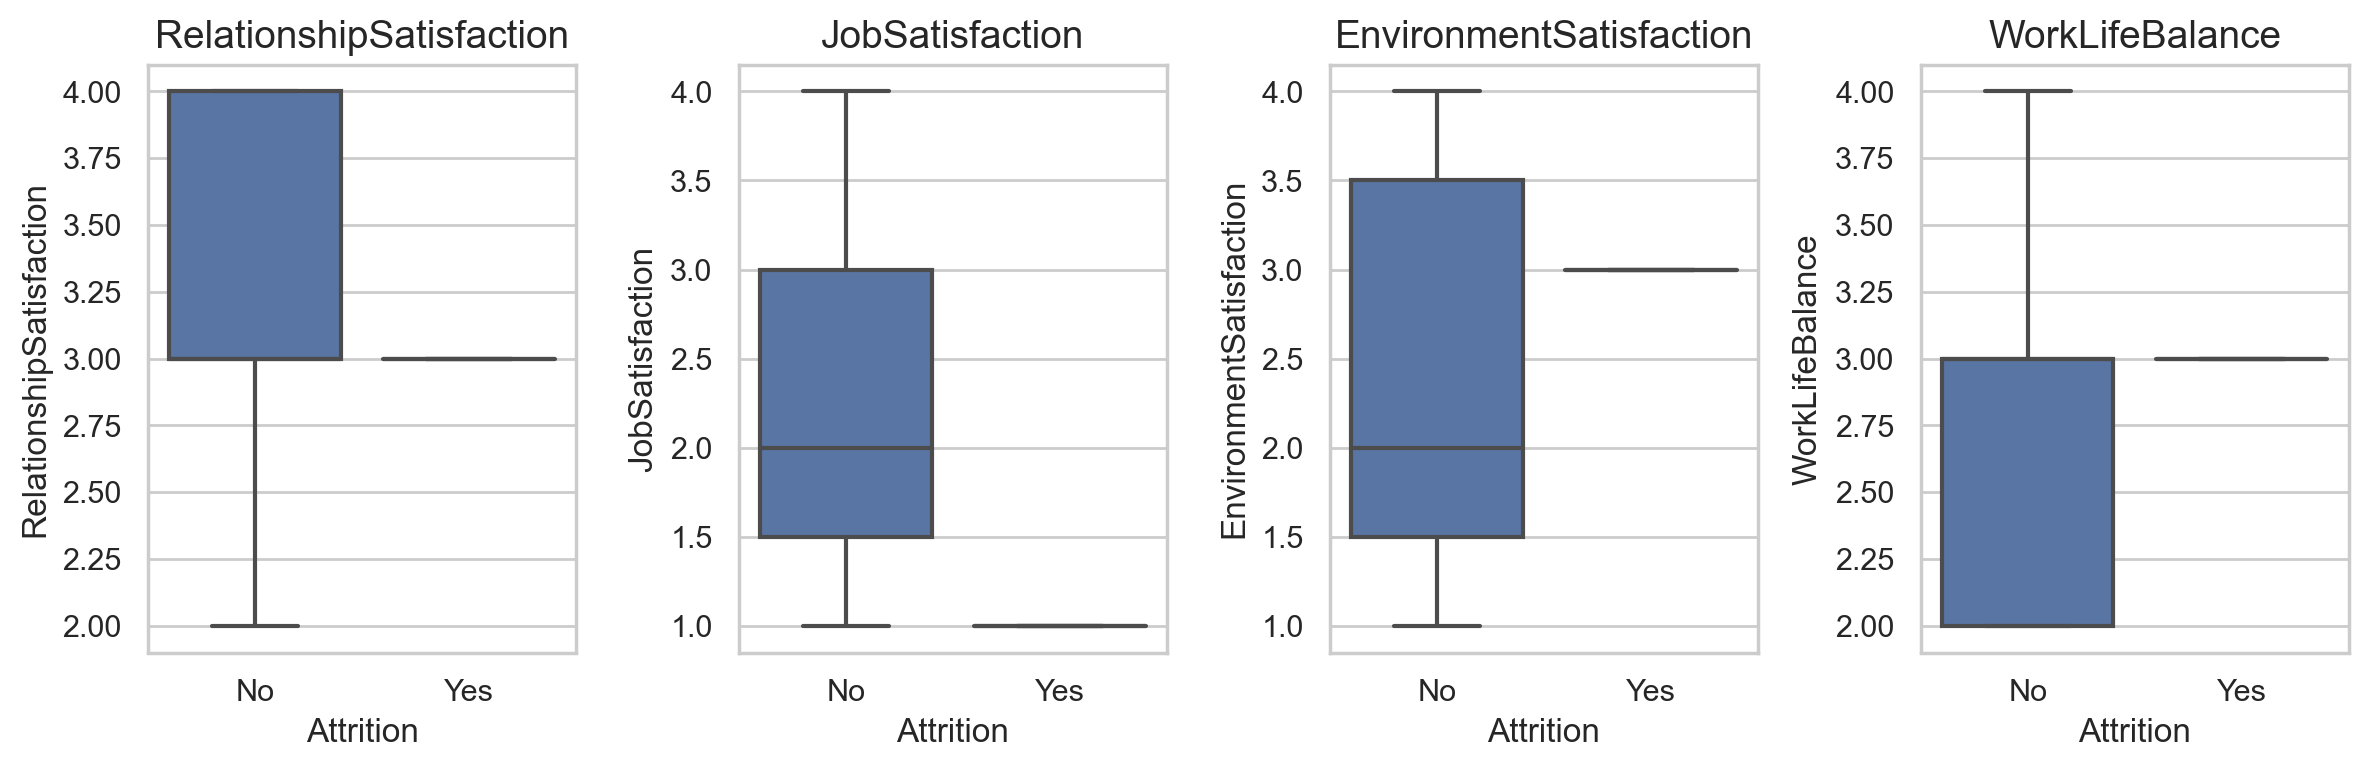

In [661]:
cols = ['RelationshipSatisfaction', 'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(x='Attrition', y=col, data=df_2030[df_2030['YearsWithCurrManager'] > 12], ax=ax)
    ax.set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

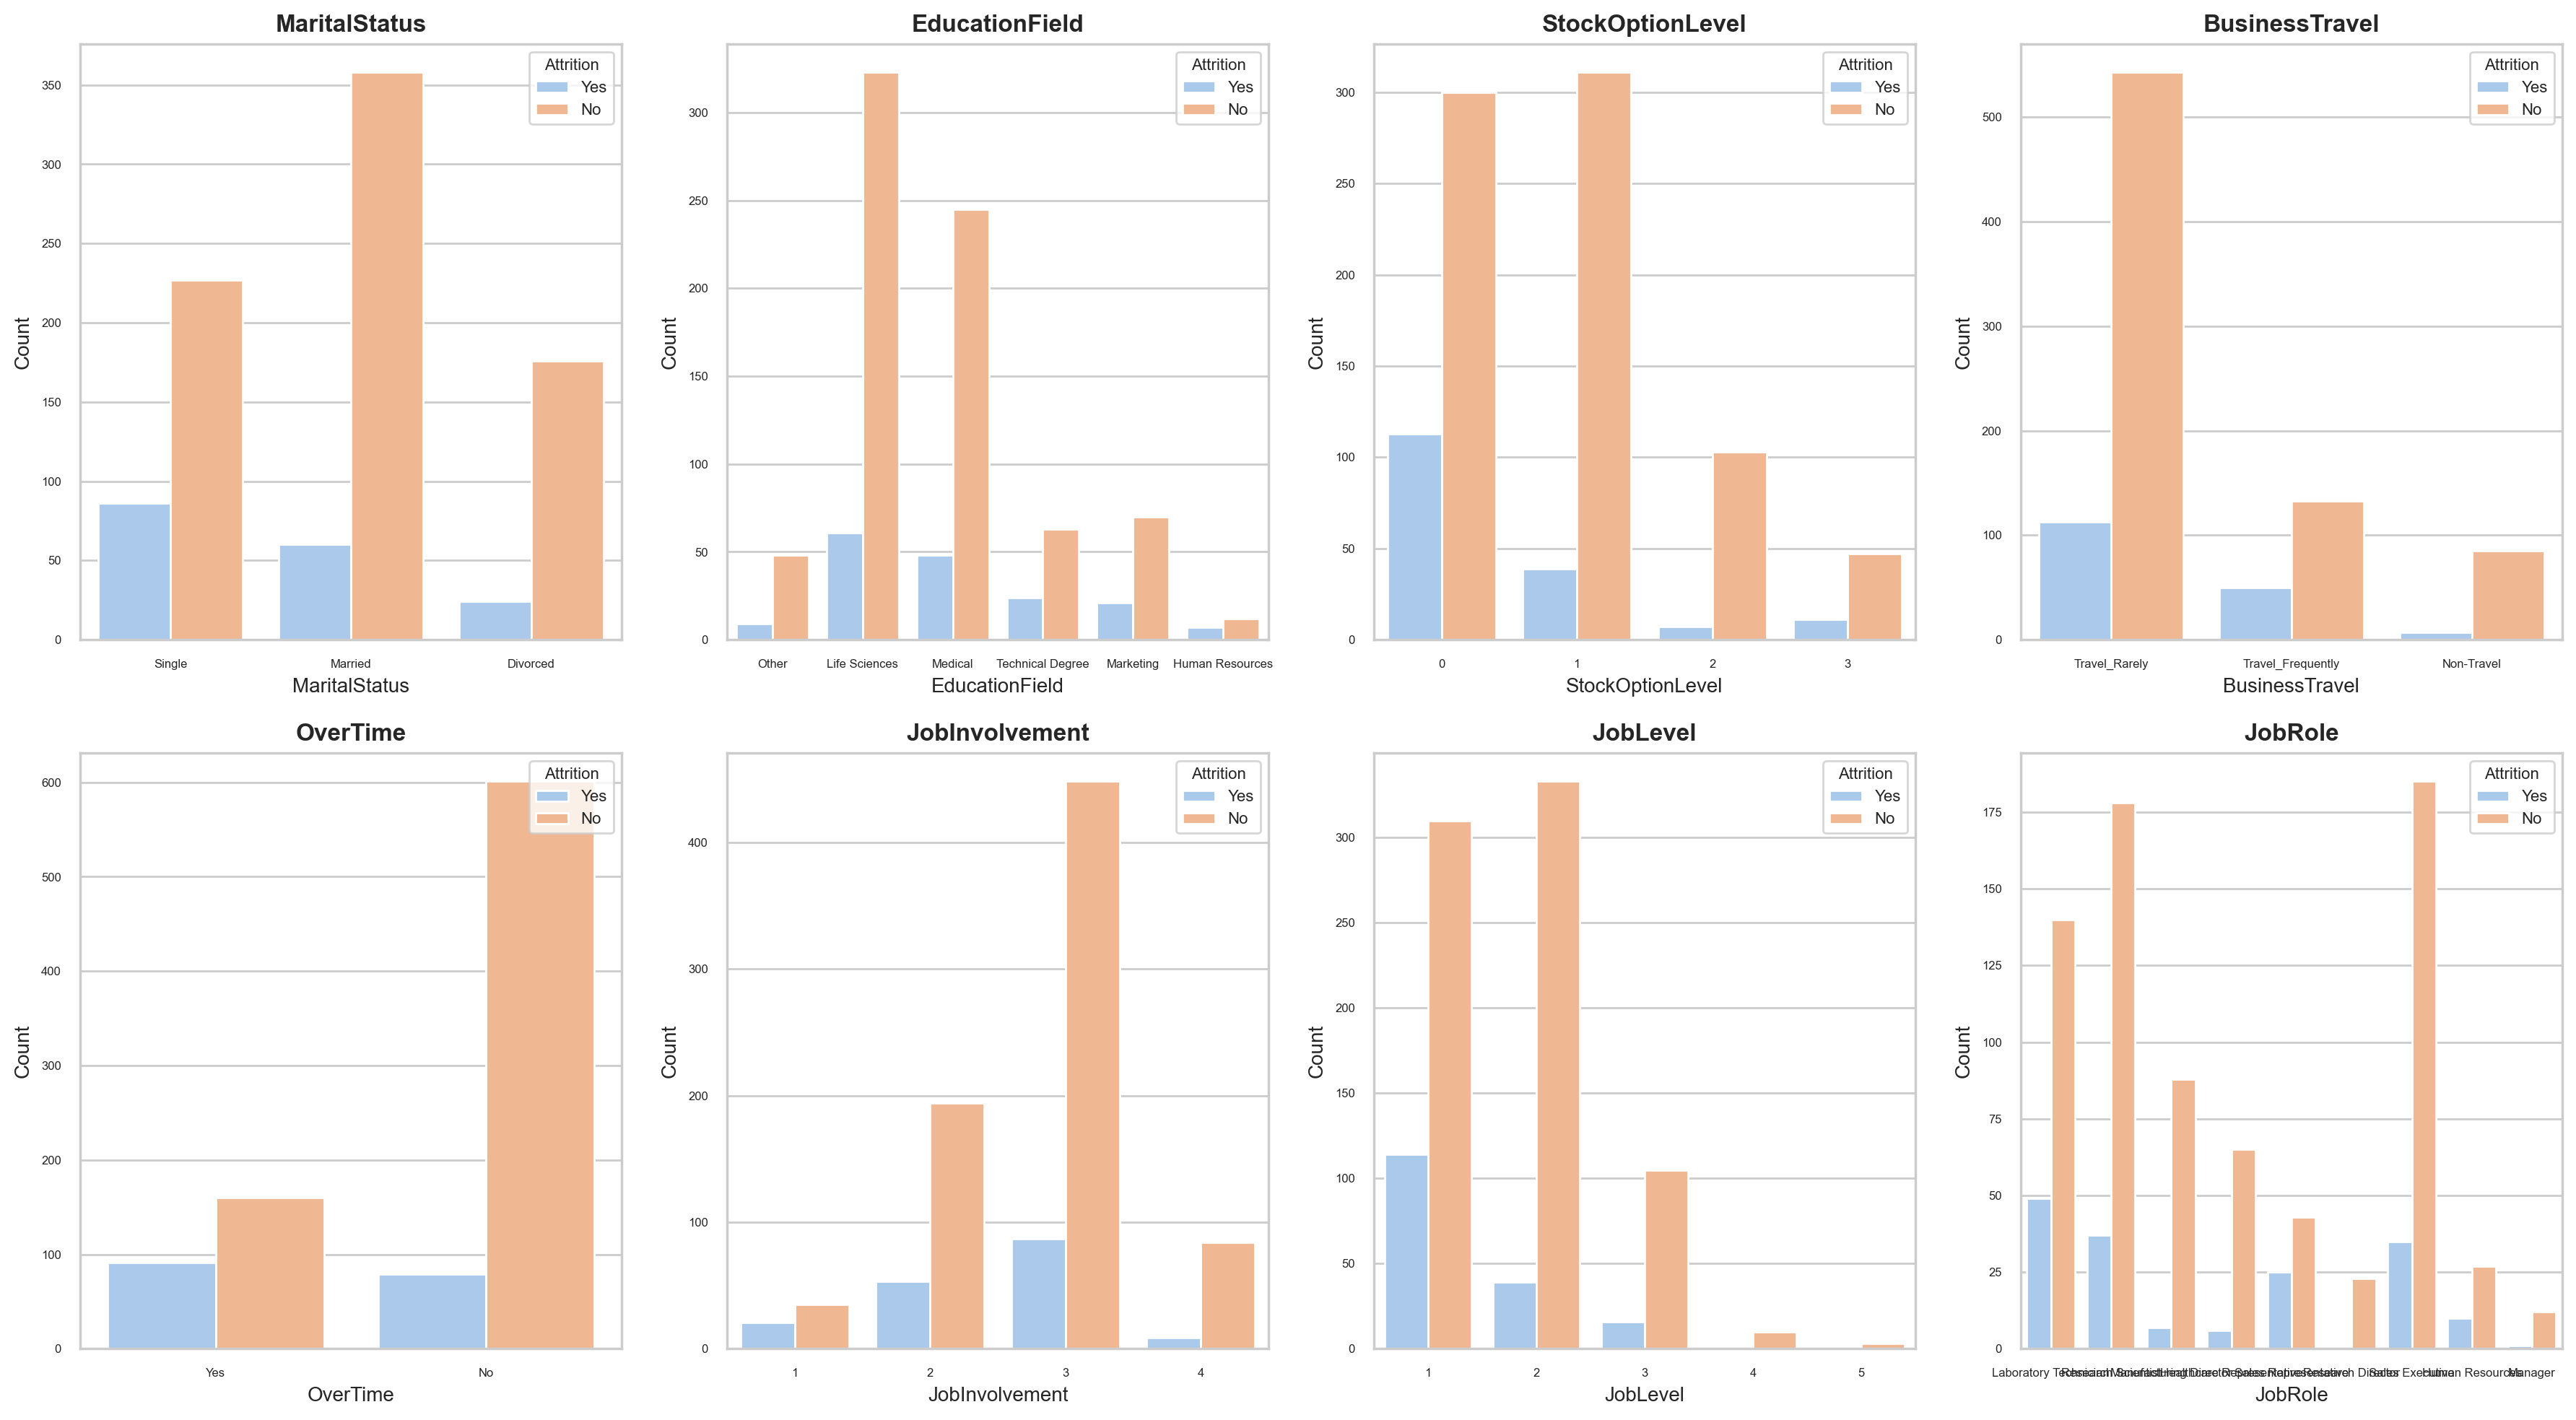

In [686]:
# 2-30대의 범주형 피쳐들도 막대그래프로 확인해보자 !

cols = ['MaritalStatus', 'EducationField', 'StockOptionLevel', 'BusinessTravel',
        'OverTime', 'JobInvolvement', 'JobLevel', 'JobRole']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
plt.subplots_adjust(wspace=0.3) # subplot간 간격 조정

for col, ax in zip(cols, axes.flatten()):
    sns.countplot(x=col, hue='Attrition', data=df_2030, ax=ax, palette='pastel') # palette 추가
    ax.set_title(col, fontsize=12, fontweight='bold') # 폰트 크기 및 굵기 설정
    ax.set_xlabel(col, fontsize=10) # x축 라벨 폰트 크기 설정
    ax.set_ylabel('Count', fontsize=10) # y축 라벨 폰트 크기 설정
    ax.tick_params(axis='both', labelsize=6) # tick label 폰트 크기 설정
    ax.legend(title='Attrition', loc='upper right', fontsize=8, title_fontsize=8) # 범례 설정

plt.tight_layout()
plt.show()

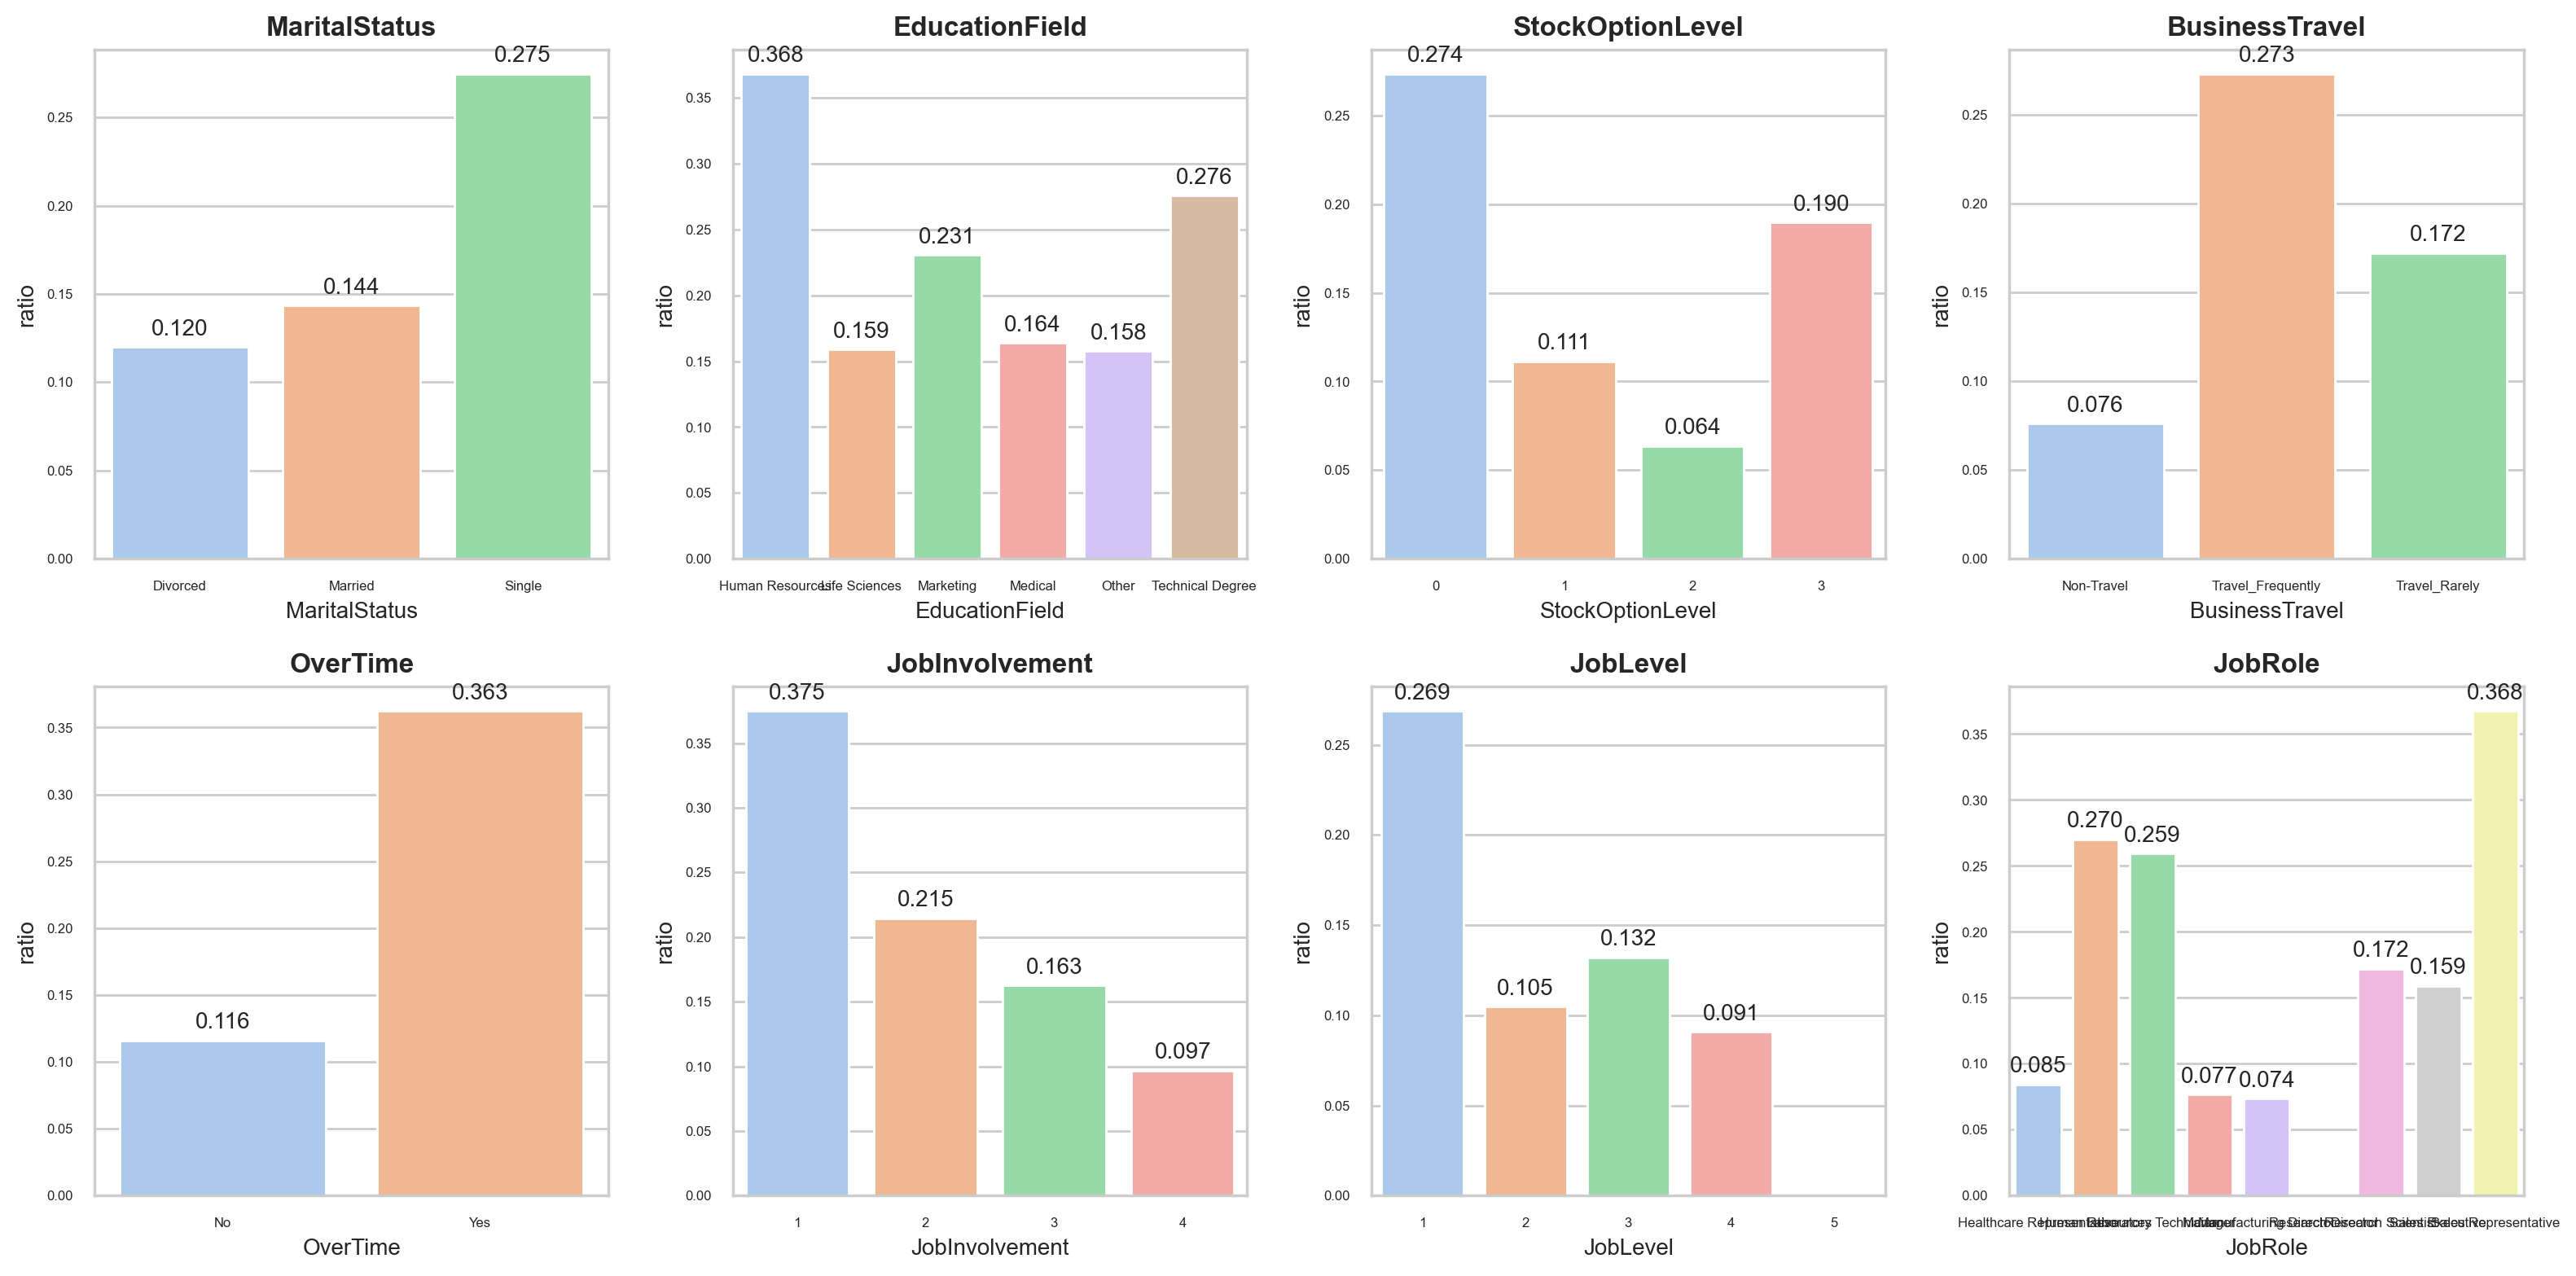

In [687]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
plt.subplots_adjust(wspace=0.3) # subplot간 간격 조정

cols = ['MaritalStatus', 'EducationField', 'StockOptionLevel', 'BusinessTravel',
        'OverTime', 'JobInvolvement', 'JobLevel', 'JobRole']

for col, ax in zip(cols, axes.flatten()):
    attrition_mar = attrition_ratio_yes(df_2030, col)
    ax = sns.barplot(data=attrition_mar, x=attrition_mar.index, y='ratio', ax=ax, palette='pastel')
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords='offset points', 
                    ha='center', va='bottom', fontsize=10)
        
    ax.set_title(col, fontsize=12, fontweight='bold') # 폰트 크기 및 굵기 설정
    ax.set_xlabel(col, fontsize= 10) # x축 라벨 폰트 크기 설정
    ax.set_ylabel('ratio', fontsize=10) # y축 라벨 폰트 크기 설정
    ax.tick_params(axis='both', labelsize=6) # tick label 폰트 크기 설정

plt.tight_layout()
plt.show()

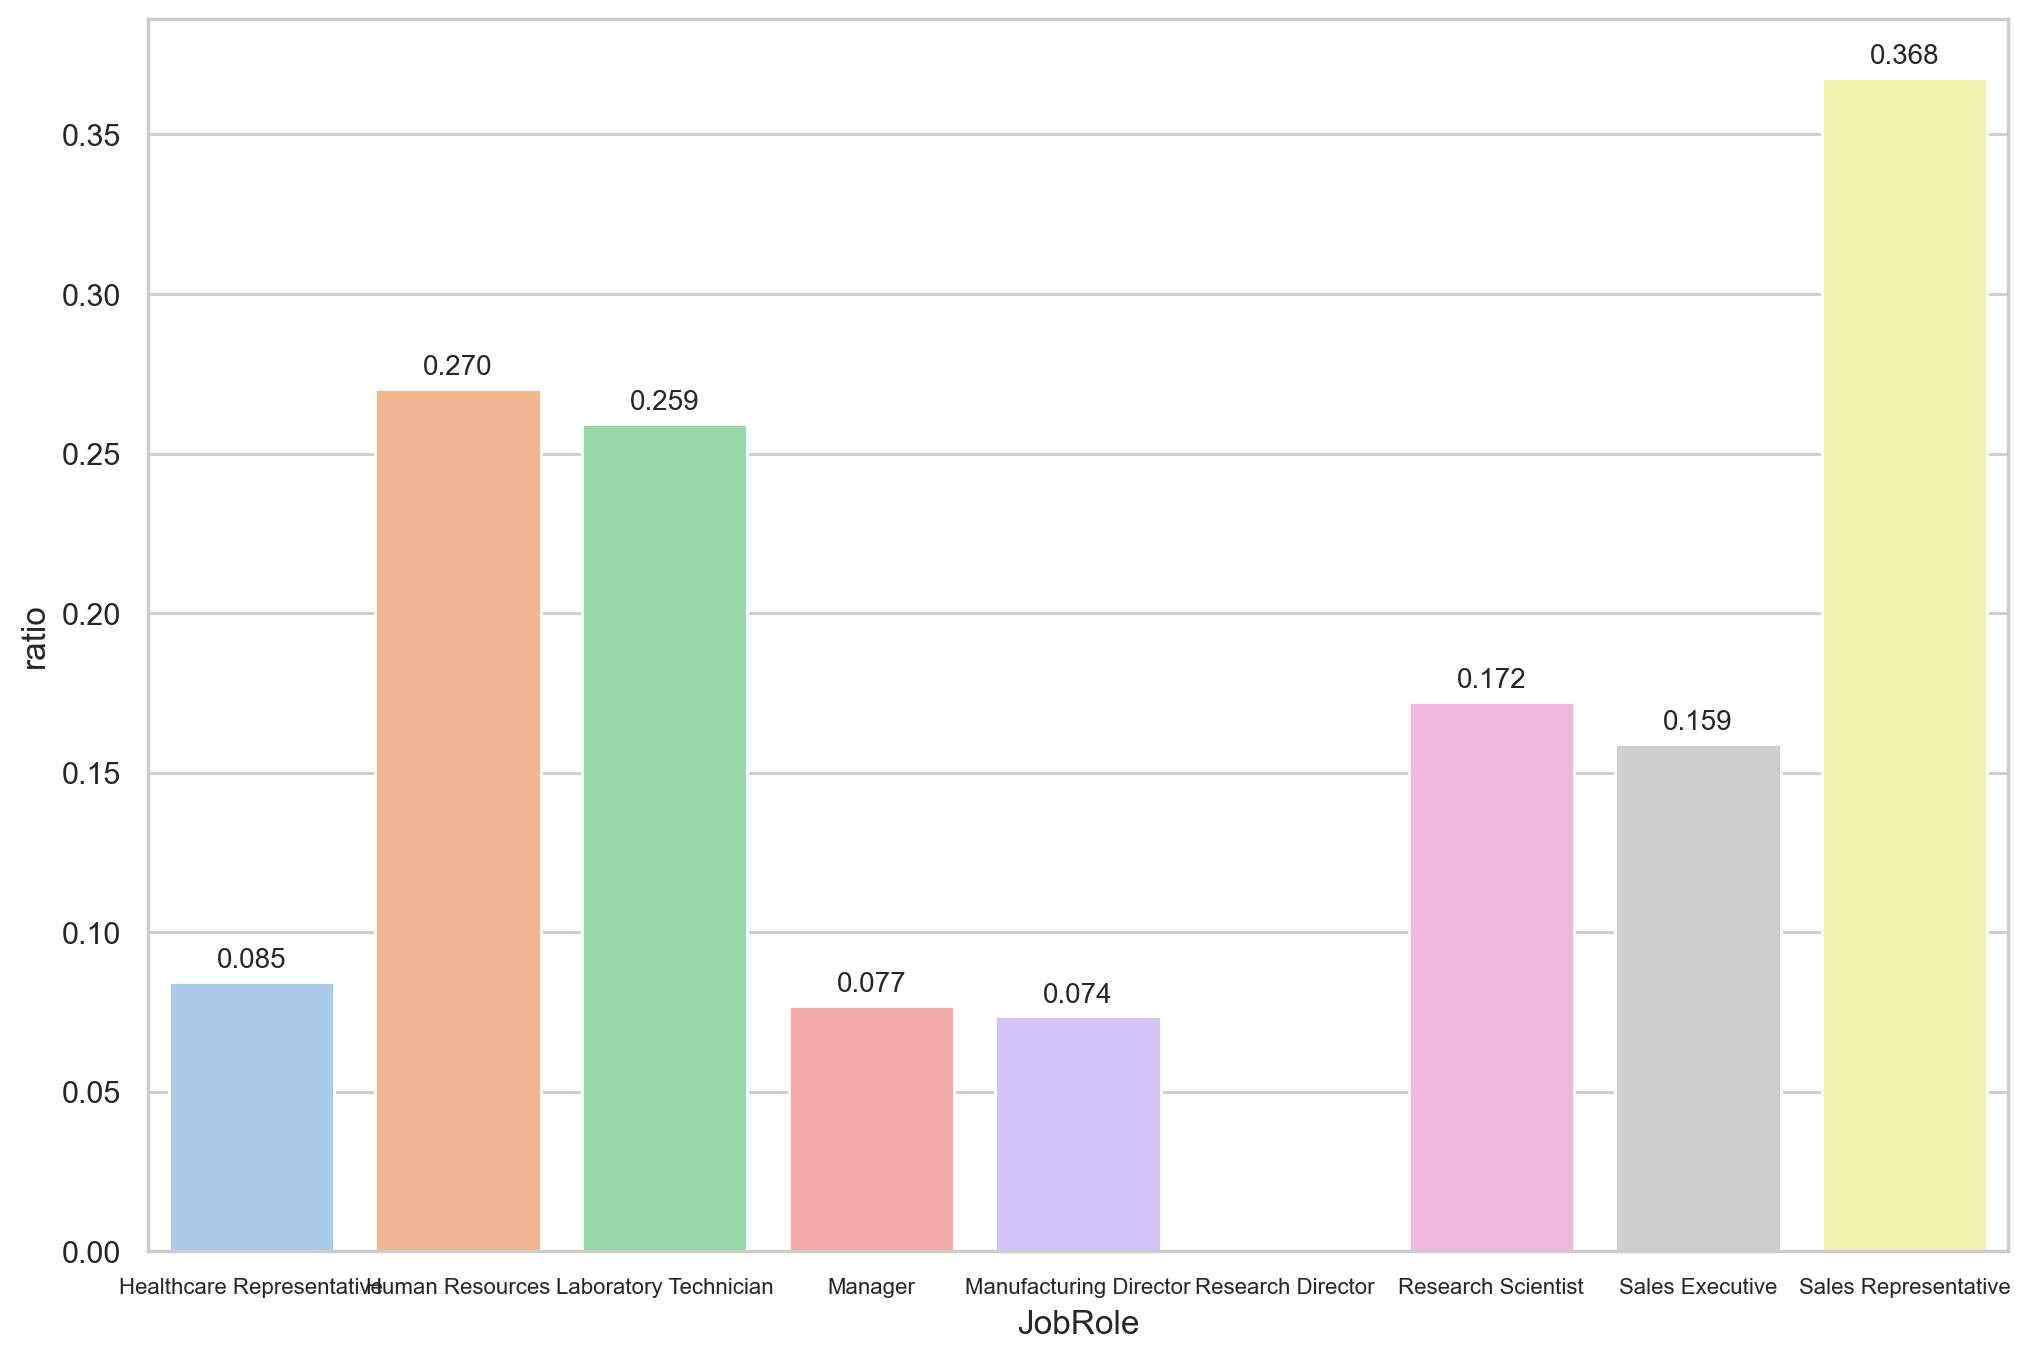

In [679]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=attrition_ratio_yes(df_2030, 'JobRole'), x=attrition_mar.index, y='ratio', palette='pastel')
for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords='offset points', 
                    ha='center', va='bottom', fontsize=10)
plt.xticks(fontsize=8)
plt.show()

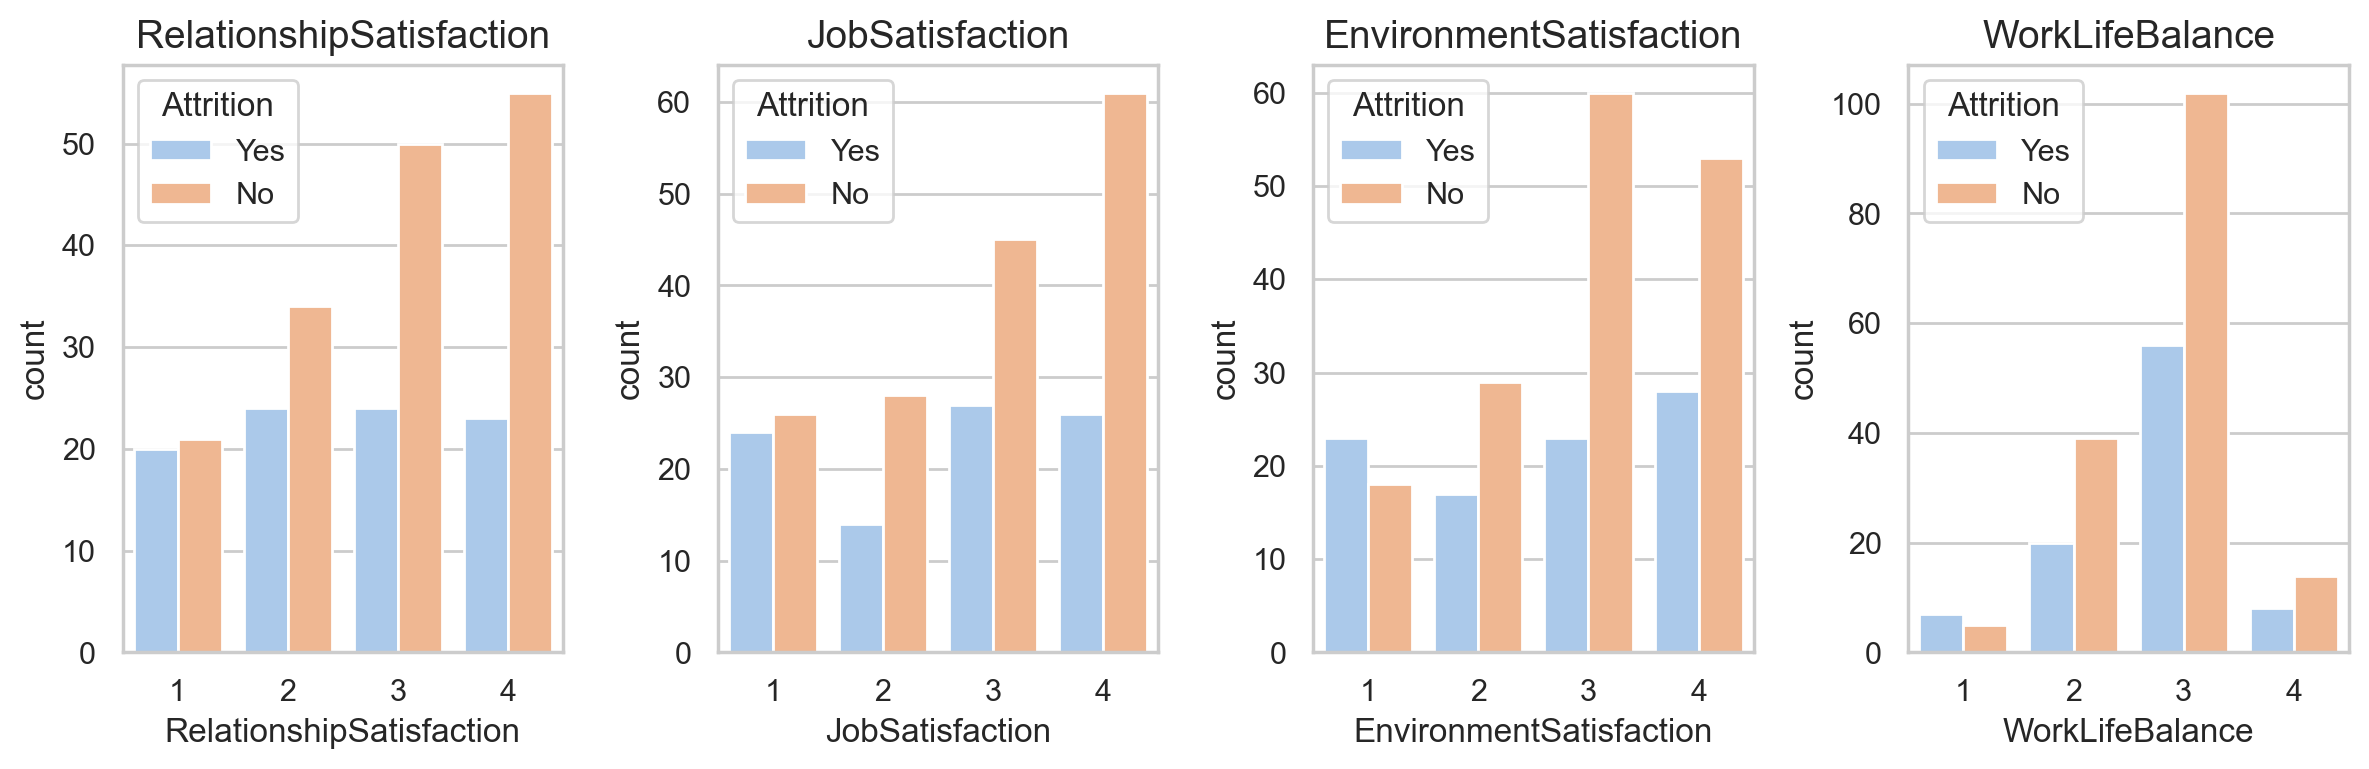

In [692]:
cols = ['RelationshipSatisfaction', 'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for col, ax in zip(cols, axes.flatten()):
    sns.countplot(x=col, hue='Attrition', data=df_2030[df_2030['OverTime'] =='Yes'], ax=ax, palette='pastel')
    ax.set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

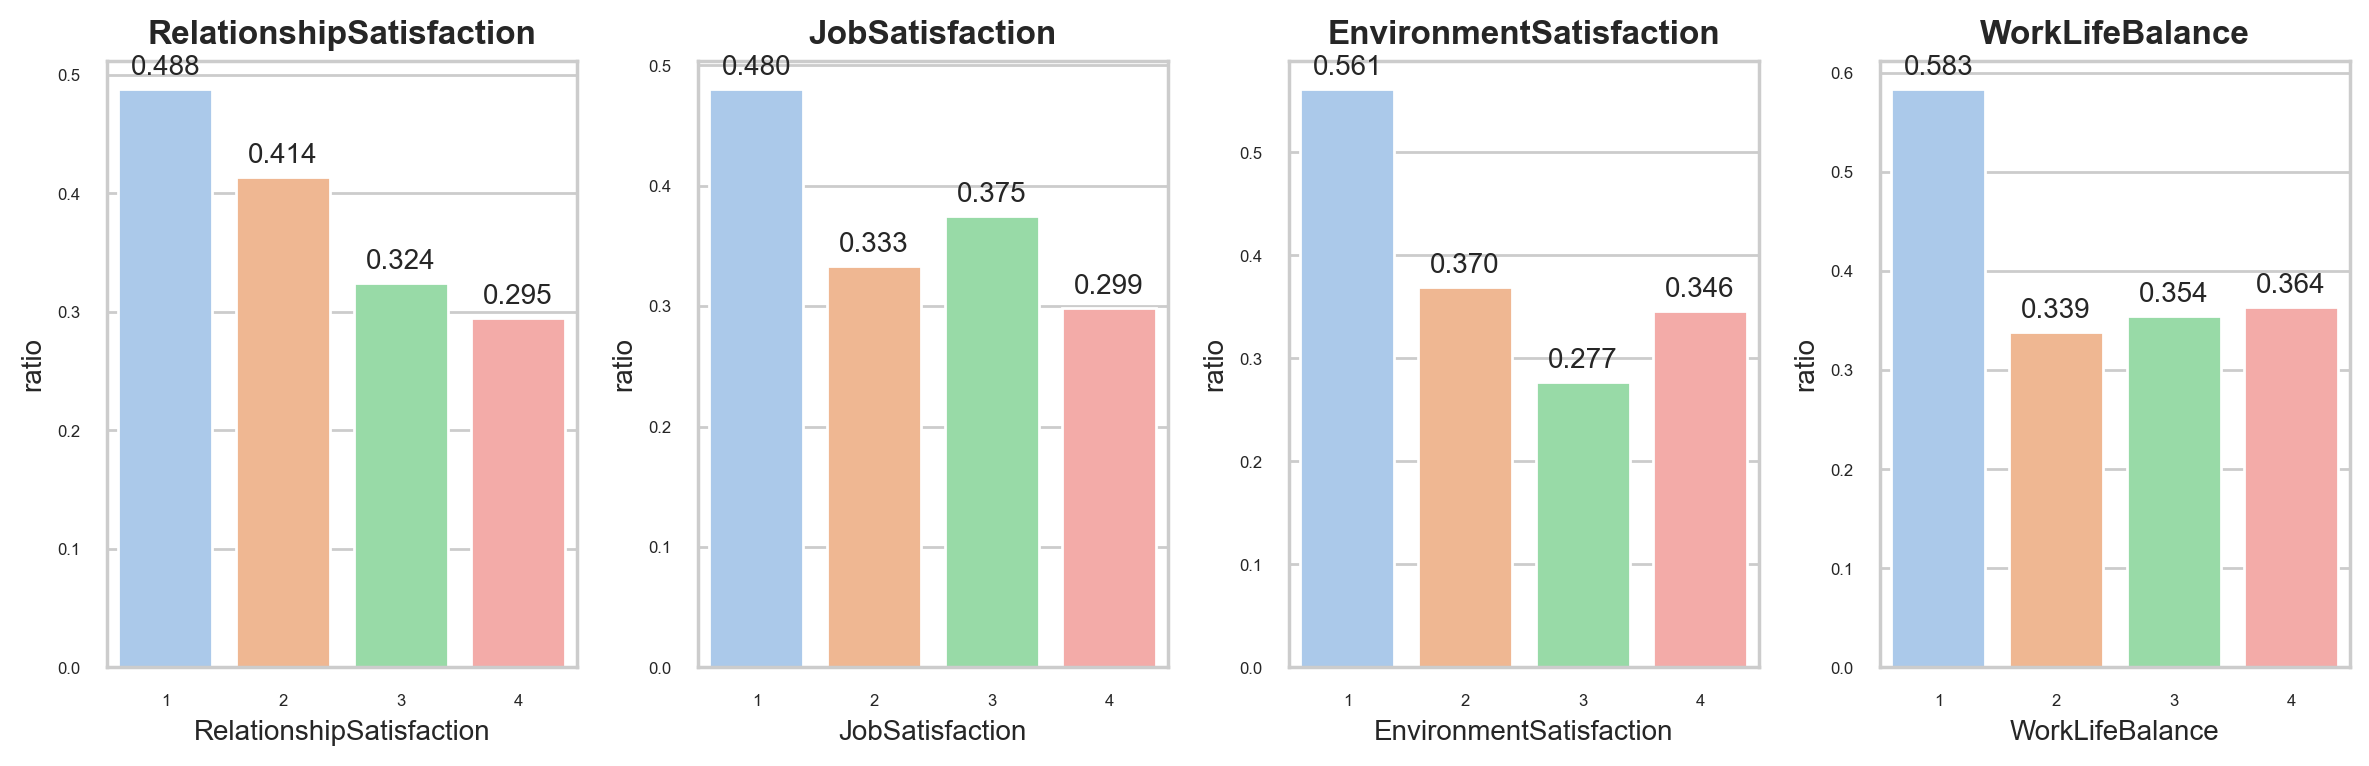

In [691]:
# 초과 근무한 2-30대의 만족도에 대하여..
cols = ['RelationshipSatisfaction', 'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for col, ax in zip(cols, axes.flatten()):
    attrition_mar = attrition_ratio_yes(df_2030[df_2030['OverTime'] =='Yes'], col)
    ax = sns.barplot(data=attrition_mar, x=attrition_mar.index, y='ratio', ax=ax, palette='pastel')
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords='offset points', 
                    ha='center', va='bottom', fontsize=10)
        
    ax.set_title(col, fontsize=12, fontweight='bold') # 폰트 크기 및 굵기 설정
    ax.set_xlabel(col, fontsize= 10) # x축 라벨 폰트 크기 설정
    ax.set_ylabel('ratio', fontsize=10) # y축 라벨 폰트 크기 설정
    ax.tick_params(axis='both', labelsize=6) # tick label 폰트 크기 설정

plt.tight_layout()
plt.show()

* 2-30대 중에서 성과가 좋은 직원들의 야근, 출장, 직무만족도 살펴보자

In [700]:
df_2030.columns 
#'PerformanceRating', 'PercentSalaryHike', 'JobInvolvement'

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_cat'],
      dtype='object')

In [715]:
df_2030['PercentSalaryHike'].unique()

array([15, 11, 12, 13, 22, 21, 17, 14, 18, 23, 16, 19, 20, 24, 25])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

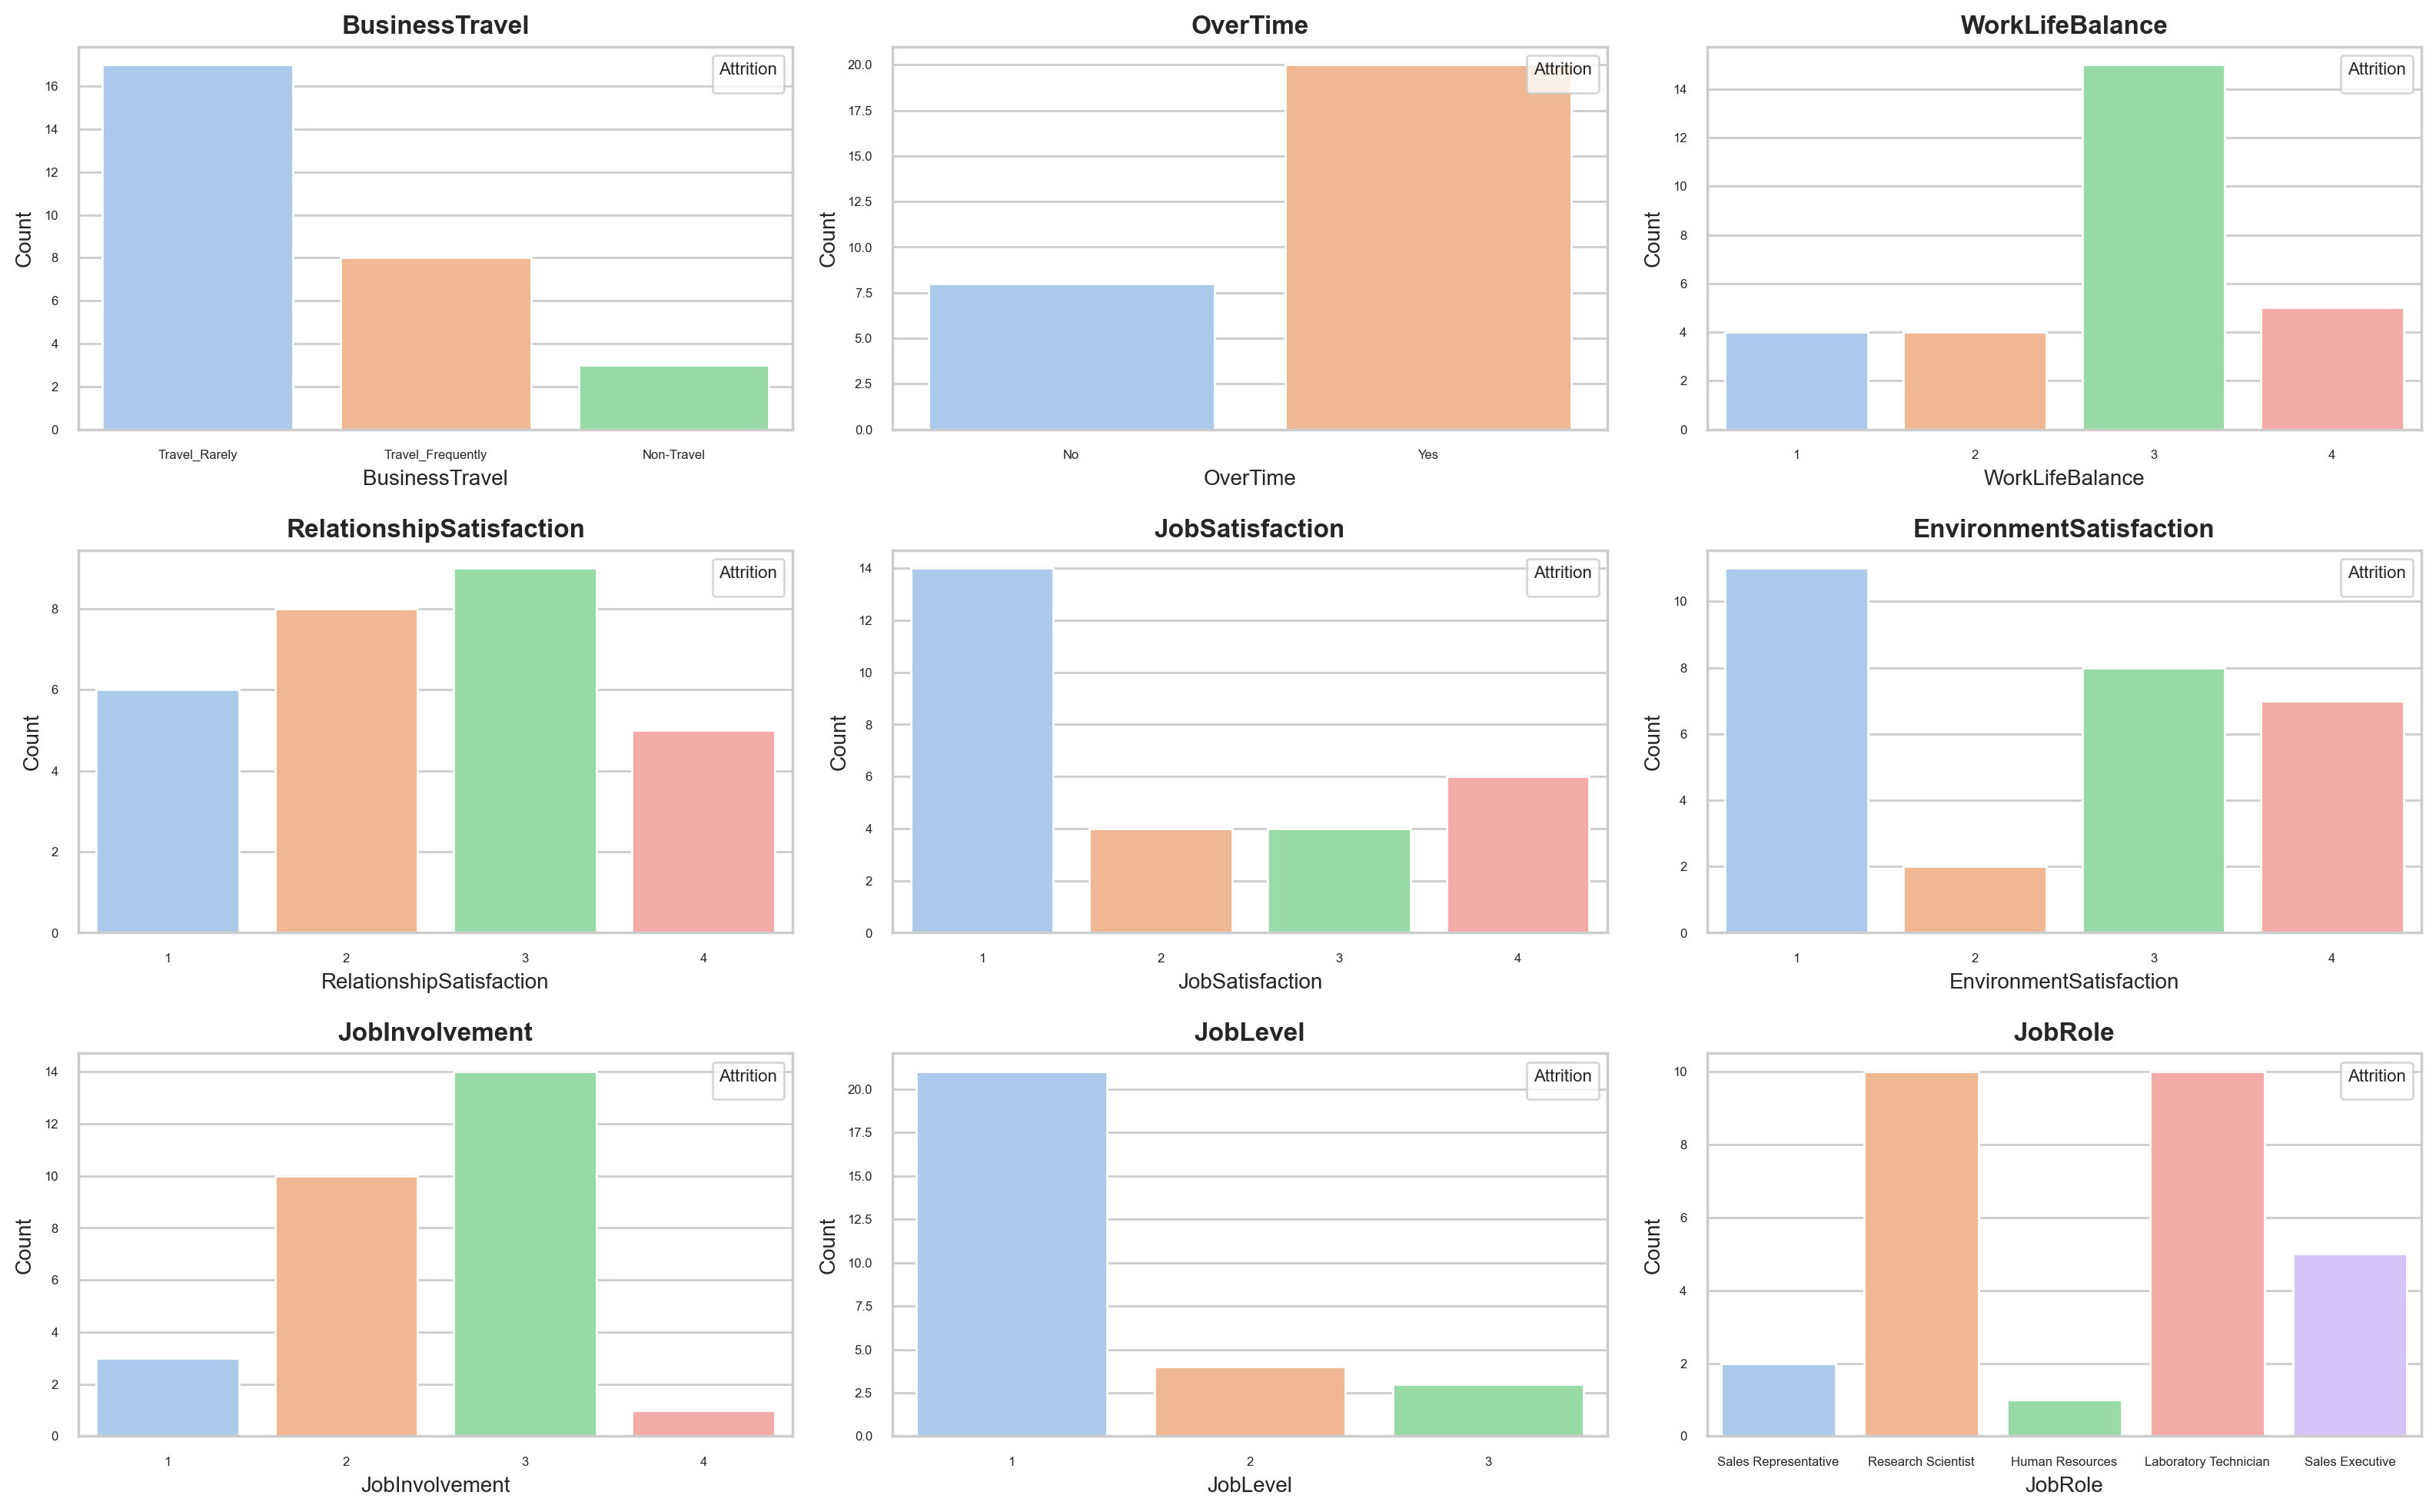

In [710]:
# df_2030[(df_2030['PerformanceRating'] == 4) & (df_2030['PercentSalaryHike']>=20)]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))
plt.subplots_adjust(wspace=0.3) # subplot간 간격 조정

cols = ['BusinessTravel', 'OverTime', 'WorkLifeBalance',
        'RelationshipSatisfaction', 'JobSatisfaction', 'EnvironmentSatisfaction', 
        'JobInvolvement', 'JobLevel', 'JobRole']


for col, ax in zip(cols, axes.flatten()):
    sns.countplot(x=col, data=df_2030[(df_2030['PerformanceRating'] == 4) & (df_2030['Attrition'] == 'Yes')& (df_2030['PercentSalaryHike']>=20)], ax=ax, palette='pastel') # palette 추가
    ax.set_title(col, fontsize=12, fontweight='bold') # 폰트 크기 및 굵기 설정
    ax.set_xlabel(col, fontsize=10) # x축 라벨 폰트 크기 설정
    ax.set_ylabel('Count', fontsize=10) # y축 라벨 폰트 크기 설정
    ax.tick_params(axis='both', labelsize=6) # tick label 폰트 크기 설정
    ax.legend(title='Attrition', loc='upper right', fontsize=8, title_fontsize=8) # 범례 설정

plt.tight_layout()
plt.show()

### 통근거리

In [ ]:
sns.countplot(data=df_raw, x='DistanceFromHome')
plt.show()

* 통근 거리가 가까운 사람이 많아 보이네요

In [ ]:
plt.hist(negative_attrition_df['DistanceFromHome'], 
         bins=np.arange(0,80,10), 
         alpha=0.8, 
         rwidth=0.9, 
         color='red'
         )

In [ ]:
plt.hist(positive_attrition_df['DistanceFromHome'], 
         bins=np.arange(0,80,10), 
         alpha=0.8, 
         rwidth=0.9, 
         color='red')

## 범주형 데이터

### 성별

In [ ]:
sns.countplot(data=df_raw, x='Gender')

In [ ]:
# 범주형-범주형 상관관계 : 카이제곱 검정

obs = pd.crosstab(df_raw['Attrition'], df_raw['Gender'])
chi2, p, dof, expected = chi2_contingency(obs)

print("Chi-square:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

* P-value가 0.05보다 크기 때문에 귀무가설 기각할 수 없음.
* 따라서, 유의미한 관계 없다고 볼 수 있음.
* 독립적으로 예상되는 빈도대로 분포한다.. >> 범주 간 차이가 크게 예상되지 않음. 독립적임

### 결혼 유무

In [ ]:
sns.countplot(data=df_raw, x='MaritalStatus')

- 'Divorced': 0 
- 'Married' : 1 
- 'Single' : 2

In [ ]:
import plotly.graph_objs as go

data = [go.Bar(x=positive_attrition_df['MaritalStatus'].value_counts().index,
               y=positive_attrition_df['MaritalStatus'].value_counts().values)]

layout = go.Layout(title='MaritalStatus Counts')

fig = go.Figure(data=data, layout=layout)

iplot(fig)

### 18세 이상?
- 전부 18세 이상이므로 삭제 컬럼..
- 나이는 18살부터 있음(만 나이이무로 성인임..!)

In [ ]:
sns.countplot(data=df_demo, x='Over18')

### 범주형변수 따른 퇴사유무

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10,12))

sns.countplot(data=df_demo, x='Age_cat', hue='Attrition', ax=axes[0], palette='Set2')
# axes[0].set_title("age", fontsize=16)

sns.countplot(data=df_demo, x='Gender', hue='Attrition',  ax=axes[1], palette='Set1')
# axes[1].set_title("gender", fontsize=16)

sns.countplot(data=df_demo, x='MaritalStatus', hue='Attrition',  ax=axes[2], palette='Set3')

- 2-30대가 일도 많이 하고 퇴사 비율도 높다.
- 남자가 퇴사율이 조금 높다
    -  남성 직원 퇴사율이 63%에 달해, 여성 직원에 비해 퇴사 가능성이 높아 보인다.
- 결혼을 안한 사람들이 퇴사율이 높다

## 만족도
-  EnvironmentSatisfaction, JobSatisfaction, 'RelationshipSatisfaction', WorkLifeBalance
- 만족도가 높은 사람이 퇴사를 적게 할까? 만족도가 높은 사람의 특징은 뭘까?

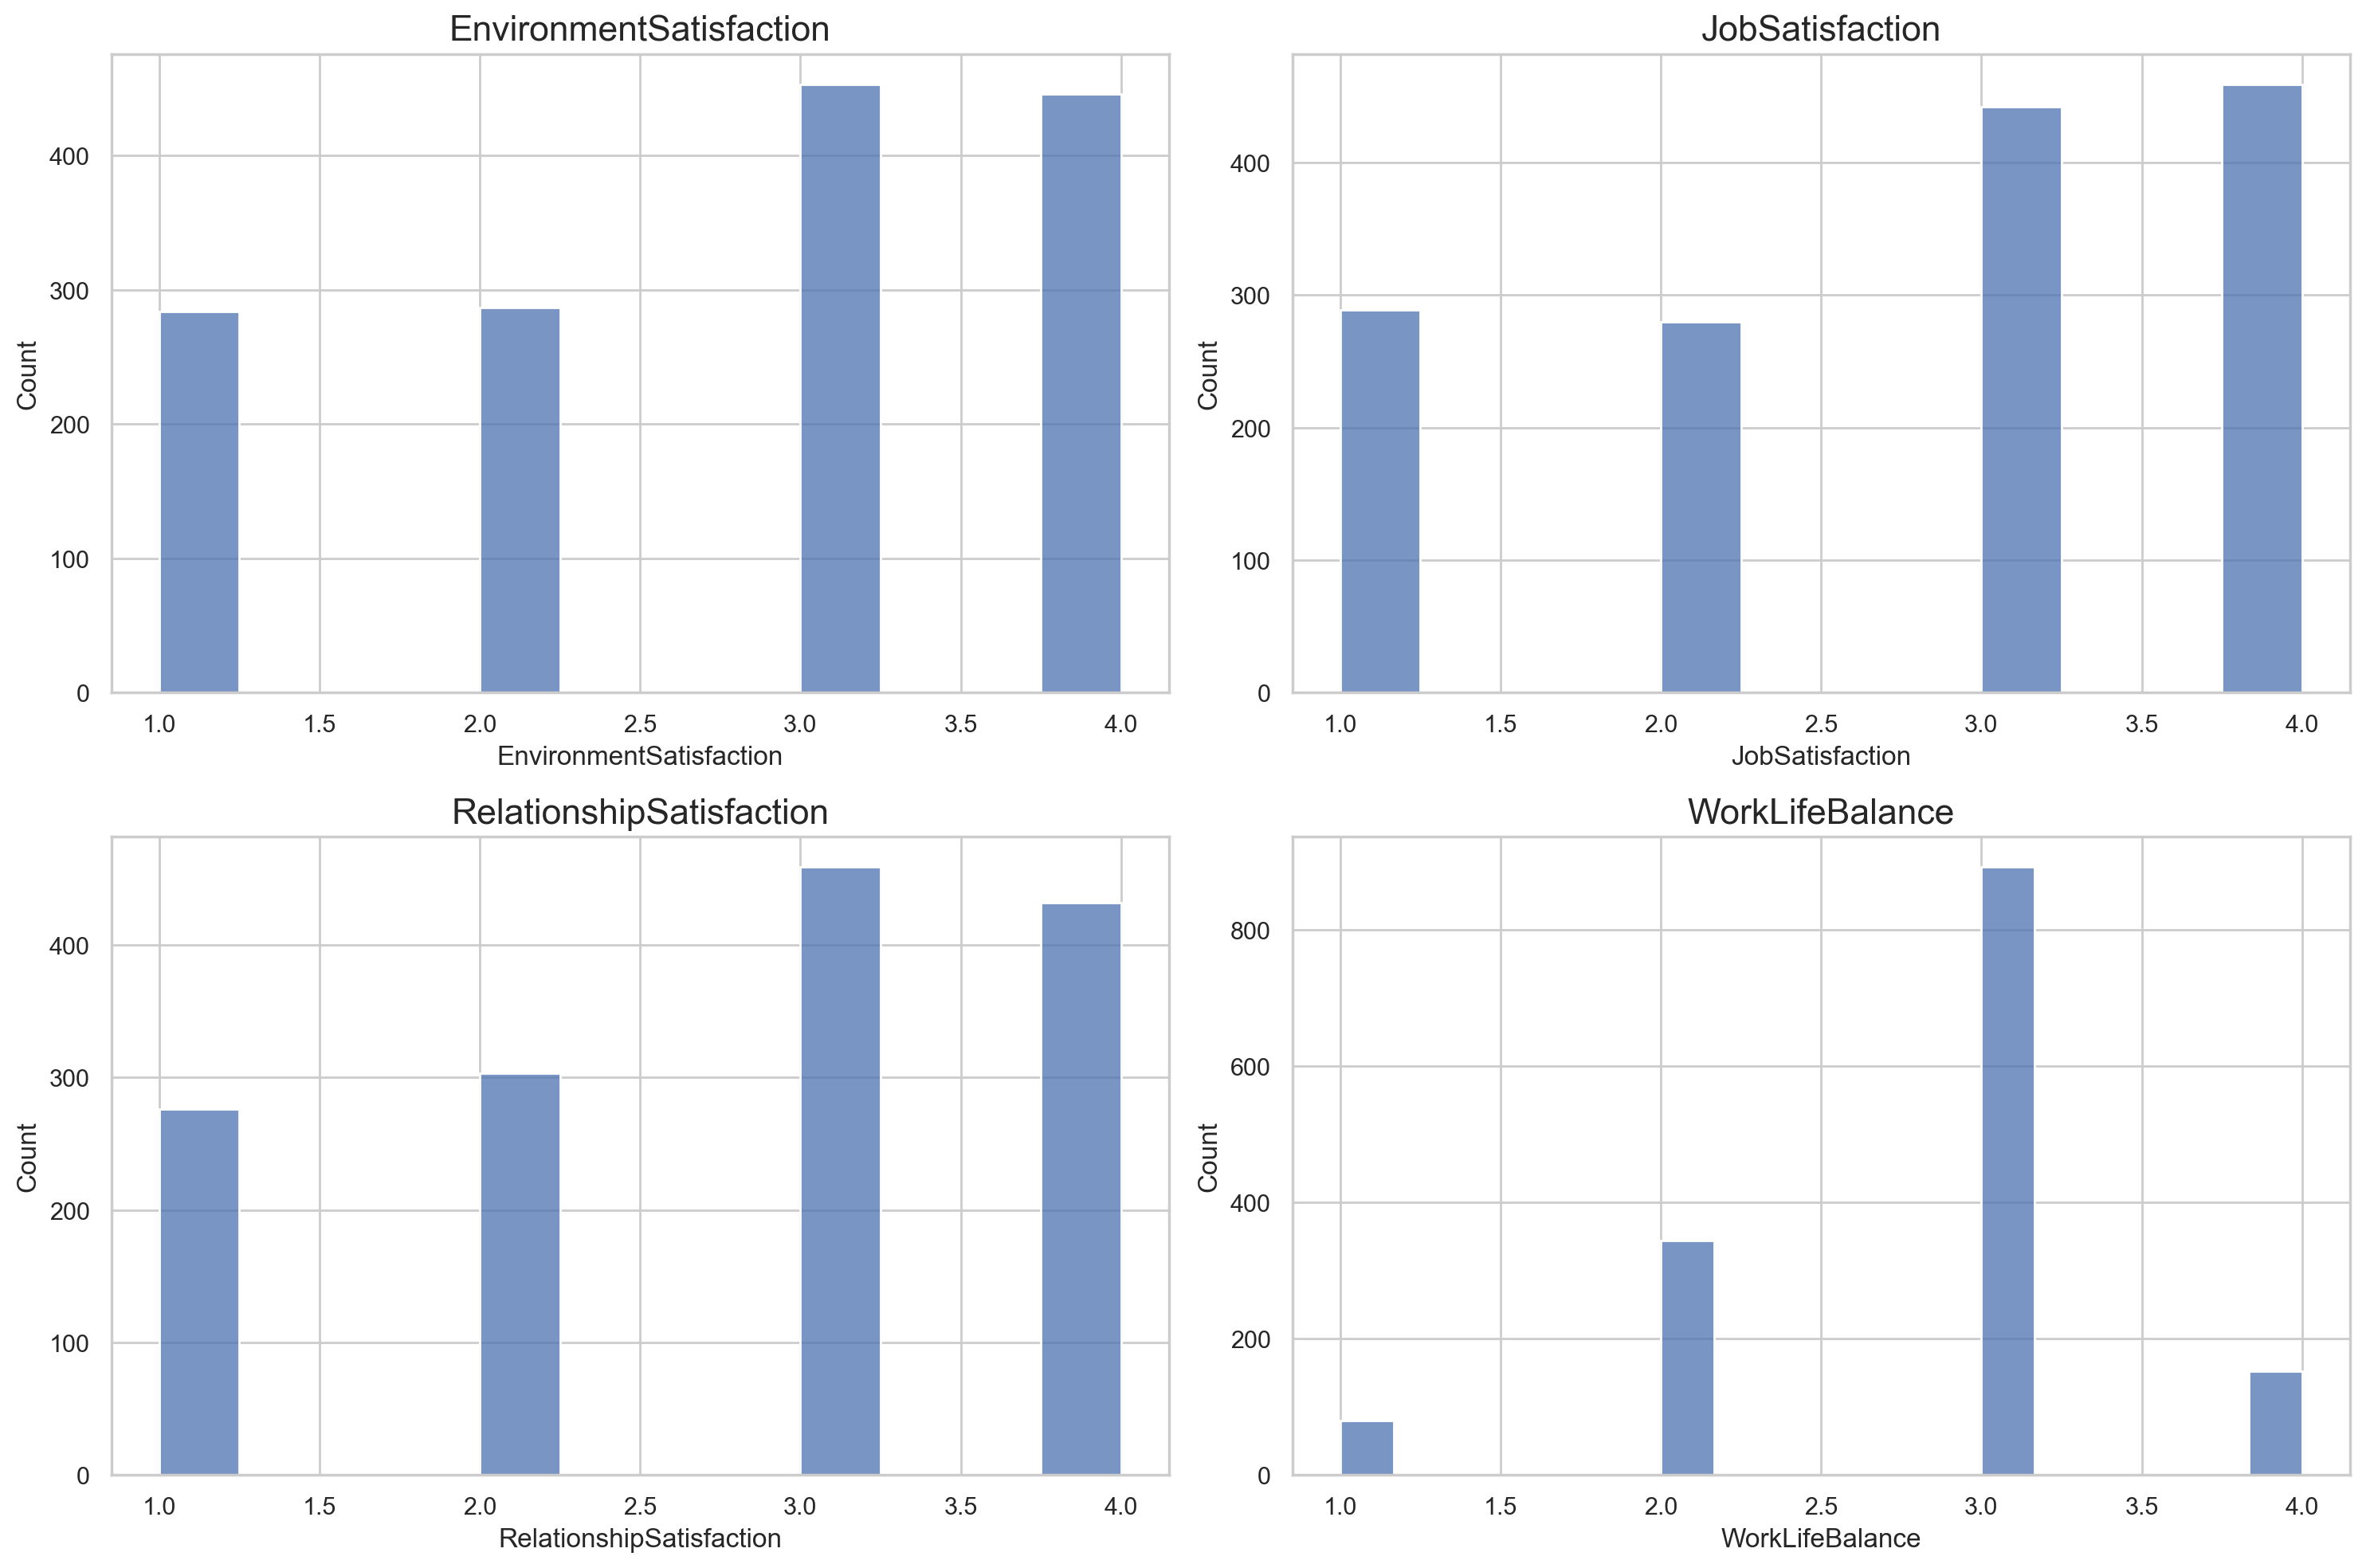

In [693]:
# 분포 살펴보기
fig, axes = plt.subplots(2, 2, figsize=(15,10))

axes[0,0].set_title("EnvironmentSatisfaction", fontsize=16)
sns.histplot(data=df_raw, x="EnvironmentSatisfaction", ax=axes[0,0])

axes[0,1].set_title("JobSatisfaction", fontsize=16)
sns.histplot(data=df_raw, x="JobSatisfaction", ax=axes[0,1])

axes[1,0].set_title("RelationshipSatisfaction", fontsize=16)
sns.histplot(data=df_raw, x="RelationshipSatisfaction", ax=axes[1,0])

axes[1,1].set_title("WorkLifeBalance", fontsize=16)
sns.histplot(data=df_raw, x="WorkLifeBalance", ax=axes[1,1])

plt.tight_layout() # 겹치지 않게 보이게 하기
plt.show()

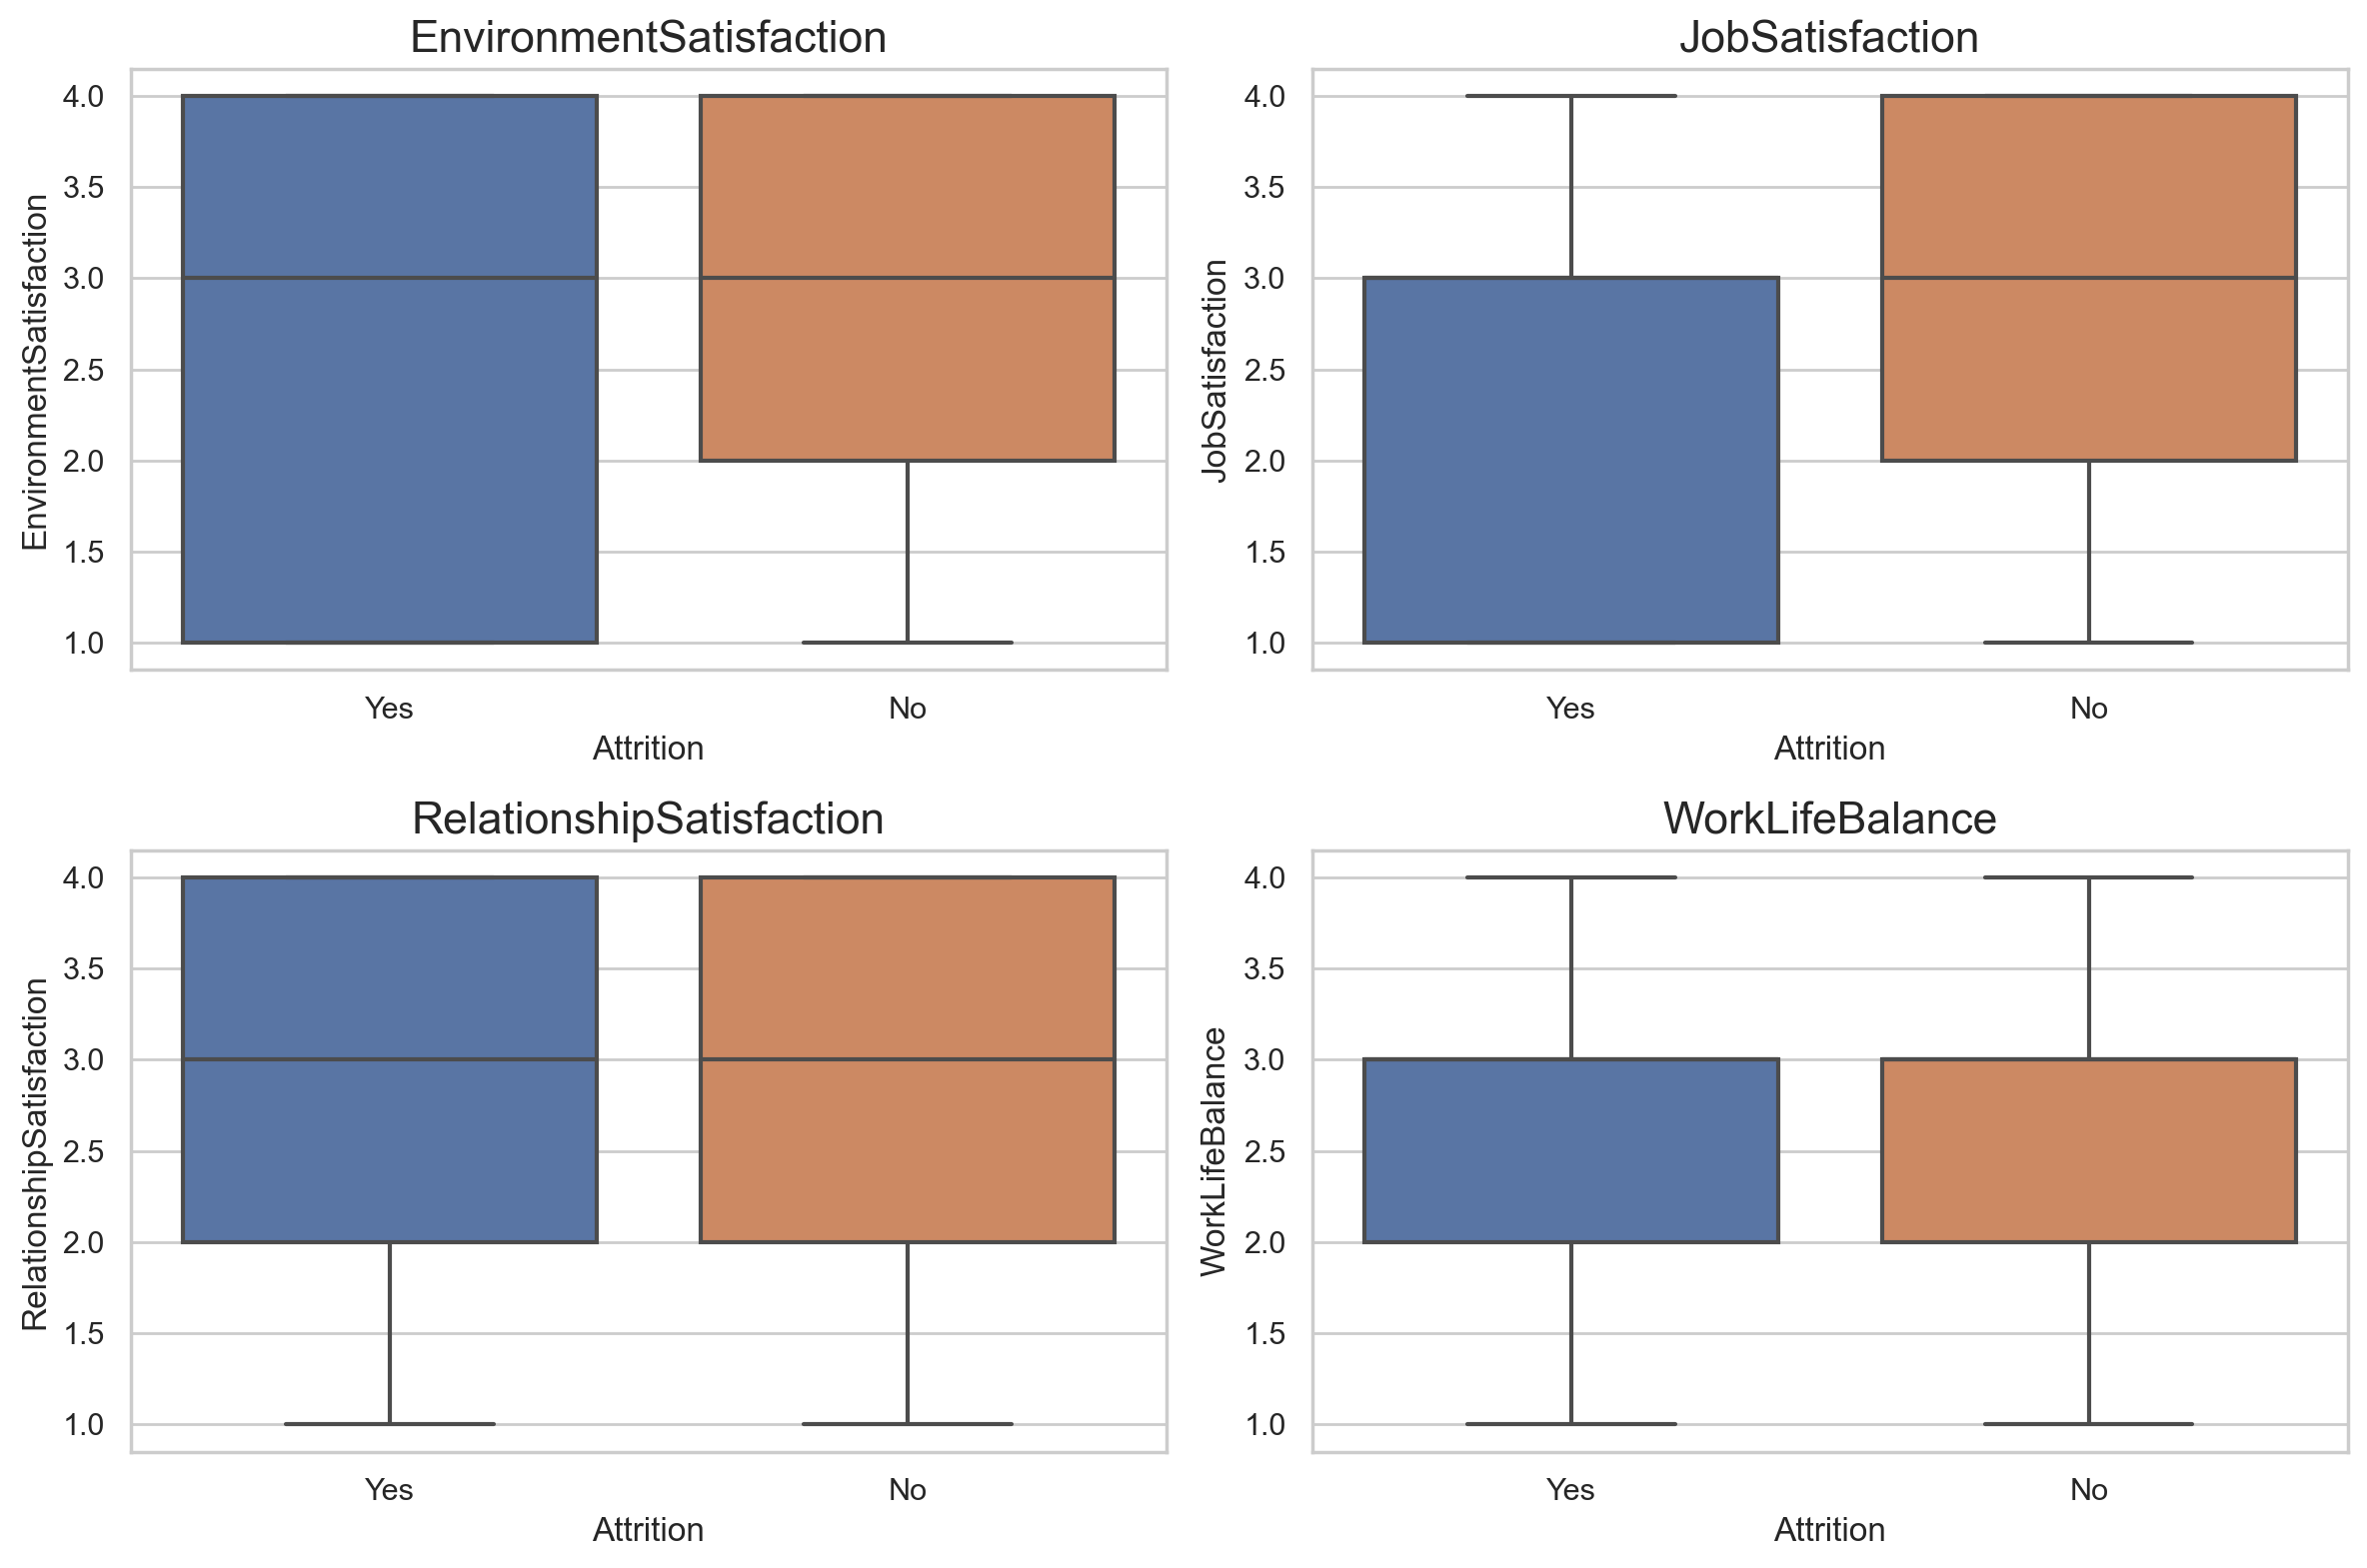

In [694]:
# 이직여부와 관계 보기
fig, axes = plt.subplots(2, 2, figsize=(12,8))

axes[0,0].set_title("EnvironmentSatisfaction", fontsize=16)
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', ax=axes[0,0], data=df_raw)

axes[0,1].set_title("JobSatisfaction", fontsize=16)
sns.boxplot(x='Attrition', y='JobSatisfaction', ax=axes[0,1], data=df_raw)

axes[1,0].set_title("RelationshipSatisfaction", fontsize=16)
sns.boxplot(x='Attrition', y='RelationshipSatisfaction', ax=axes[1,0], data=df_raw)

axes[1,1].set_title("WorkLifeBalance", fontsize=16)
sns.boxplot(x='Attrition', y='WorkLifeBalance', ax=axes[1,1], data=df_raw)

plt.tight_layout() # 겹치지 않게 보이게 하기
plt.show()


* 직업만족도만 이직한 사람들이 더 낮고, 나머지 비슷
* 환경만족도는 이직한 사람들이 점수가 고루 분포되어 있음

Text(0, 0.5, 'Monthly Income')

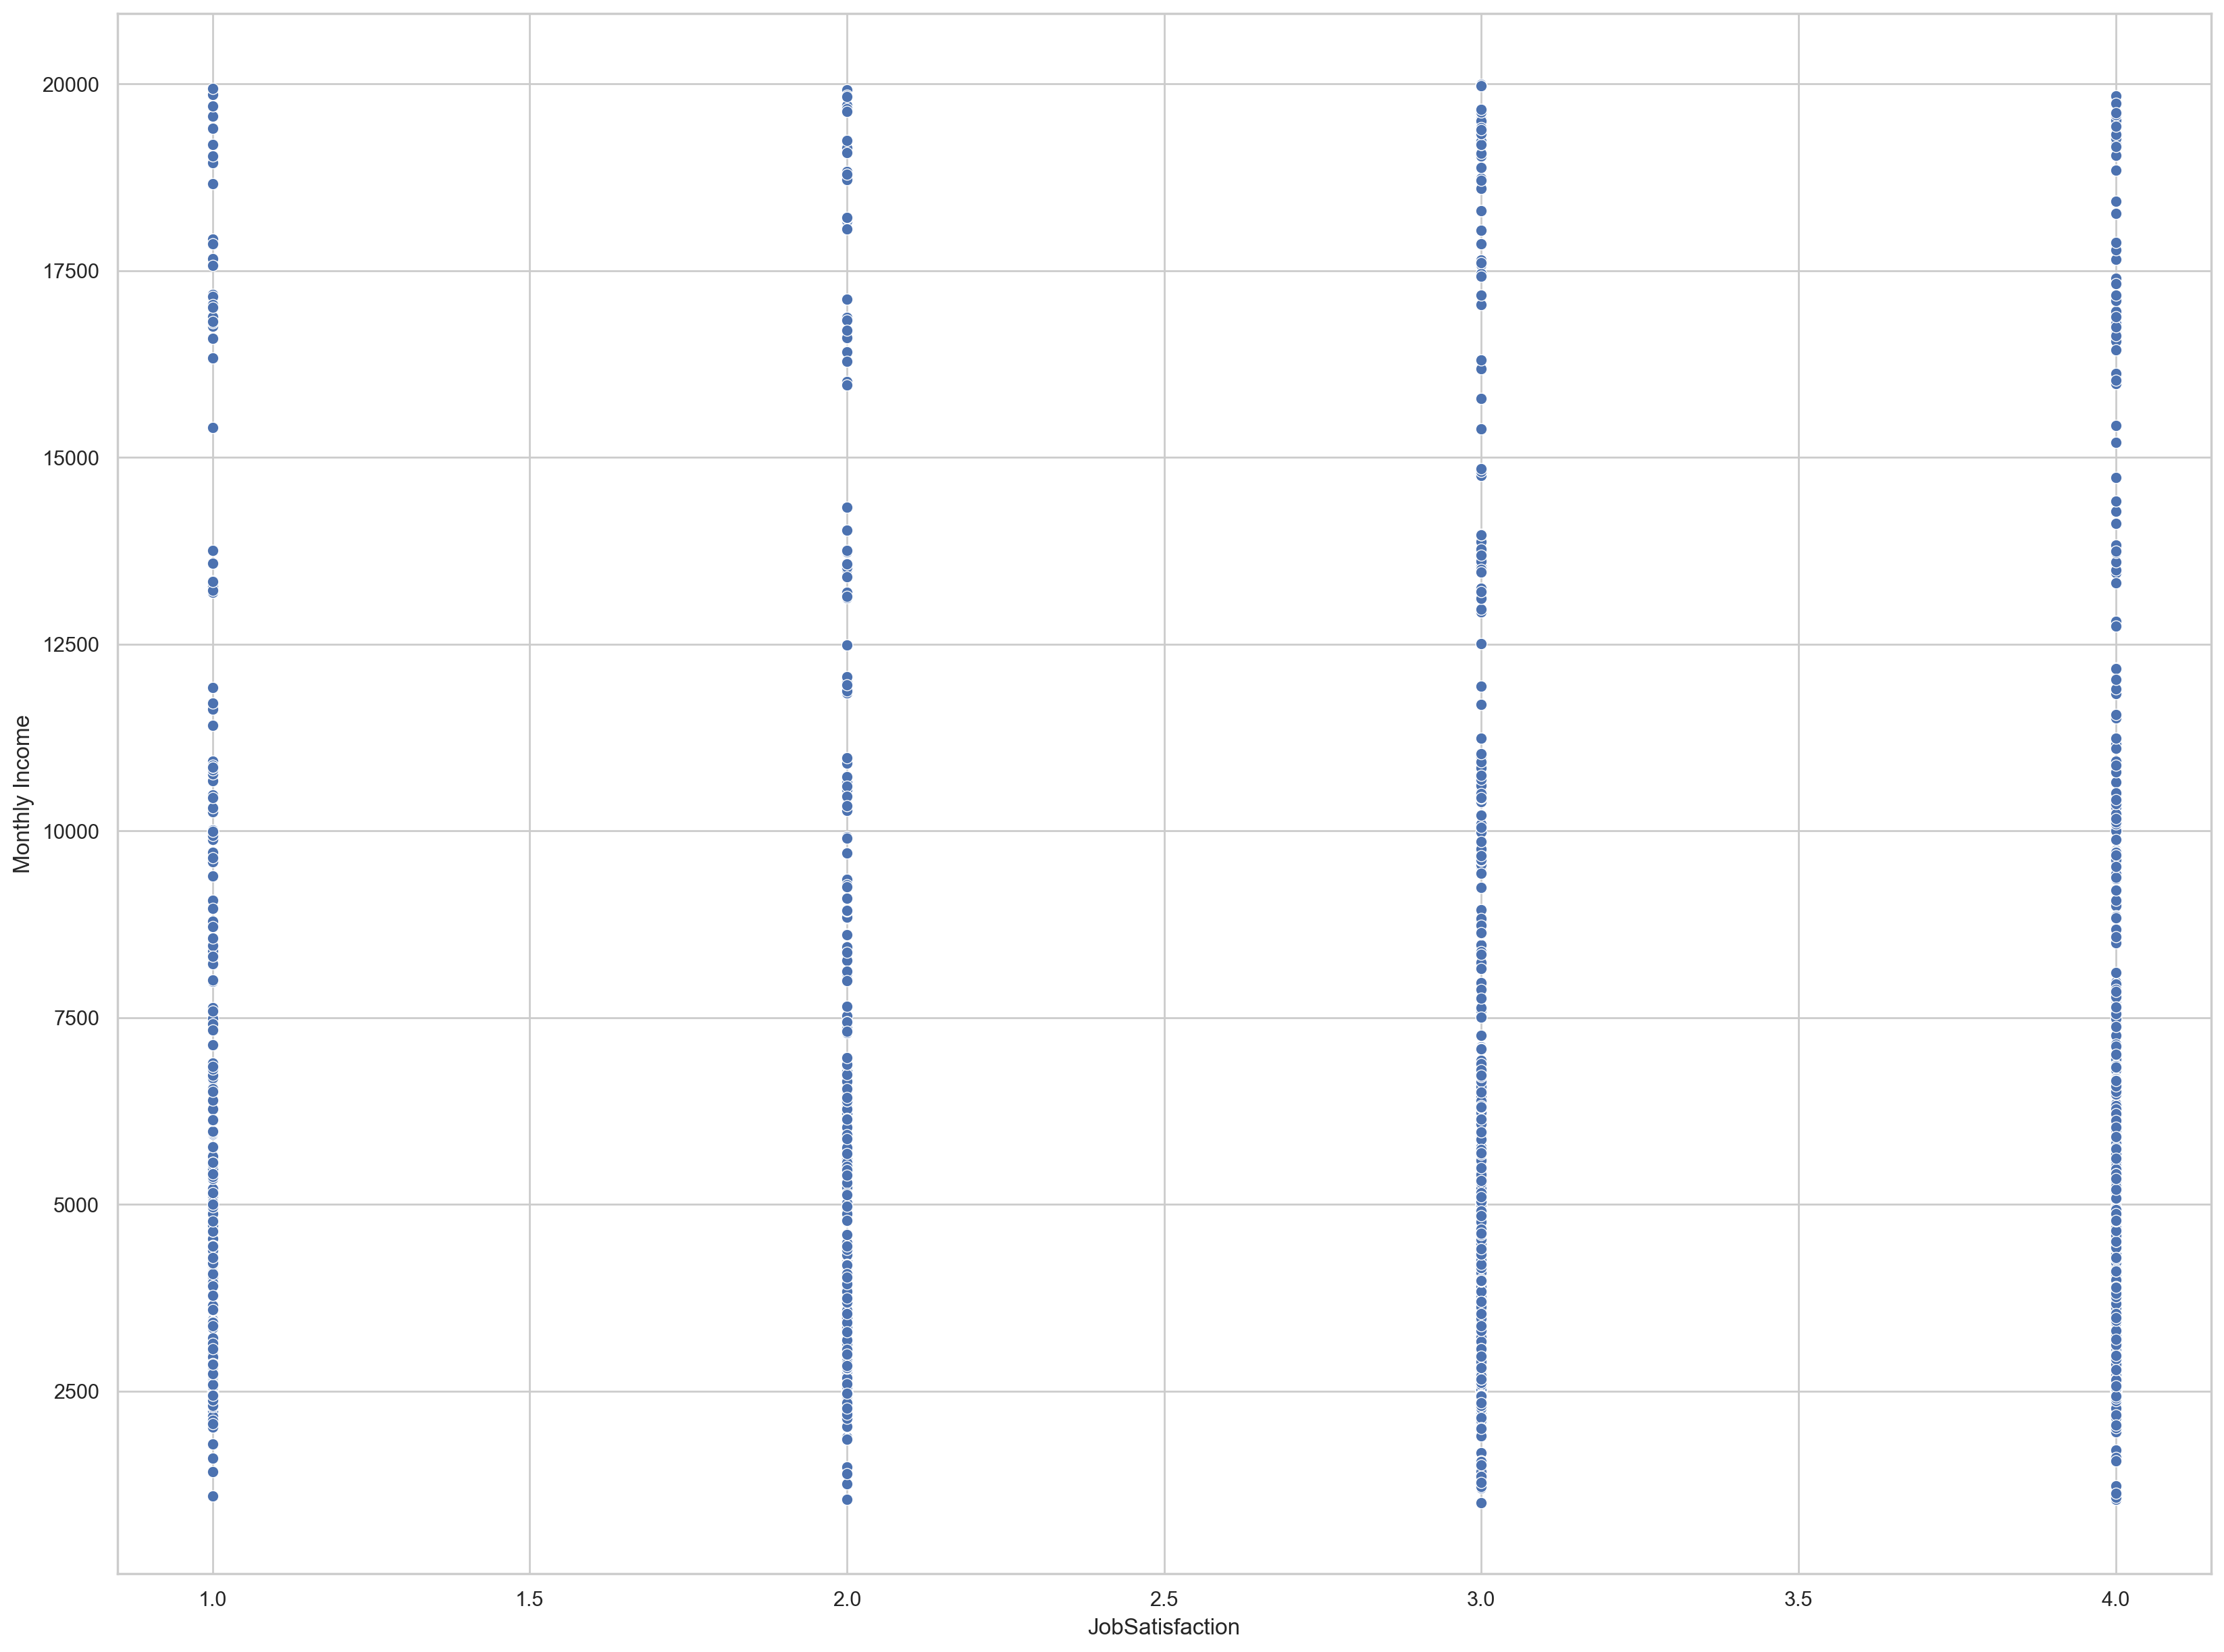

In [695]:
# 직업만족도와 월 급여간의 관계를 볼 때, 잘 모르겠음..?
sns.scatterplot(x="JobSatisfaction", y="MonthlyIncome", data=df_encoded)
plt.xlabel('JobSatisfaction')
plt.ylabel('Monthly Income')

In [ ]:
# 직업만족도와 근무기간 간의 관계를 볼 때, 잘 모르겠음..?
sns.scatterplot(x="JobSatisfaction", y="YearsAtCompany", data=df_encoded)
plt.xlabel('JobSatisfaction')
plt.ylabel('Monthly YearsAtCompany')

<AxesSubplot:xlabel='Department', ylabel='count'>

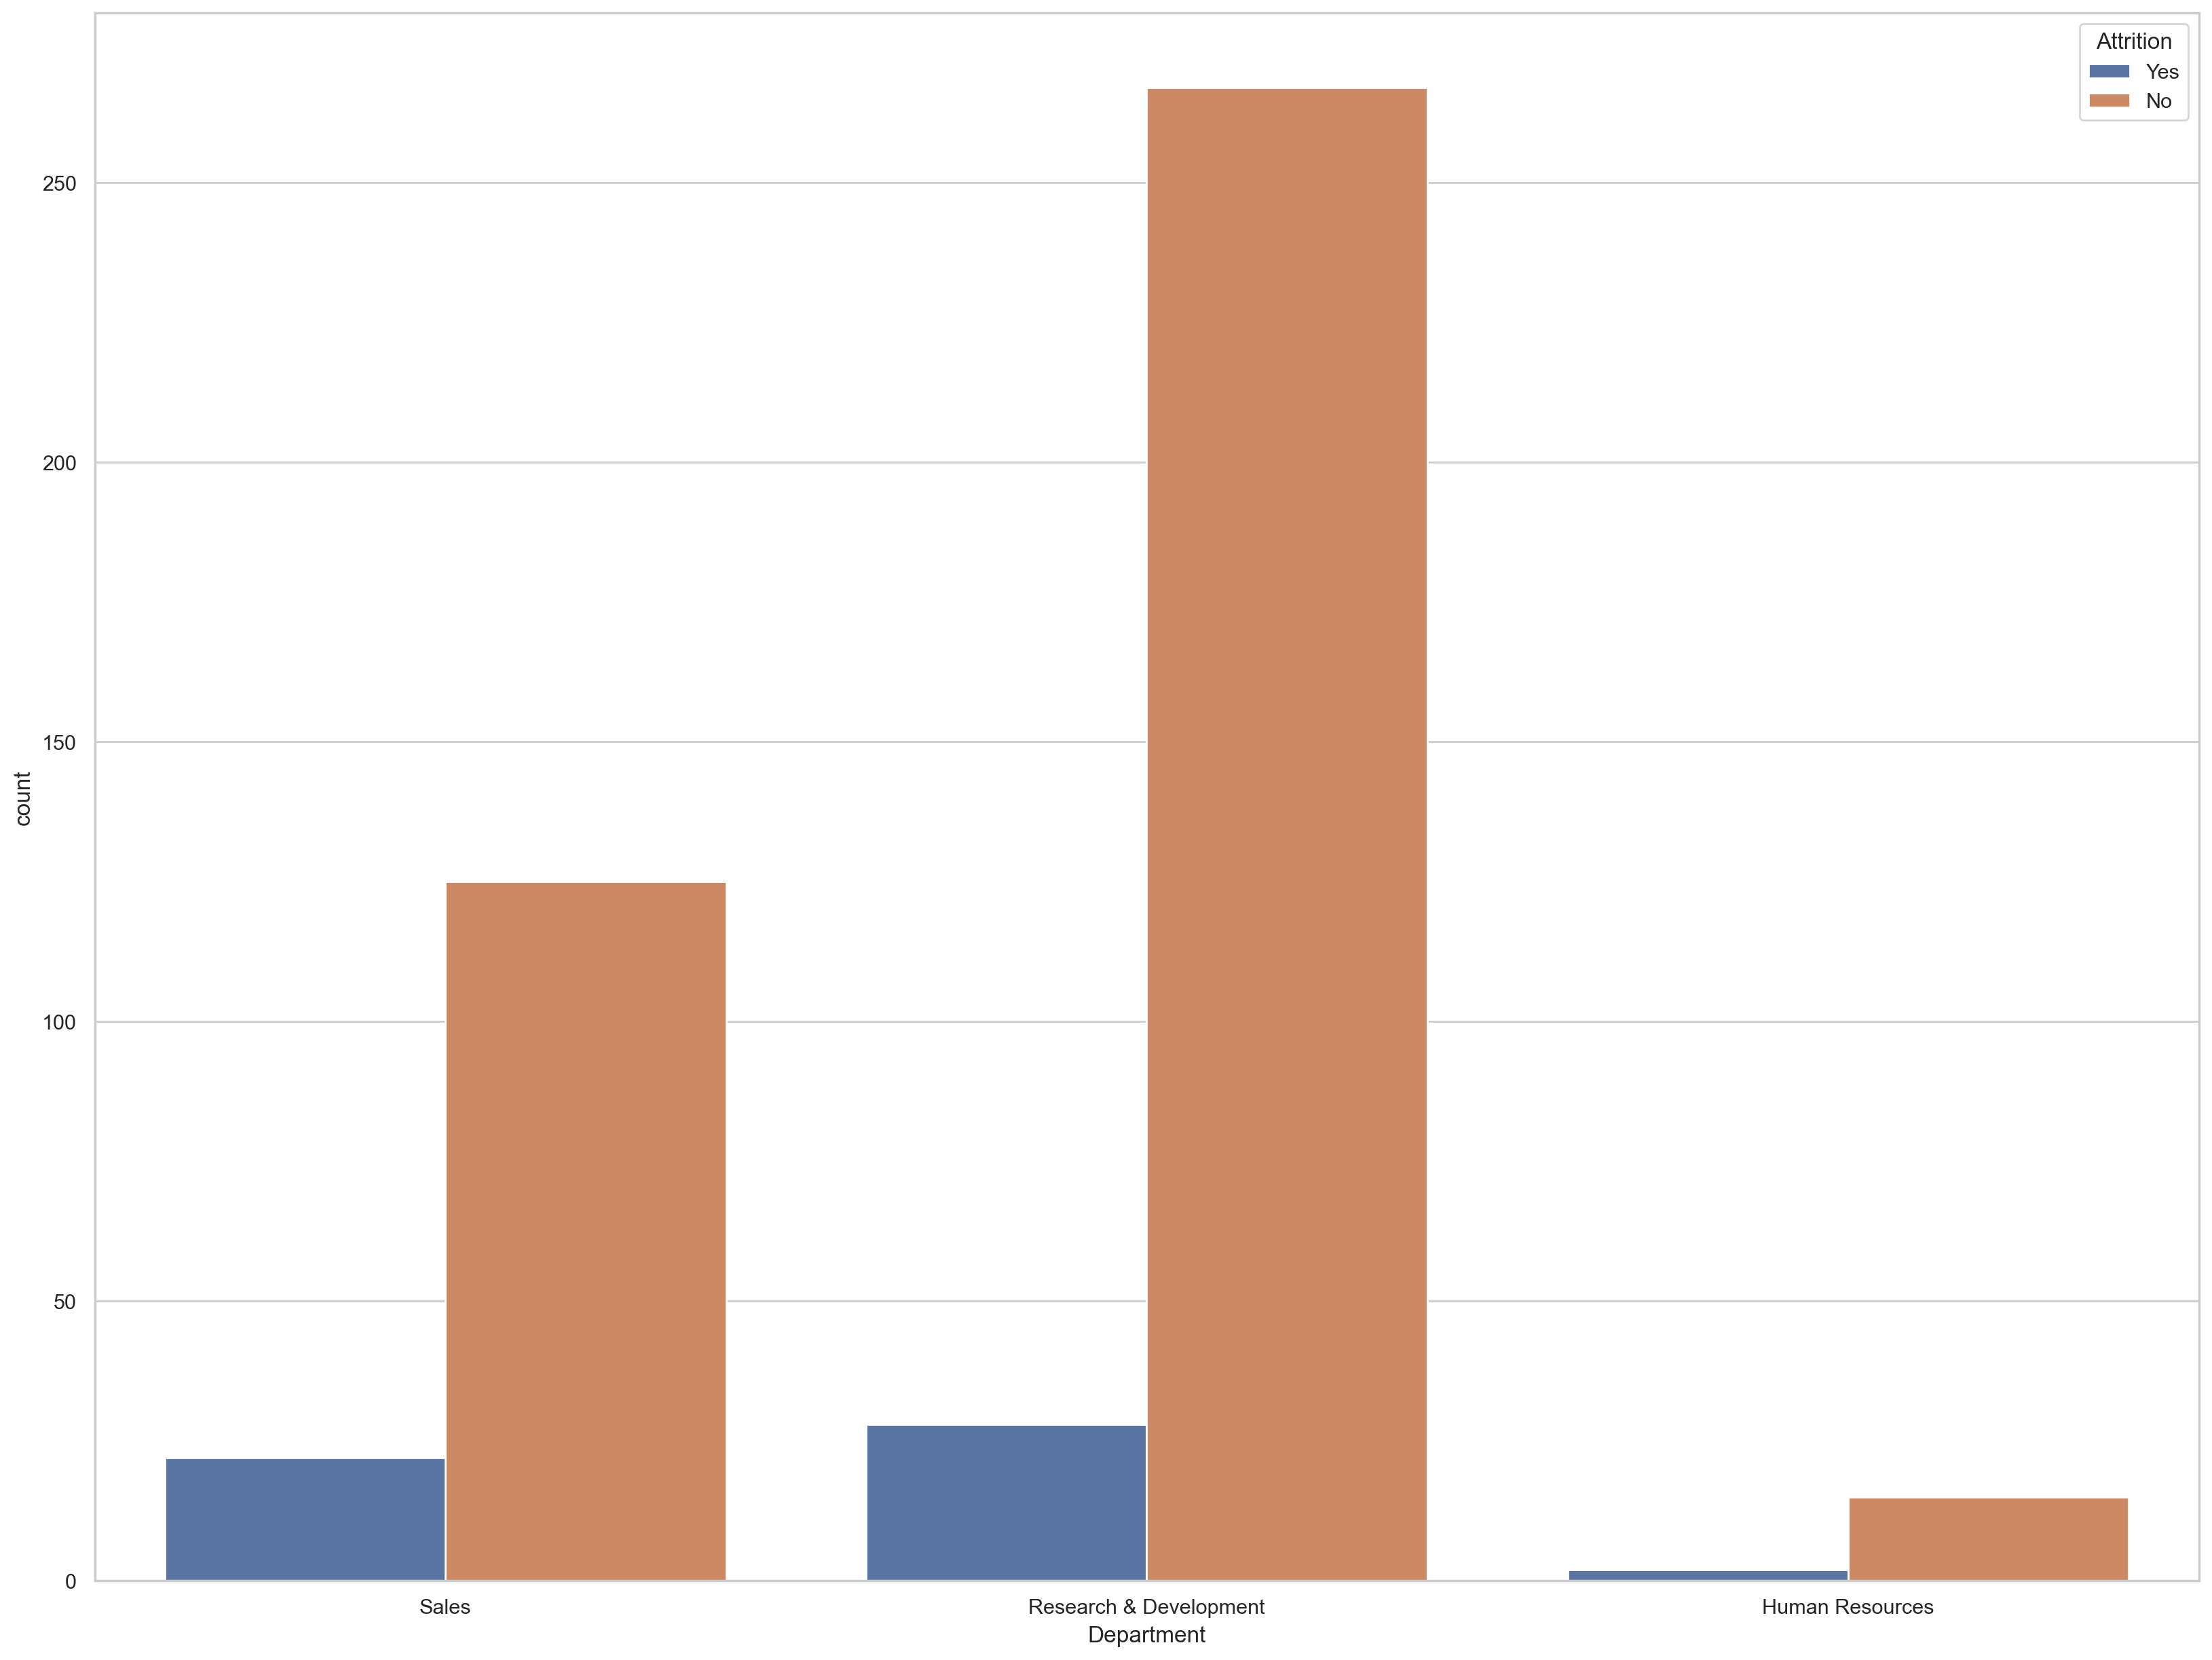

In [696]:
# 만족도가 높은 직원과 부서의 관계 살펴보기
satisfied = df_raw[df_raw['JobSatisfaction'] >= 4]
sns.countplot(x='Department', data=satisfied, hue='Attrition')

* 만족도가 높은 직원들 중에서도 이직한 직원들이 있음.
* Research & Development 부서에서는 만족도가 높은 직원들이 상대적으로 많음

In [ ]:
# 만족도-이직율 히트맵 시각화
job_att = pd.crosstab(df_raw.JobSatisfaction, df_raw.Attrition)
sns.heatmap(job_att, cmap='Blues', annot=True, fmt='g')

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Attrition', y='JobSatisfaction', data=df_raw, inner='quartile')

* 만족도가 1, 3인 직원들이 퇴사하는 경우가 많다?
* 비율적으로 만족도가 높은 직원이 퇴사를 덜 하는 이유?(4점이 비율상 가장 적은 퇴사율) -> 월급이 많아서?
* 만족도가 4점인 사람과 4점이 아닌 사람 간 월급 차이, 만족도별 평균 월급

In [ ]:
satisfied_high_income = satisfied[satisfied['MonthlyIncome'] >= satisfied['MonthlyIncome'].quantile(0.75)]
sns.countplot(x='Department', data=satisfied_high_income, hue='Attrition')

* 직업만족도 4점, 월급 : 3분위수 이상(상위 25%) 사람들 분포 >> 부서별
* 만족도가 높은 직원들 중에서 월급이 높은 직원들의 수
* R&D 부서에서 이러한 직원들의 비율이 매우 높음. 상대적으로 이직하는 인원도 적음
* HR 부서는 그러면 이직이 하나도 없음
* 보상과 관련된 요인이 직원들의 이직을 막는 데 중요한 역할을 함

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='JobSatisfaction', y='Age', data=df_raw, hue='Attrition', size=5)

* 이직한 직원들은 상대적으로 연령이 낮은 쪽에 분포함
* 이직한 직원들의 만족도는 1,3점에 위치한 것이 많고, 3점의 경우 나이가 2-30대인 경우가 많음
* 젊을수록 커리어 걱정이 많아서 이직할 수 있음.

#### 만족도가 높은 사람(좋음, 아주 좋음)이 다른 만족도는 어떨까?
- 비율로 y축을 그려본다

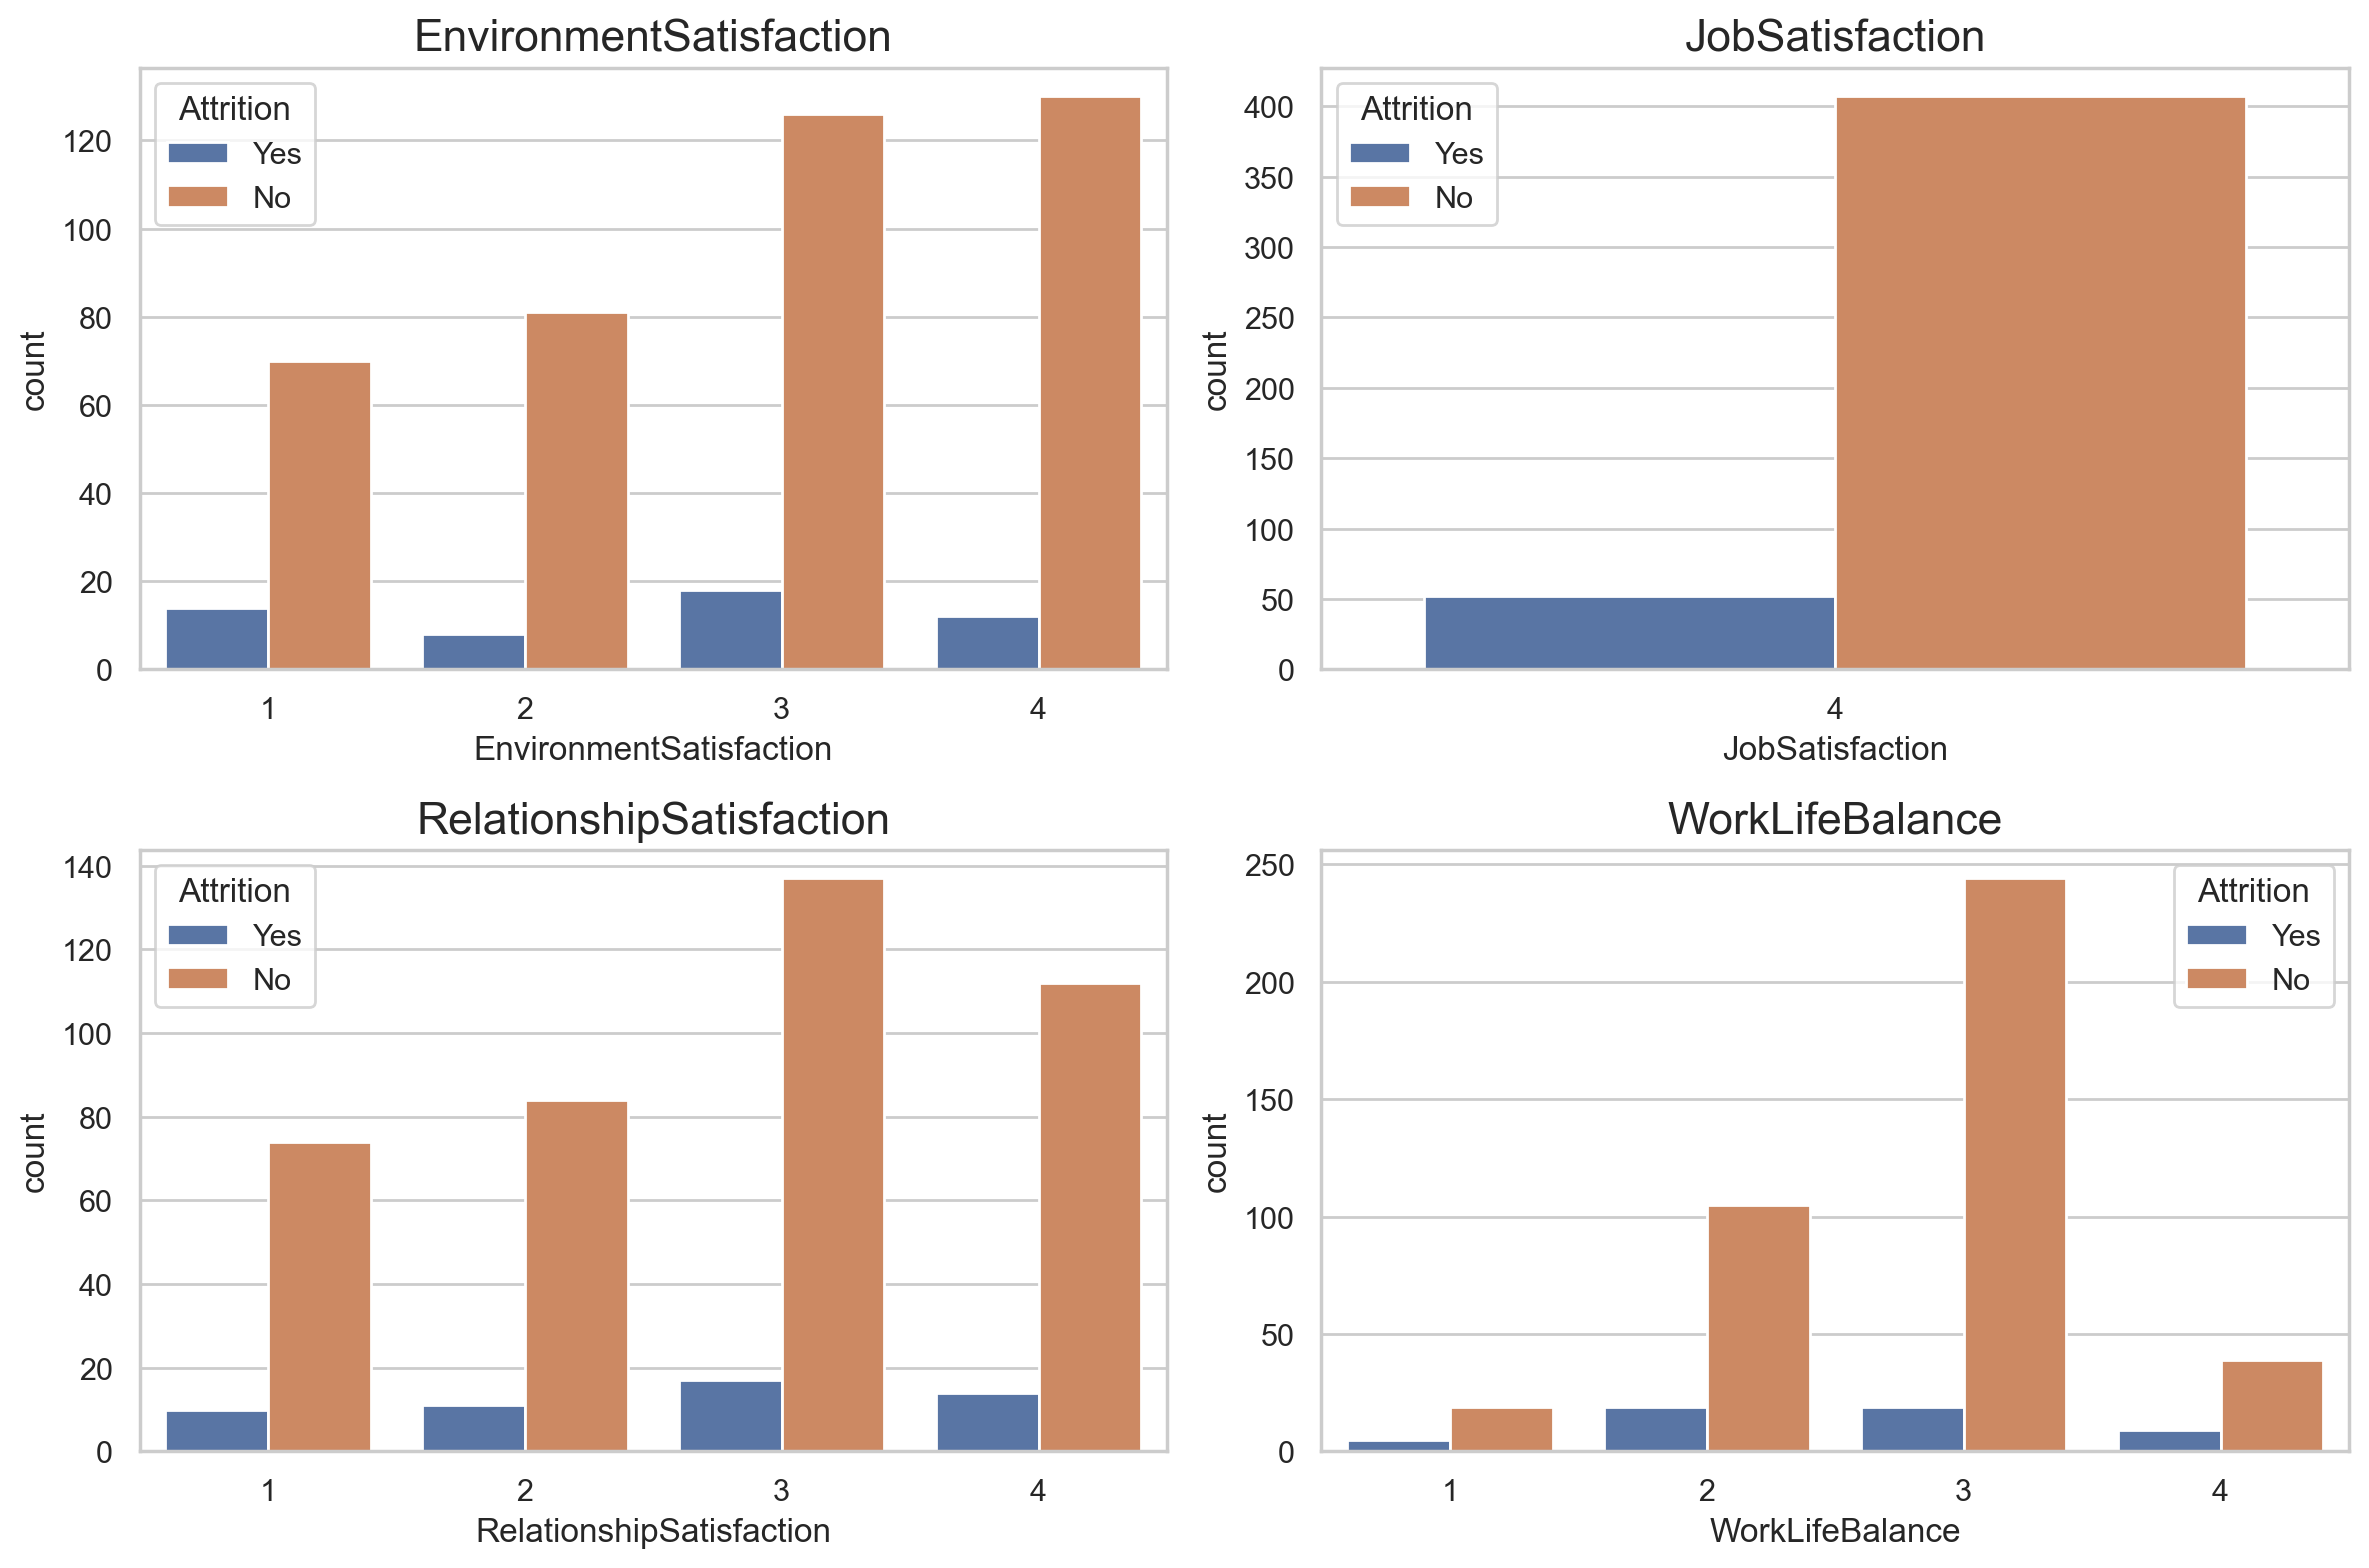

In [697]:
# 만족도 아주 높은(4점) 사람들의 다른 만족도별 이퇴직률
fig, axes = plt.subplots(2, 2, figsize=(12,8))

axes[0,0].set_title("EnvironmentSatisfaction", fontsize=16)
sns.countplot(x='EnvironmentSatisfaction', data=satisfied, ax=axes[0,0], hue='Attrition')

axes[0,1].set_title("JobSatisfaction", fontsize=16)
sns.countplot(x='JobSatisfaction', data=satisfied, ax=axes[0,1], hue='Attrition')

axes[1,0].set_title("RelationshipSatisfaction", fontsize=16)
sns.countplot(x='RelationshipSatisfaction', data=satisfied, ax=axes[1,0], hue='Attrition')

axes[1,1].set_title("WorkLifeBalance", fontsize=16)
sns.countplot(x='WorkLifeBalance', data=satisfied, ax=axes[1,1], hue='Attrition')

plt.tight_layout() # 겹치지 않게 보이게 하기
plt.show()

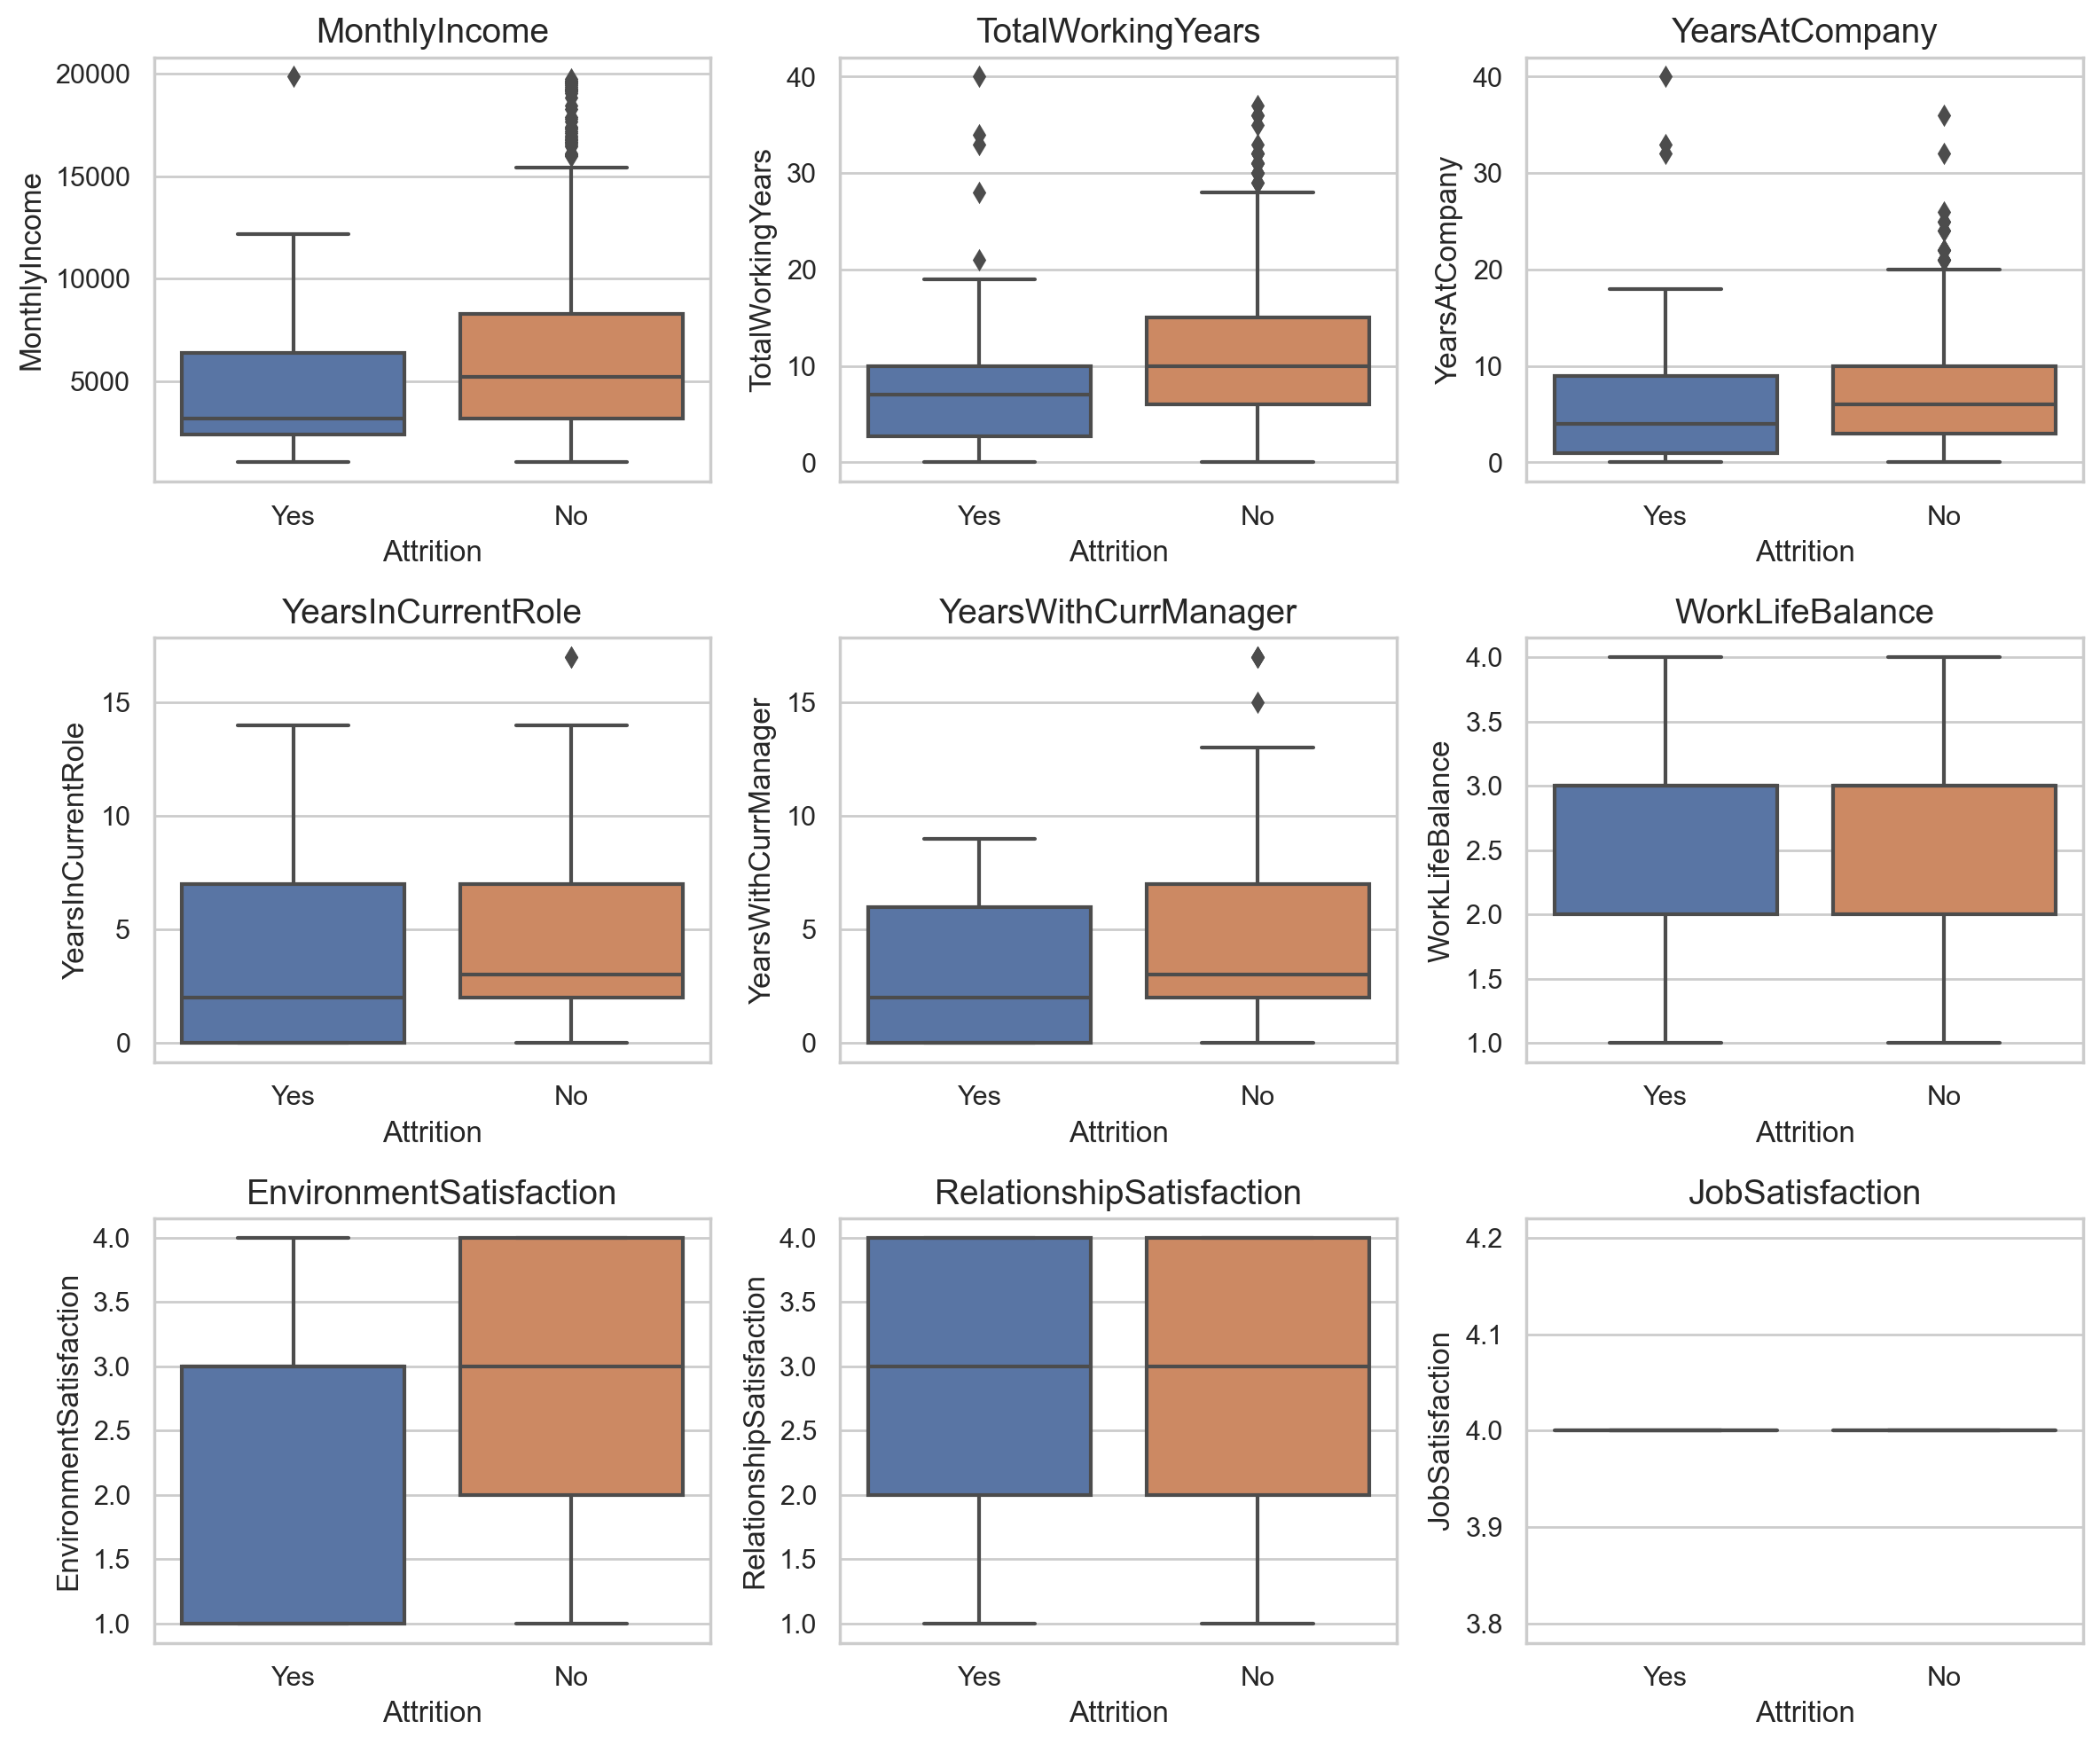

In [698]:
# 수치형 변수들 - attrtion 관계 살펴보기
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

cols = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 
        'YearsInCurrentRole', 'YearsWithCurrManager','WorkLifeBalance',
        'EnvironmentSatisfaction','RelationshipSatisfaction','JobSatisfaction']

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(x='Attrition', y=col, data=satisfied, ax=ax)
    ax.set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

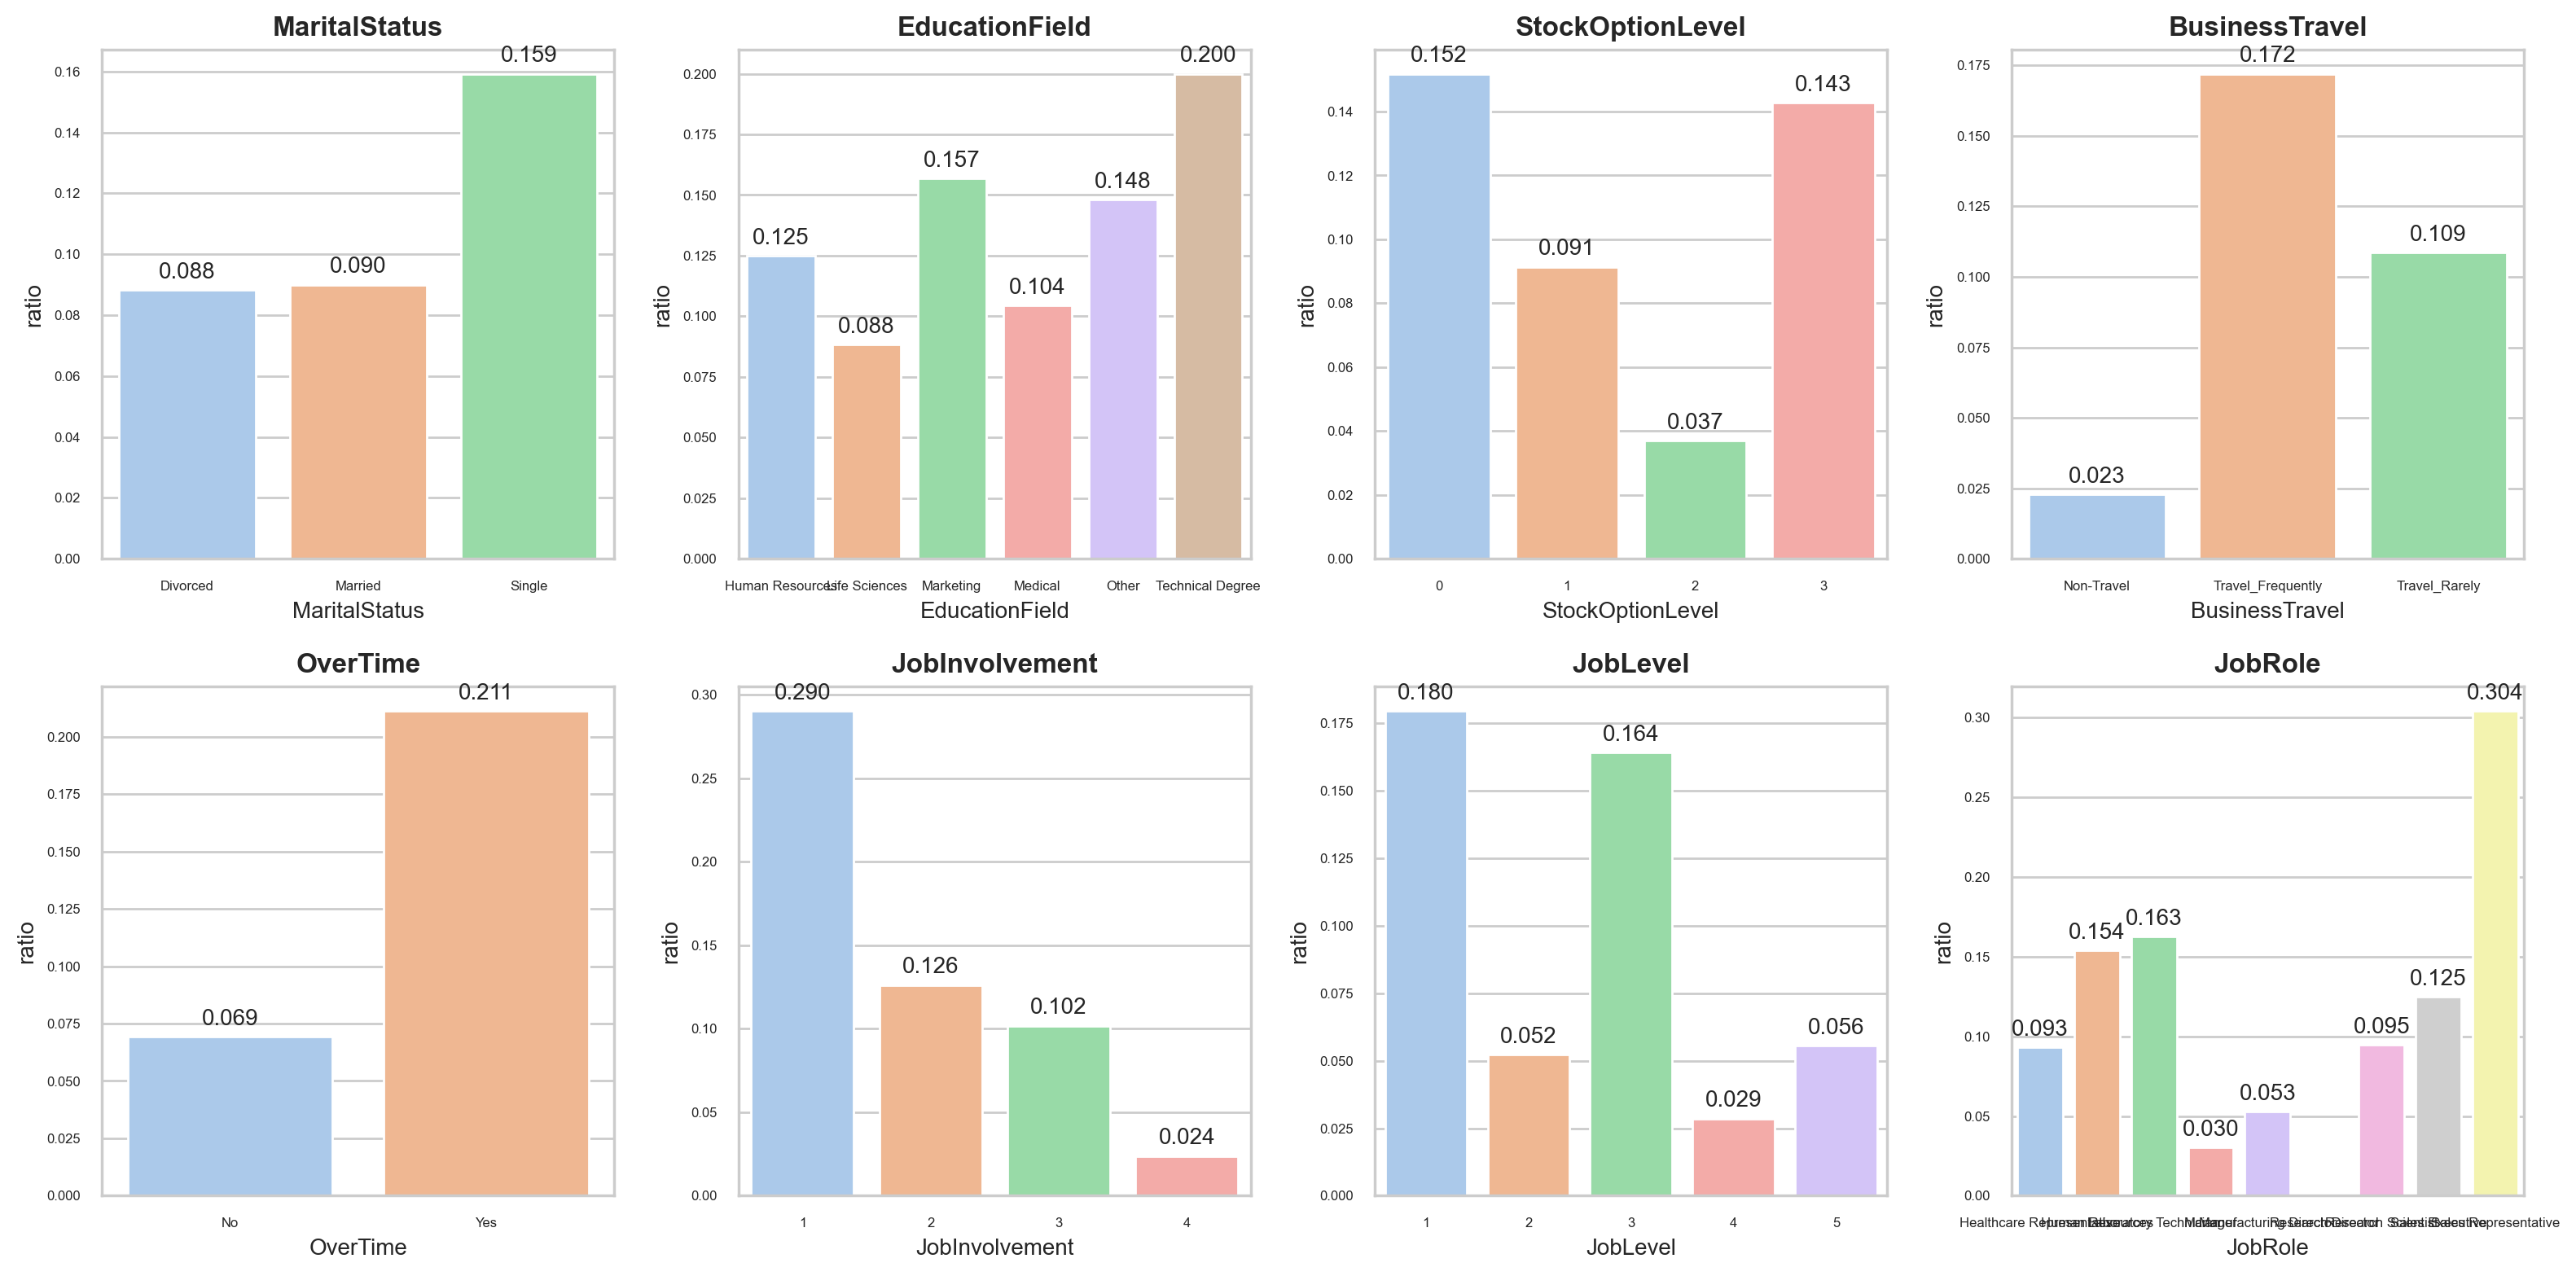

In [699]:
# 만족도 높은 사람들 중 퇴직자의 범주형 변수 비율
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
plt.subplots_adjust(wspace=0.3) # subplot간 간격 조정

cols = ['MaritalStatus', 'EducationField', 'StockOptionLevel', 'BusinessTravel',
        'OverTime', 'JobInvolvement', 'JobLevel', 'JobRole']

for col, ax in zip(cols, axes.flatten()):
    attrition_mar = attrition_ratio_yes(satisfied, col)
    ax = sns.barplot(data=attrition_mar, x=attrition_mar.index, y='ratio', ax=ax, palette='pastel')
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords='offset points', 
                    ha='center', va='bottom', fontsize=10)
        
    ax.set_title(col, fontsize=12, fontweight='bold') # 폰트 크기 및 굵기 설정
    ax.set_xlabel(col, fontsize= 10) # x축 라벨 폰트 크기 설정
    ax.set_ylabel('ratio', fontsize=10) # y축 라벨 폰트 크기 설정
    ax.tick_params(axis='both', labelsize=6) # tick label 폰트 크기 설정

plt.tight_layout()
plt.show()

In [ ]:
# 만족도 높은(3점) 사람들의 다른 만족도별 이퇴직률
fig, axes = plt.subplots(2, 2, figsize=(12,8))

satisfied_3 = df_raw[df_raw['JobSatisfaction'] == 3]

axes[0,0].set_title("EnvironmentSatisfaction", fontsize=16)
sns.countplot(x='EnvironmentSatisfaction', ax=axes[0,0], hue='Attrition', data=satisfied_3)

axes[0,1].set_title("JobSatisfaction", fontsize=16)
sns.countplot(x='JobSatisfaction', data=satisfied_3, ax=axes[0,1], hue='Attrition', dodge=False)

axes[1,0].set_title("RelationshipSatisfaction", fontsize=16)
sns.countplot(x='RelationshipSatisfaction', data=satisfied_3, ax=axes[1,0], hue='Attrition')

axes[1,1].set_title("WorkLifeBalance", fontsize=16)
sns.countplot(x='WorkLifeBalance', data=satisfied_3, ax=axes[1,1], hue='Attrition')

plt.tight_layout() # 겹치지 않게 보이게 하기
plt.show()

In [ ]:
df_drop[df_drop['NumCompaniesWorked']==0][['TotalWorkingYears','YearsAtCompany']]